## Requirements

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

%config InlineBackend.figure_format ='retina' 

import warnings
warnings.filterwarnings("ignore")

## Importing data

In [2]:
df = pd.read_csv("Ceasapeixes.csv", encoding= 'UTF-8',delimiter =';')

In [3]:
df.head(10)

Unnamed: 0        date  day  month  year                   prod und   proc  \
0         679  2013-01-02    2      1  2013  Peixe de agua salgada  Kg  RS-SC   
1         678  2013-01-02    2      1  2013  Peixe de agua salgada  Kg  RS-SC   
2         677  2013-01-02    2      1  2013  Peixe de agua salgada  Kg  RS-SC   
3         676  2013-01-02    2      1  2013  Peixe de agua salgada  Kg  RS-SC   
4         675  2013-01-02    2      1  2013  Peixe de agua salgada  Kg  RS-SC   
5         673  2013-01-02    2      1  2013  Peixe de agua salgada  Kg  RS-SC   
6         672  2013-01-02    2      1  2013  Peixe de agua salgada  Kg     RS   
7         674  2013-01-02    2      1  2013  Peixe de agua salgada  Kg  RS-SC   
8        1437  2013-01-03    3      1  2013  Peixe de agua salgada  Kg  RS-SC   
9        1436  2013-01-03    3      1  2013  Peixe de agua salgada  Kg     RS   

        tipo    min   mcom    max merc  
0     Tainha    NaN   7.40    NaN  Est  
1   Sardinha    NaN   5.28    NaN  Est  
2    Corvina   6.98   6.98   7.00  Est  
3      Cioba  15.98  15.98  16.50  Est  
4  Cavalinha   3.10   4.38   4.38  Est  
5    Anchova   6.45   8.50   8.52  Est  
6   Albacora    NaN  10.00    NaN  Est  
7   Castanha   4.78   5.00   5.48  Est  
8    Anchova   6.45   8.50   8.52  Est  
9   Albacora    NaN  10.00    NaN  Est

## Initial analysis

In [4]:
# Checking the shape of the data
df.shape

(18024, 13)

In [5]:
# Checking initial information about the dataset
# It has some null values in the price columns, we'll need to treat it further.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18024 entries, 0 to 18023
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  18024 non-null  int64  
 1   date        18024 non-null  object 
 2   day         18024 non-null  int64  
 3   month       18024 non-null  int64  
 4   year        18024 non-null  int64  
 5   prod        18024 non-null  object 
 6   und         18024 non-null  object 
 7   proc        16926 non-null  object 
 8   tipo        18024 non-null  object 
 9   min         16528 non-null  float64
 10  mcom        17316 non-null  float64
 11  max         16528 non-null  float64
 12  merc        18024 non-null  object 
dtypes: float64(3), int64(4), object(6)
memory usage: 1.8+ MB


In [4]:
# Converting columns in strings

colunas = ['prod', 
           'und',
           'proc',
           'tipo',
           'merc']

for coluna in colunas:
    df[coluna] = df[coluna].astype(str)

In [5]:
# filtering original dataframe and creating a new one only with data from sardinha species
dfc = df[['date','day','month','year','prod','und','proc','tipo','min','mcom','max','merc']].copy()
dfc = df[df['tipo']=='Sardinha']
dfc.tipo.value_counts()

Sardinha    2253
Name: tipo, dtype: int64

In [6]:
# Is notable that maximum values in the min and mcom columns are extremelly high, 
# possibly it was a typing mistake. The same happened with the minimal values from these variables.
    
dfc.describe()

Unnamed: 0          day        month         year          min  \
count   2253.000000  2253.000000  2253.000000  2253.000000  2146.000000   
mean   11873.652463    15.701287     6.391034  2017.282734     6.449334   
std     6847.303851     8.747087     3.442402     2.746296     3.540485   
min       11.000000     1.000000     1.000000  2013.000000     0.950000   
25%     5946.000000     8.000000     3.000000  2015.000000     4.850000   
50%    11881.000000    16.000000     6.000000  2017.000000     6.590000   
75%    17784.000000    23.000000     9.000000  2020.000000     7.200000   
max    23986.000000    31.000000    12.000000  2022.000000    70.200000   

              mcom          max  
count  2234.000000  2146.000000  
mean      6.792722     7.500983  
std       3.763188     1.942333  
min       0.880000     3.680000  
25%       4.980000     5.500000  
50%       6.900000     7.500000  
75%       7.500000     8.990000  
max      95.000000    11.690000

## Initial treatment of discrepant values
We will consider outliers values bellow the first quartille and upper the last quartille. How we are working with prices from a fish specie that is known for being cheap we may consider that values upper the maximum value from the column 'max' might had typing errors, so let's treat it.

In [7]:
# Applying lambda to divide the discrepant values by 10 when these values are higher then the maximum of the max column
#in order to turn them consonant with the rest of the column and multiplying the values that are smaller than 3 by 10.

dfc['mcom'] = dfc['mcom'].apply(lambda x: x if x<11.69
                                     else x/10)

dfc['mcom'] = dfc['mcom'].apply(lambda x: x if x>3
                                     else x*10)

dfc['min'] = dfc['min'].apply(lambda x: x if x<11.69
                                   else x/10)

dfc['min'] = dfc['min'].apply(lambda x: x if x>3
                                     else x*10)

In [8]:
#Now the variables seem right
dfc.describe()

Unnamed: 0          day        month         year          min  \
count   2253.000000  2253.000000  2253.000000  2253.000000  2146.000000   
mean   11873.652463    15.701287     6.391034  2017.282734     6.310098   
std     6847.303851     8.747087     3.442402     2.746296     1.738775   
min       11.000000     1.000000     1.000000  2013.000000     3.250000   
25%     5946.000000     8.000000     3.000000  2015.000000     4.850000   
50%    11881.000000    16.000000     6.000000  2017.000000     6.590000   
75%    17784.000000    23.000000     9.000000  2020.000000     7.200000   
max    23986.000000    31.000000    12.000000  2022.000000    10.900000   

              mcom          max  
count  2234.000000  2146.000000  
mean      6.731083     7.500983  
std       1.872656     1.942333  
min       3.250000     3.680000  
25%       5.000000     5.500000  
50%       6.900000     7.500000  
75%       7.500000     8.990000  
max      10.900000    11.690000

## Checking for inconsistances of the variables 
In this section we will check if there are some inconsistances in the variable with would be expected. If mcom is bigger than maximum, smaller than minimum of if minimum is bigger than maximum.

In [9]:
# Checking if mcom is bigger than maximum somewhere.
dfc[dfc['mcom'] > dfc['max']]

Unnamed: 0        date  day  month  year                   prod und  \
7014        2891  2016-10-04    4     10  2016  Peixe de agua salgada  Kg   
7020        3713  2016-10-05    5     10  2016  Peixe de agua salgada  Kg   
7026        4520  2016-10-06    6     10  2016  Peixe de agua salgada  Kg   
7038        5304  2016-10-07    7     10  2016  Peixe de agua salgada  Kg   
7046        7661  2016-10-10   10     10  2016  Peixe de agua salgada  Kg   
7053        8487  2016-10-11   11     10  2016  Peixe de agua salgada  Kg   
7061       10038  2016-10-13   13     10  2016  Peixe de agua salgada  Kg   
7066       10838  2016-10-14   14     10  2016  Peixe de agua salgada  Kg   
7073       13088  2016-10-17   17     10  2016  Peixe de agua salgada  Kg   
7083       13901  2016-10-18   18     10  2016  Peixe de agua salgada  Kg   
7090       14727  2016-10-19   19     10  2016  Peixe de agua salgada  Kg   
8942        2105  2017-10-03    3     10  2017  Peixe de agua salgada  Kg   
8950        2900  2017-10-04    4     10  2017  Peixe de agua salgada  Kg   
8953        3722  2017-10-05    5     10  2017  Peixe de agua salgada  Kg   

     proc      tipo   min  mcom   max merc  
7014  nan  Sardinha  4.89  8.85  6.00  Est  
7020  nan  Sardinha  4.89  8.85  6.00  Est  
7026  nan  Sardinha  4.89  8.85  6.00  Est  
7038  nan  Sardinha  4.89  8.85  6.00  Est  
7046  nan  Sardinha  4.89  8.85  6.00  Est  
7053  nan  Sardinha  4.89  8.85  6.00  Est  
7061  nan  Sardinha  4.89  8.85  6.00  Est  
7066  nan  Sardinha  4.89  8.85  6.00  Est  
7073  nan  Sardinha  4.89  8.85  6.00  Est  
7083  nan  Sardinha  4.89  8.85  6.00  Est  
7090  nan  Sardinha  4.89  8.85  6.00  Est  
8942  nan  Sardinha  6.80  6.90  6.89  Est  
8950  nan  Sardinha  6.80  6.90  6.89  Est  
8953  nan  Sardinha  6.80  6.90  6.89  Est

In [10]:
# switching places where mcom is higher than max
m = dfc['mcom']>dfc['max']

dfc.loc[m, ['max','mcom']] = dfc.loc[m, ['mcom','max']].values

In [11]:
# Checking if mcom is smaller than minimum somewhere.
dfc[dfc['mcom'] < dfc['min']]

Empty DataFrame
Columns: [Unnamed: 0, date, day, month, year, prod, und, proc, tipo, min, mcom, max, merc]
Index: []

In [12]:
# Checking if max is smaller than minimum somewhere.
dfc[dfc['max'] < dfc['min']]

Empty DataFrame
Columns: [Unnamed: 0, date, day, month, year, prod, und, proc, tipo, min, mcom, max, merc]
Index: []

## Looking for null-values

In [13]:
# There are missing data in min,mcom and max columns, let's see where are these missing values 

dfc.isnull().sum() 

Unnamed: 0      0
date            0
day             0
month           0
year            0
prod            0
und             0
proc            0
tipo            0
min           107
mcom           19
max           107
merc            0
dtype: int64

## Treating maximum null-values

In [14]:
# Is notable that all max missing values are from the years of 2013, 2014 and 2016, let's threat this.

dfc[dfc['max'].isna()]['year'].value_counts()

2013    88
2016    14
2014     5
Name: year, dtype: int64

In [17]:
#checking the months with missing data in maximum columns
dfc.loc[(dfc['year'] == 2016) & (dfc['month'] == 3)]

Unnamed: 0        date  day  month  year                   prod und  \
5862          95  2016-03-01    1      3  2016  Peixe de agua salgada  Kg   
5869         828  2016-03-02    2      3  2016  Peixe de agua salgada  Kg   
5873        1601  2016-03-03    3      3  2016  Peixe de agua salgada  Kg   
5885        2449  2016-03-04    4      3  2016  Peixe de agua salgada  Kg   
5890        4884  2016-03-07    7      3  2016  Peixe de agua salgada  Kg   
5901        5623  2016-03-08    8      3  2016  Peixe de agua salgada  Kg   
5911        6357  2016-03-09    9      3  2016  Peixe de agua salgada  Kg   
5913        7188  2016-03-10   10      3  2016  Peixe de agua salgada  Kg   
5925        8023  2016-03-11   11      3  2016  Peixe de agua salgada  Kg   
5929       10374  2016-03-14   14      3  2016  Peixe de agua salgada  Kg   
5943       11161  2016-03-15   15      3  2016  Peixe de agua salgada  Kg   
5946       11894  2016-03-16   16      3  2016  Peixe de agua salgada  Kg   
5959       12628  2016-03-17   17      3  2016  Peixe de agua salgada  Kg   
5966       13437  2016-03-18   18      3  2016  Peixe de agua salgada  Kg   
5975       15886  2016-03-21   21      3  2016  Peixe de agua salgada  Kg   
5976       16638  2016-03-22   22      3  2016  Peixe de agua salgada  Kg   
5991       17425  2016-03-23   23      3  2016  Peixe de agua salgada  Kg   
5992       21208  2016-03-28   28      3  2016  Peixe de agua salgada  Kg   
6004       21967  2016-03-29   29      3  2016  Peixe de agua salgada  Kg   
6009       22760  2016-03-30   30      3  2016  Peixe de agua salgada  Kg   
6023       23543  2016-03-31   31      3  2016  Peixe de agua salgada  Kg   

     proc      tipo  min  mcom  max merc  
5862  nan  Sardinha  NaN   NaN  NaN  Aus  
5869  nan  Sardinha  NaN   NaN  NaN  Aus  
5873  nan  Sardinha  NaN   NaN  NaN  Aus  
5885  nan  Sardinha  NaN   NaN  NaN  Aus  
5890  nan  Sardinha  NaN   NaN  NaN  Aus  
5901  nan  Sardinha  NaN   NaN  NaN  Aus  
5911  nan  Sardinha  7.2   7.2  7.2  Ent  
5913  nan  Sardinha  7.2   7.2  7.2  Ent  
5925  nan  Sardinha  7.2   7.2  7.2  Ent  
5929  nan  Sardinha  7.2   7.2  7.2  Est  
5943  nan  Sardinha  7.2   7.2  7.2  Est  
5946  nan  Sardinha  7.2   7.2  7.2  Est  
5959  nan  Sardinha  7.2   7.2  7.2  Est  
5966  nan  Sardinha  6.8   6.8  6.8  Fra  
5975  nan  Sardinha  6.8   6.8  6.8  Fra  
5976  nan  Sardinha  6.8   6.8  6.8  Fra  
5991  nan  Sardinha  6.8   6.8  6.8  Est  
5992  nan  Sardinha  6.8   6.8  6.8  Est  
6004  nan  Sardinha  6.8   6.8  6.8  Est  
6009  nan  Sardinha  6.8   6.8  6.8  Est  
6023  nan  Sardinha  6.8   6.8  6.8  Est

In [15]:
#giving the specific conditions
m1 = (dfc['month']==1) & (dfc['year']==2013)
m2 = (dfc['month']==2) & (dfc['year']==2013)
m3 = (dfc['month']==3) & (dfc['year']==2013)
m4 = (dfc['month']==4) & (dfc['year']==2013)
m5 = (dfc['month']==5) & (dfc['year']==2013)
m6 = (dfc['month']==9) & (dfc['year']==2013)
m7 = (dfc['month']==10) & (dfc['year']==2013)
m8 = (dfc['month']==12) & (dfc['year']==2013)


#filling null values with the modal value from that condition
dfc.loc[m1, 'max'] = dfc.loc[m1, 'mcom']
dfc.loc[m2, 'max'] = dfc.loc[m2, 'mcom']
dfc.loc[m3,'max'] = dfc.loc[m3,'max'].fillna(dfc.loc[m3,'max'].median())
dfc.loc[m4,'max'] = dfc.loc[m4,'max'].fillna(dfc.loc[m4,'max'].median())
dfc.loc[m5,'max'] = dfc.loc[m5,'max'].fillna(dfc.loc[m5,'max'].mode()[0])
dfc.loc[m6,'max'] = dfc.loc[m6,'max'].fillna(dfc.loc[m6,'max'].mode()[0])
dfc.loc[m7,'max'] = dfc.loc[m7,'max'].fillna(dfc.loc[m7,'max'].max())
dfc.loc[m8,'max'] = dfc.loc[m8,'max'].fillna(dfc.loc[m8,'max'].mode()[0])

In [16]:
#giving the specific conditions
m1 = (dfc['month']==2) & (dfc['year']==2014)
m2 = (dfc['month']==2) & (dfc['year']==2016)
m3 = (dfc['month']==3) & (dfc['year']==2016)


#filling null values with the modal value from that condition
dfc.loc[m1,'max'] = dfc.loc[m1,'max'].fillna(dfc.loc[m1,'max'].mean())
dfc.loc[m2,'max'] = dfc.loc[m2,'max'].fillna(dfc.loc[m2,'max'].mean())
dfc.loc[m3,'max'] = dfc.loc[m3,'max'].fillna(dfc.loc[m3,'max'].mean())

In [17]:
# Max values were treated,now let's solve the minimum and mcom missing values
dfc.isnull().sum() 

Unnamed: 0      0
date            0
day             0
month           0
year            0
prod            0
und             0
proc            0
tipo            0
min           107
mcom           19
max             0
merc            0
dtype: int64

## Treating minimum null-vallues

In [18]:
# It seems like the the min values are missing in the same places where the max were missing.
dfc[dfc['min'].isna()]['year'].value_counts()

2013    88
2016    14
2014     5
Name: year, dtype: int64

In [19]:
#giving the specific conditions
m1 = (dfc['month'] == 9) & (dfc['year'] == 2013)
m2 = (dfc['month'] == 10) & (dfc['year'] == 2013)
m3 = (dfc['month'] == 12) & (dfc['year'] == 2013)
m = (dfc['year'] == 2013) & (dfc['month'] == 1)
m4 = (dfc['year'] == 2013) & (dfc['month'] == 2)
m5 = (dfc['year'] == 2013) & (dfc['month'] == 3)
m6 = (dfc['year'] == 2013) & (dfc['month'] == 4)
m7 = (dfc['year'] == 2013) & (dfc['month'] == 5)


#filling null values with the modal value from that condition
dfc.loc[m1,'min'] = dfc.loc[m1,'min'].fillna(dfc.loc[m1,'min'].median())
dfc.loc[m2,'min'] = dfc.loc[m2,'min'].fillna(dfc.loc[m2,'min'].median())
dfc.loc[m3,'min'] = dfc.loc[m3,'min'].fillna(dfc.loc[m3,'min'].median())
dfc.loc[m, 'min'] = dfc.loc[m, 'mcom']
dfc.loc[m4, 'min'] = dfc.loc[m4, 'mcom']
dfc.loc[m5, 'min'] = dfc.loc[m5, 'mcom']
dfc.loc[m6,'min'] = dfc.loc[m6,'min'].fillna(dfc.loc[m6,'min'].median())
dfc.loc[m7,'min'] = dfc.loc[m7,'min'].fillna(dfc.loc[m7,'min'].median())

In [20]:
#giving the specific conditions
m1 = (dfc['month']==2) & (dfc['year']==2014)
m2 = (dfc['month']==2) & (dfc['year']==2016)
m3 = (dfc['month']==3) & (dfc['year']==2016)


#filling null values with the modal value from that condition
dfc.loc[m1,'min'] = dfc.loc[m1,'min'].fillna(dfc.loc[m1,'min'].mean())
dfc.loc[m2,'min'] = dfc.loc[m2,'min'].fillna(dfc.loc[m2,'min'].mean())
dfc.loc[m3,'min'] = dfc.loc[m3,'min'].fillna(dfc.loc[m3,'min'].mean())

## Treating mcom null-values

In [21]:
# It seems like the the mcom values are missing in the same places where the max were missing in these respective years.
dfc[dfc['mcom'].isna()]['year'].value_counts()

2016    14
2014     5
Name: year, dtype: int64

In [22]:
#giving the specific conditions
m1 = (dfc['month']==2) & (dfc['year']==2014)
m2 = (dfc['month']==2) & (dfc['year']==2016)
m3 = (dfc['month']==3) & (dfc['year']==2016)


#filling null values with the modal value from that condition
dfc.loc[m1,'mcom'] = dfc.loc[m1,'mcom'].fillna(dfc.loc[m1,'mcom'].mean())
dfc.loc[m2,'mcom'] = dfc.loc[m2,'mcom'].fillna(dfc.loc[m2,'mcom'].mean())
dfc.loc[m3,'mcom'] = dfc.loc[m3,'mcom'].fillna(dfc.loc[m3,'mcom'].mean())

In [23]:
dfc[dfc['mcom'].isna()]['year'].value_counts()

Series([], Name: year, dtype: int64)

## Exploring data

In [24]:
# Creating a new variable which is a range between the maximum and minimum price
dfc["mm"]=dfc["max"]-dfc['min']

In [25]:
dfc['Full_date'] = dfc['day'].map(str) + '-' + dfc['month'].map(str) + '-' + dfc['year'].map(str)


In [26]:
dfc.describe()

Unnamed: 0          day        month         year          min  \
count   2253.000000  2253.000000  2253.000000  2253.000000  2253.000000   
mean   11873.652463    15.701287     6.391034  2017.282734     6.240808   
std     6847.303851     8.747087     3.442402     2.746296     1.735114   
min       11.000000     1.000000     1.000000  2013.000000     3.250000   
25%     5946.000000     8.000000     3.000000  2015.000000     4.850000   
50%    11881.000000    16.000000     6.000000  2017.000000     6.190000   
75%    17784.000000    23.000000     9.000000  2020.000000     7.000000   
max    23986.000000    31.000000    12.000000  2022.000000    10.900000   

              mcom          max           mm  
count  2253.000000  2253.000000  2253.000000  
mean      6.710848     7.406227     1.165419  
std       1.862288     1.963328     0.999947  
min       3.250000     3.680000     0.000000  
25%       5.000000     5.500000     0.300000  
50%       6.900000     7.500000     1.000000  
75%       7.500000     8.900000     1.700000  
max      10.900000    11.690000     4.500000

In [27]:
# Indexing the date variable to easilu plot the graphs 
dfc['date']=pd.to_datetime(dfc['date'])
dfc.set_index('date',inplace=True)

Text(0.5, 0, 'Year')

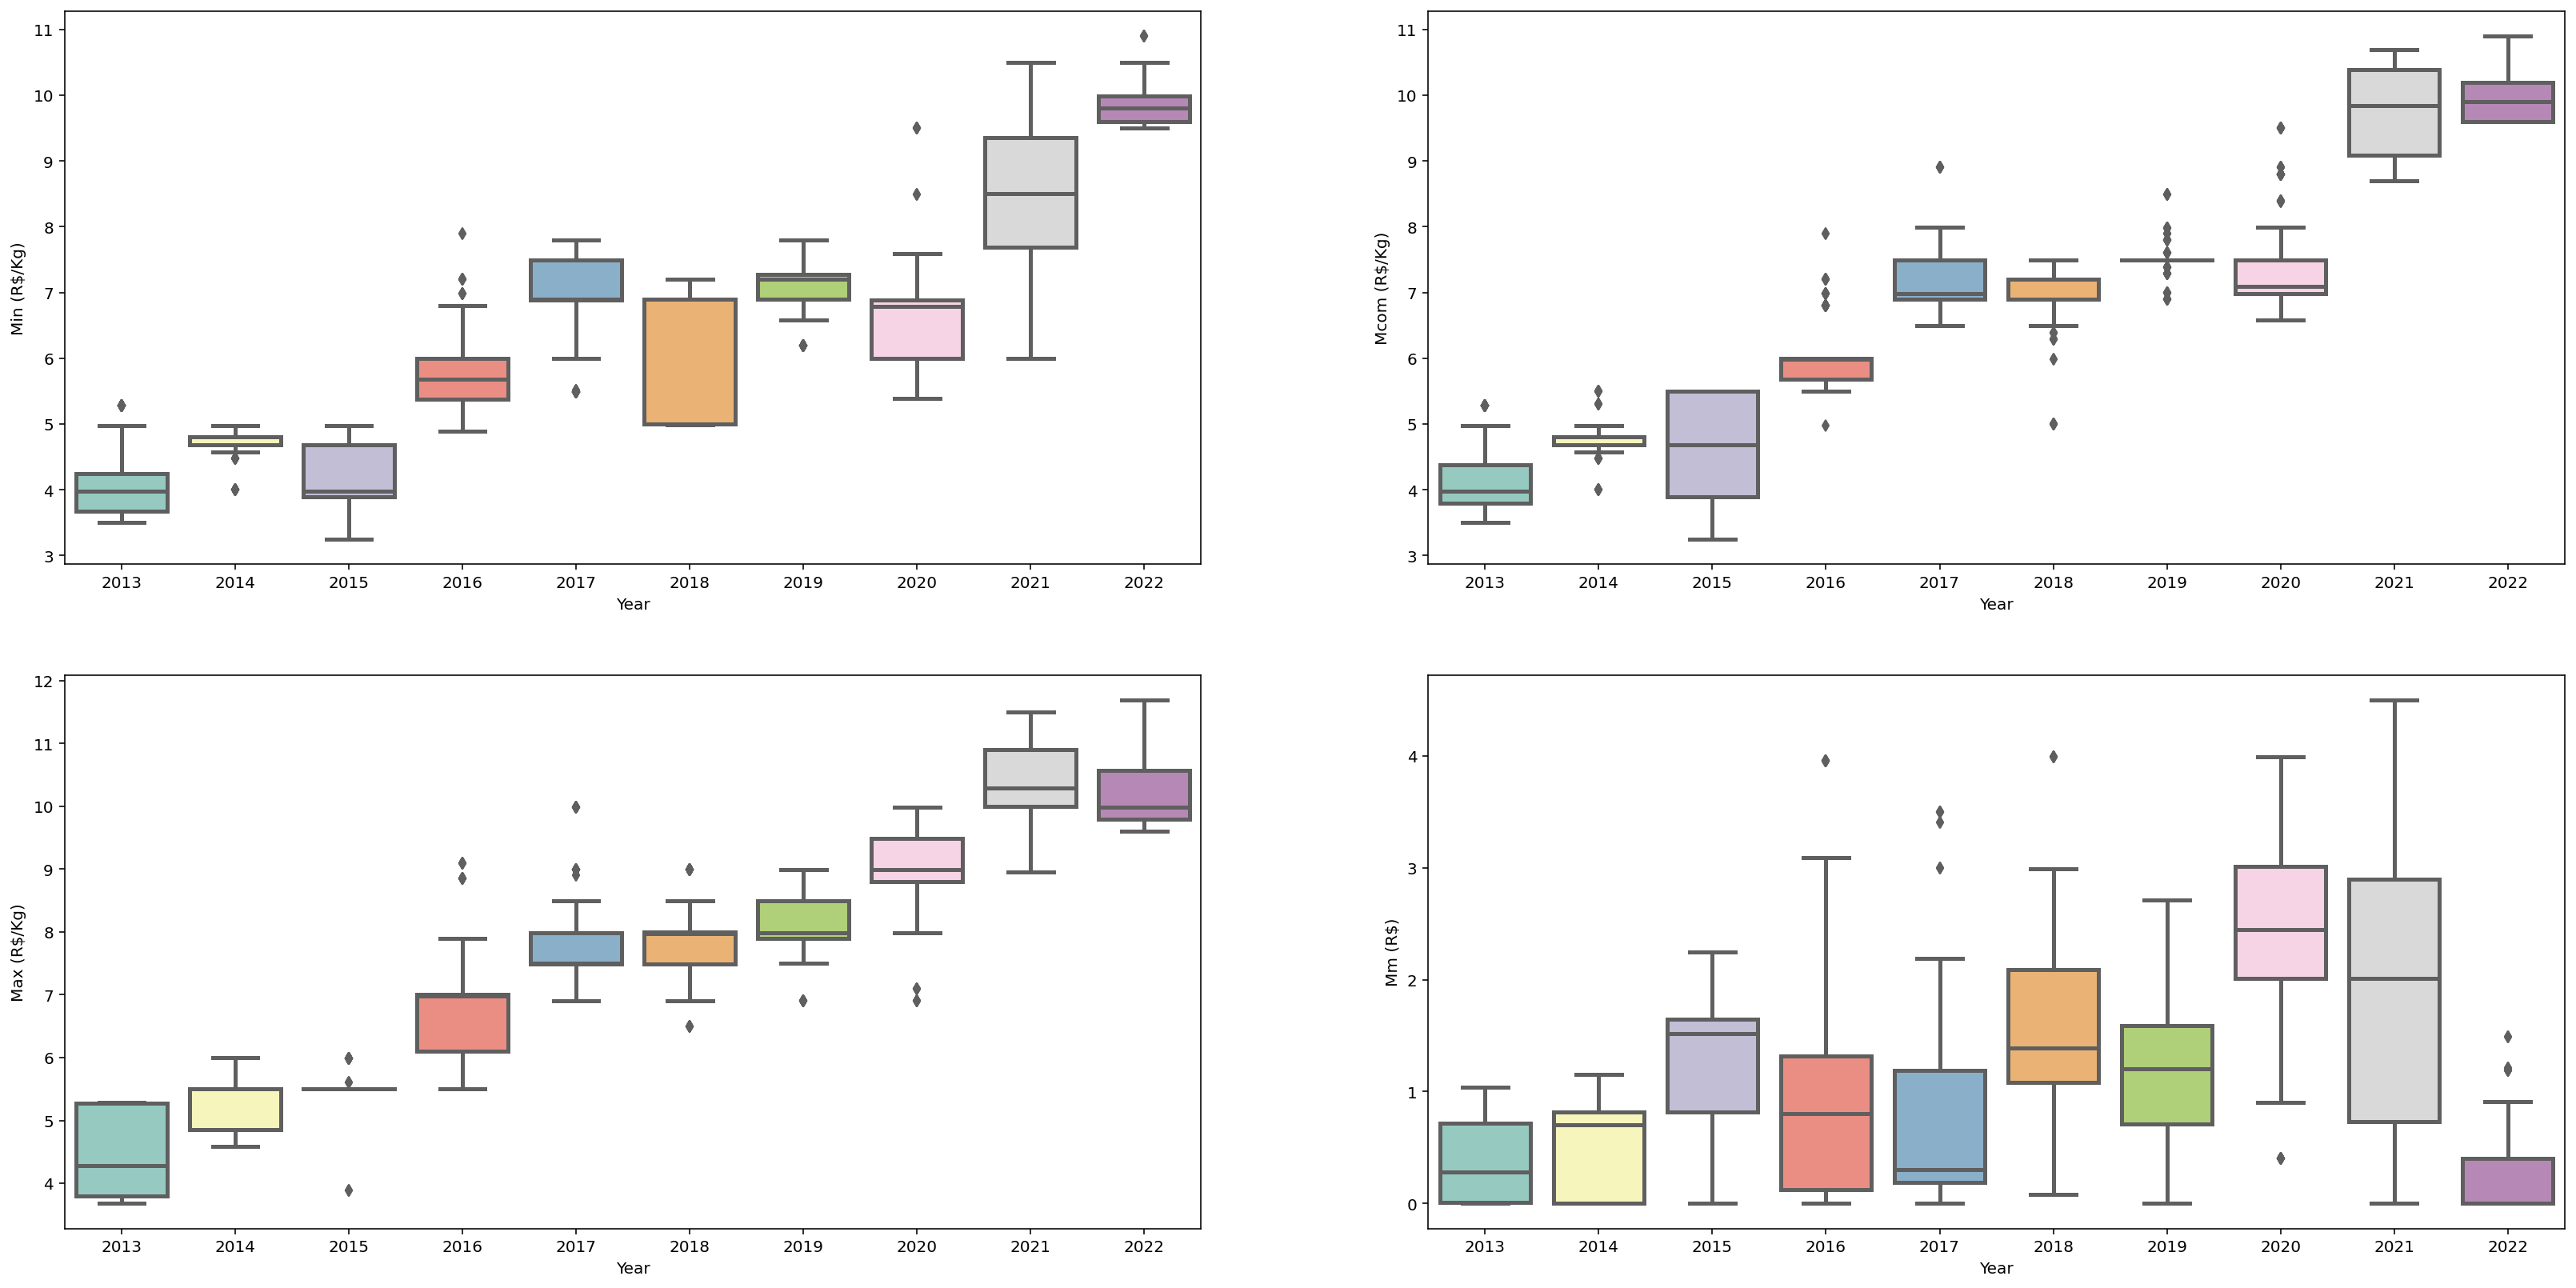

In [28]:
# Plotting boxplots from the economic variables from the dataset to check possible outliers
fig, axes = plt.subplots(2, 2, figsize=(28, 14))

sns.boxplot(x="year", y="min", data=dfc, linewidth=2.5,palette="Set3", ax=axes[0,0])
axes[0, 0].set_ylabel('Min (R$/Kg)')
axes[0, 0].set_xlabel('Year')

sns.boxplot(x="year", y="mcom", data=dfc, linewidth=2.5,palette="Set3", ax=axes[0,1])
axes[0, 1].set_ylabel('Mcom (R$/Kg)')
axes[0, 1].set_xlabel('Year')

sns.boxplot(x="year", y="max", data=dfc, linewidth=2.5,palette="Set3", ax=axes[1,0])
axes[1, 0].set_ylabel('Max (R$/Kg)')
axes[1, 0].set_xlabel('Year')

sns.boxplot(x="year", y="mm", data=dfc, linewidth=2.5,palette="Set3", ax=axes[1,1])
axes[1, 1].set_ylabel('Mm (R$)')
axes[1, 1].set_xlabel('Year')

The plot indicates that the trend of the variables is to increase as the time goes on, but we have outiers so let's treat these values in order to have more accurate data to make it better to further modelling.

## Treating outliers from max

In [29]:
# Localizing the outliers
#dfc.loc[(dfc['year'] == 2020) & (dfc['month'] == 8)]

In [31]:
# Get replacement value
# First, 2015
val = dfc.loc[dfc['Full_date'].eq('28-8-2015').idxmax(), 'max']

# slice and replace
m = dfc['year'].eq(2015) & dfc['max'].lt(5)
dfc.loc[m, 'max'] = val

In [32]:
# Get replacement value
# 2016
val = dfc.loc[dfc['Full_date'].eq('28-10-2016').idxmax(), 'max']

# slice and replace
m = dfc['year'].eq(2016) & dfc['max'].gt(8)
dfc.loc[m, 'max'] = val

In [33]:
# Get replacement value
# 2017
val = dfc.loc[dfc['Full_date'].eq('9-1-2017').idxmax(), 'max']

# slice and replace
m = dfc['year'].eq(2017) & dfc['max'].gt(8.2)
dfc.loc[m, 'max'] = val

In [34]:
# Get replacement value
# 2018
val = dfc.loc[dfc['Full_date'].eq('20-2-2018').idxmax(), 'max']
val2 = dfc.loc[dfc['Full_date'].eq('12-11-2018').idxmax(), 'max']

# slice and replace
m = dfc['year'].eq(2018) & dfc['max'].lt(6.6)
m2 = dfc['year'].eq(2018) & dfc['max'].gt(8.5)
dfc.loc[m, 'max'] = val
dfc.loc[m2, 'max'] = val2

In [35]:
# Get replacement value
# 2019
val = dfc.loc[dfc['Full_date'].eq('29-1-2019').idxmax(), 'max']

# slice and replace
m = dfc['year'].eq(2019) & dfc['max'].lt(7.2)
dfc.loc[m, 'max'] = val

In [36]:
# Get replacement value
# 2020
val = dfc.loc[dfc['Full_date'].eq('25-8-2020').idxmax(), 'max']

# slice and replace
m = dfc['year'].eq(2020) & dfc['max'].lt(7.2)
dfc.loc[m, 'max'] = val

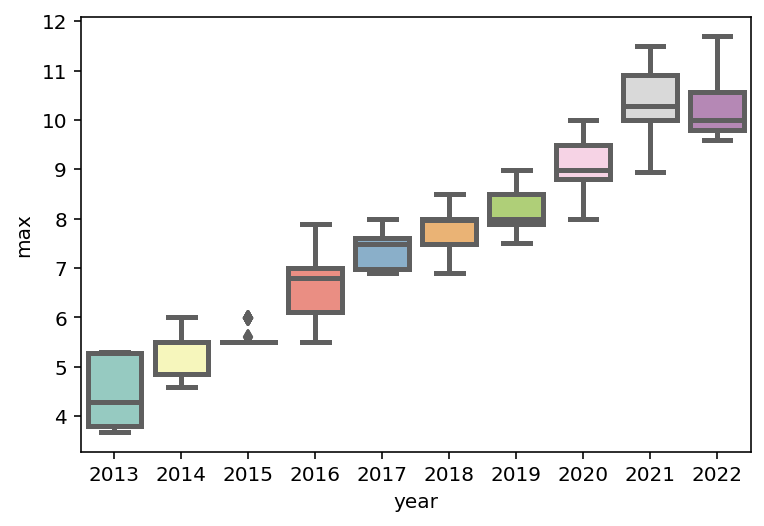

In [37]:
# Max outliers solved.
sns.boxplot(x="year", y="max", data=dfc, linewidth=2.5,palette="Set3")
plt.show()


## Treating outliers from min

In [38]:
dfc.loc[(dfc['year'] == 2022) & (dfc['month'] == 1)]

Unnamed: 0  day  month  year                   prod und   proc  \
date                                                                         
2022-01-03        1500    3      1  2022  Peixe de agua salgada  Kg  RS-SC   
2022-01-04        2322    4      1  2022  Peixe de agua salgada  Kg  RS-SC   
2022-01-05        3139    5      1  2022  Peixe de agua salgada  Kg  RS-SC   
2022-01-06        3961    6      1  2022  Peixe de agua salgada  Kg  RS-SC   
2022-01-07        4774    7      1  2022  Peixe de agua salgada  Kg  RS-SC   
2022-01-10        7087   10      1  2022  Peixe de agua salgada  Kg  RS-SC   
2022-01-11        7896   11      1  2022  Peixe de agua salgada  Kg  RS-SC   
2022-01-12        8735   12      1  2022  Peixe de agua salgada  Kg  RS-SC   
2022-01-13        9481   13      1  2022  Peixe de agua salgada  Kg  RS-SC   
2022-01-14       10286   14      1  2022  Peixe de agua salgada  Kg  RS-SC   
2022-01-17       12538   17      1  2022  Peixe de agua salgada  Kg  RS-SC   
2022-01-18       13323   18      1  2022  Peixe de agua salgada  Kg  RS-SC   
2022-01-19       14140   19      1  2022  Peixe de agua salgada  Kg  RS-SC   
2022-01-20       14975   20      1  2022  Peixe de agua salgada  Kg  RS-SC   
2022-01-21       15789   21      1  2022  Peixe de agua salgada  Kg  RS-SC   
2022-01-24       18112   24      1  2022  Peixe de agua salgada  Kg  RS-SC   
2022-01-25       18776   25      1  2022  Peixe de agua salgada  Kg  RS-SC   
2022-01-26       19523   26      1  2022  Peixe de agua salgada  Kg  RS-SC   
2022-01-27       20341   27      1  2022  Peixe de agua salgada  Kg  RS-SC   
2022-01-28       21146   28      1  2022  Peixe de agua salgada  Kg  RS-SC   
2022-01-31       23442   31      1  2022  Peixe de agua salgada  Kg  RS-SC   

                tipo    min   mcom    max merc    mm  Full_date  
date                                                             
2022-01-03  Sardinha  10.50  10.50  10.50  Est  0.00   3-1-2022  
2022-01-04  Sardinha  10.90  10.90  10.90  Fir  0.00   4-1-2022  
2022-01-05  Sardinha  10.90  10.90  10.90  Est  0.00   5-1-2022  
2022-01-06  Sardinha  10.90  10.90  10.90  Est  0.00   6-1-2022  
2022-01-07  Sardinha  10.90  10.90  10.90  Est  0.00   7-1-2022  
2022-01-10  Sardinha  10.90  10.90  10.90  Est  0.00  10-1-2022  
2022-01-11  Sardinha   9.99   9.99   9.99  Fra  0.00  11-1-2022  
2022-01-12  Sardinha   9.99   9.99   9.99  Est  0.00  12-1-2022  
2022-01-13  Sardinha   9.99   9.99   9.99  Est  0.00  13-1-2022  
2022-01-14  Sardinha   9.99   9.99   9.99  Est  0.00  14-1-2022  
2022-01-17  Sardinha   9.99   9.99   9.99  Est  0.00  17-1-2022  
2022-01-18  Sardinha   9.99   9.99   9.99  Est  0.00  18-1-2022  
2022-01-19  Sardinha   9.99   9.99   9.99  Est  0.00  19-1-2022  
2022-01-20  Sardinha   9.99   9.99   9.99  Est  0.00  20-1-2022  
2022-01-21  Sardinha   9.99   9.99   9.99  Est  0.00  21-1-2022  
2022-01-24  Sardinha   9.99   9.99   9.99  Est  0.00  24-1-2022  
2022-01-25  Sardinha   9.99   9.99   9.99  Est  0.00  25-1-2022  
2022-01-26  Sardinha  10.20  10.20  10.20  Fir  0.00  26-1-2022  
2022-01-27  Sardinha  10.20  10.20  10.20  Est  0.00  27-1-2022  
2022-01-28  Sardinha  10.20  10.20  10.20  Est  0.00  28-1-2022  
2022-01-31  Sardinha  10.20  10.20  11.69  Est  1.49  31-1-2022

In [39]:
# Get replacement value
# 2013
val = dfc.loc[dfc['Full_date'].eq('26-3-2013').idxmax(), 'min']

# slice and replace
m = dfc['year'].eq(2013) & dfc['min'].gt(5)
dfc.loc[m, 'min'] = val

In [40]:
# Get replacement value
# 2014
val = dfc.loc[dfc['Full_date'].eq('14-5-2014').idxmax(), 'min']

# slice and replace
m = dfc['year'].eq(2014) & dfc['min'].lt(4.5)
dfc.loc[m, 'min'] = val

In [41]:
# Get replacement value
# 2016
val = dfc.loc[dfc['Full_date'].eq('13-4-2016').idxmax(), 'min']

# slice and replace
m = dfc['year'].eq(2016) & dfc['min'].gt(6.5)
dfc.loc[m, 'min'] = val

In [42]:
# Get replacement value
# 2017
val = dfc.loc[dfc['Full_date'].eq('28-4-2017').idxmax(), 'min']

# slice and replace
m = dfc['year'].eq(2017) & dfc['min'].lt(6)
dfc.loc[m, 'min'] = val

In [43]:
# Get replacement value
# 2019
val = dfc.loc[dfc['Full_date'].eq('31-7-2019').idxmax(), 'min']

# slice and replace
m = dfc['year'].eq(2019) & dfc['min'].lt(6.3)
dfc.loc[m, 'min'] = val

In [44]:
# Get replacement value
# 2020
val = dfc.loc[dfc['Full_date'].eq('30-11-2020').idxmax(), 'min']

# slice and replace
m = dfc['year'].eq(2020) & dfc['min'].gt(7.3)
dfc.loc[m, 'min'] = val

In [45]:
# Get replacement value
# 2022
val = dfc.loc[dfc['Full_date'].eq('28-1-2022').idxmax(), 'min']

# slice and replace
m = dfc['year'].eq(2022) & dfc['min'].gt(10.2)
dfc.loc[m, 'min'] = val

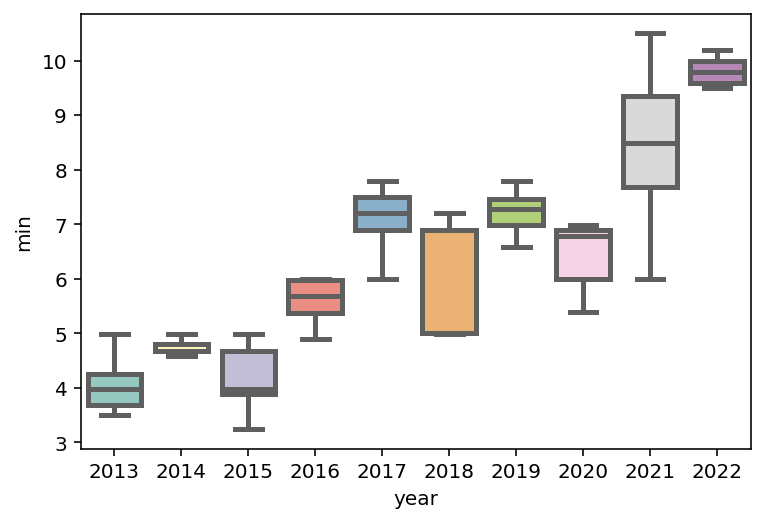

In [46]:
# Outliers values from min, solved
sns.boxplot(x="year", y="min", data=dfc, linewidth=2.5,palette="Set3")
plt.show()


## Treating outliers from mcom

In [47]:
dfc.loc[(dfc['year'] == 2020) & (dfc['month'] == 4)]

Unnamed: 0  day  month  year                   prod und   proc  \
date                                                                         
2020-04-01         201    1      4  2020  Peixe de agua salgada  Kg  RS-SC   
2020-04-02         926    2      4  2020  Peixe de agua salgada  Kg  RS-SC   
2020-04-03        1699    3      4  2020  Peixe de agua salgada  Kg  RS-SC   
2020-04-06        4137    6      4  2020  Peixe de agua salgada  Kg  RS-SC   
2020-04-07        4964    7      4  2020  Peixe de agua salgada  Kg  RS-SC   
2020-04-08        5725    8      4  2020  Peixe de agua salgada  Kg  RS-SC   
2020-04-09        6455    9      4  2020  Peixe de agua salgada  Kg  RS-SC   
2020-04-13        9627   13      4  2020  Peixe de agua salgada  Kg  RS-SC   
2020-04-14       10445   14      4  2020  Peixe de agua salgada  Kg  RS-SC   
2020-04-15       11254   15      4  2020  Peixe de agua salgada  Kg  RS-SC   
2020-04-16       11983   16      4  2020  Peixe de agua salgada  Kg  RS-SC   
2020-04-17       12713   17      4  2020  Peixe de agua salgada  Kg  RS-SC   
2020-04-20       15152   20      4  2020  Peixe de agua salgada  Kg  RS-SC   
2020-04-22       16727   22      4  2020  Peixe de agua salgada  Kg  RS-SC   
2020-04-23       17521   23      4  2020  Peixe de agua salgada  Kg  RS-SC   
2020-04-24       18289   24      4  2020  Peixe de agua salgada  Kg  RS-SC   
2020-04-27       20496   27      4  2020  Peixe de agua salgada  Kg  RS-SC   
2020-04-28       21288   28      4  2020  Peixe de agua salgada  Kg  RS-SC   
2020-04-29       22062   29      4  2020  Peixe de agua salgada  Kg  RS-SC   
2020-04-30       22849   30      4  2020  Peixe de agua salgada  Kg  RS-SC   

                tipo   min  mcom   max merc    mm  Full_date  
date                                                          
2020-04-01  Sardinha  6.98  7.50  8.99  Est  2.01   1-4-2020  
2020-04-02  Sardinha  6.98  7.50  8.99  Est  2.01   2-4-2020  
2020-04-03  Sardinha  6.98  8.90  8.99  Fir  2.01   3-4-2020  
2020-04-06  Sardinha  6.98  8.90  8.99  Est  2.01   6-4-2020  
2020-04-07  Sardinha  6.98  8.90  8.99  Est  2.01   7-4-2020  
2020-04-08  Sardinha  6.98  8.90  8.99  Est  2.01   8-4-2020  
2020-04-09  Sardinha  6.98  8.90  8.99  Est  2.01   9-4-2020  
2020-04-13  Sardinha  6.98  8.90  8.99  Est  2.01  13-4-2020  
2020-04-14  Sardinha  6.98  7.99  8.90  Fir  1.92  14-4-2020  
2020-04-15  Sardinha  6.98  7.99  8.90  Est  1.92  15-4-2020  
2020-04-16  Sardinha  6.98  7.99  8.90  Est  1.92  16-4-2020  
2020-04-17  Sardinha  6.98  7.99  8.90  Est  1.92  17-4-2020  
2020-04-20  Sardinha  6.98  7.99  8.90  Est  1.92  20-4-2020  
2020-04-22  Sardinha  5.39  6.98  8.90  Fra  3.51  22-4-2020  
2020-04-23  Sardinha  5.39  6.98  8.90  Est  3.51  23-4-2020  
2020-04-24  Sardinha  6.89  6.98  8.90  Est  2.01  24-4-2020  
2020-04-27  Sardinha  6.89  6.98  8.90  Est  2.01  27-4-2020  
2020-04-28  Sardinha  6.89  6.98  8.90  Est  2.01  28-4-2020  
2020-04-29  Sardinha  6.89  6.98  8.90  Est  2.01  29-4-2020  
2020-04-30  Sardinha  6.89  6.98  8.90  Est  2.01  30-4-2020

In [48]:
# Get replacement value
# 2013
val = dfc.loc[dfc['Full_date'].eq('1-3-2013').idxmax(), 'mcom']

# slice and replace
m = dfc['year'].eq(2013) & dfc['mcom'].gt(5)
dfc.loc[m, 'mcom'] = val

In [49]:
# Get replacement value
# 2014
val = dfc.loc[dfc['Full_date'].eq('6-5-2014').idxmax(), 'mcom']
val2 = dfc.loc[dfc['Full_date'].eq('20-2-2014').idxmax(), 'mcom']

# slice and replace
m = dfc['year'].eq(2014) & dfc['mcom'].gt(5)
m2 = dfc['year'].eq(2014) & dfc['mcom'].lt(4.5)

dfc.loc[m, 'mcom'] = val
dfc.loc[m2, 'mcom'] = val2

In [50]:
# Get replacement value
# 2016
val = dfc.loc[dfc['Full_date'].eq('29-4-2016').idxmax(), 'mcom']
val2 = dfc.loc[dfc['Full_date'].eq('5-1-2016').idxmax(), 'mcom']

# slice and replace
m = dfc['year'].eq(2016) & dfc['mcom'].gt(6)
m2 = dfc['year'].eq(2016) & dfc['mcom'].lt(5.5)

dfc.loc[m, 'mcom'] = val
dfc.loc[m2, 'mcom'] = val2

In [51]:
# Get replacement value
# 2017
val = dfc.loc[dfc['Full_date'].eq('7-8-2017').idxmax(), 'mcom']


# slice and replace
m = dfc['year'].eq(2017) & dfc['mcom'].gt(8)


dfc.loc[m, 'mcom'] = val


In [52]:
# Get replacement value
# 2018
val = dfc.loc[dfc['Full_date'].eq('15-1-2018').idxmax(), 'mcom']


# slice and replace
m = dfc['year'].eq(2018) & dfc['mcom'].lt(6.5)


dfc.loc[m, 'mcom'] = val


In [53]:
# Get replacement value
# 2020
val = dfc.loc[dfc['Full_date'].eq('15-4-2020').idxmax(), 'mcom']

# slice and replace
m = dfc['year'].eq(2020) & dfc['mcom'].gt(8)
dfc.loc[m, 'mcom'] = val



In [54]:
m = dfc['min']>dfc['max']

dfc.loc[m, ['max','min']] = dfc.loc[m, ['min','max']].values

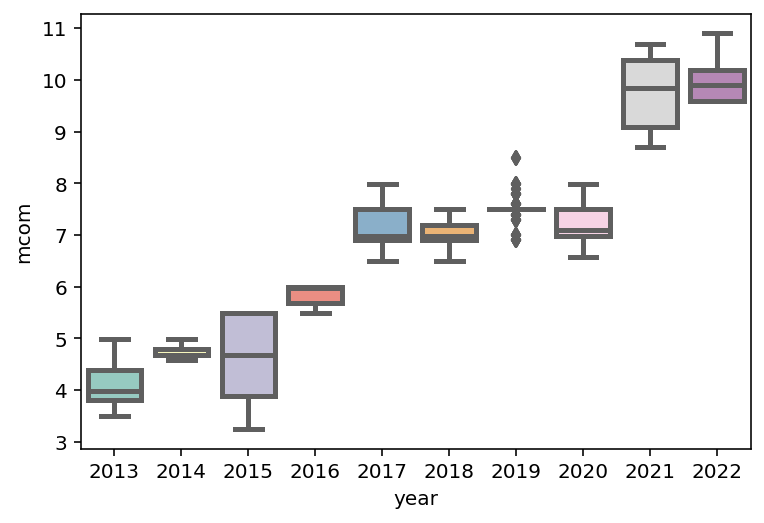

In [55]:
# It seems like the outlier troubles from mcom had been solved
sns.boxplot(x="year", y="mcom", data=dfc, linewidth=2.5,palette="Set3")
plt.show()

## Making the mm column again

In [56]:
dfc['mm'] = dfc['max']-dfc['min']

## plotting graphs

Text(0.5, 0, 'Year')

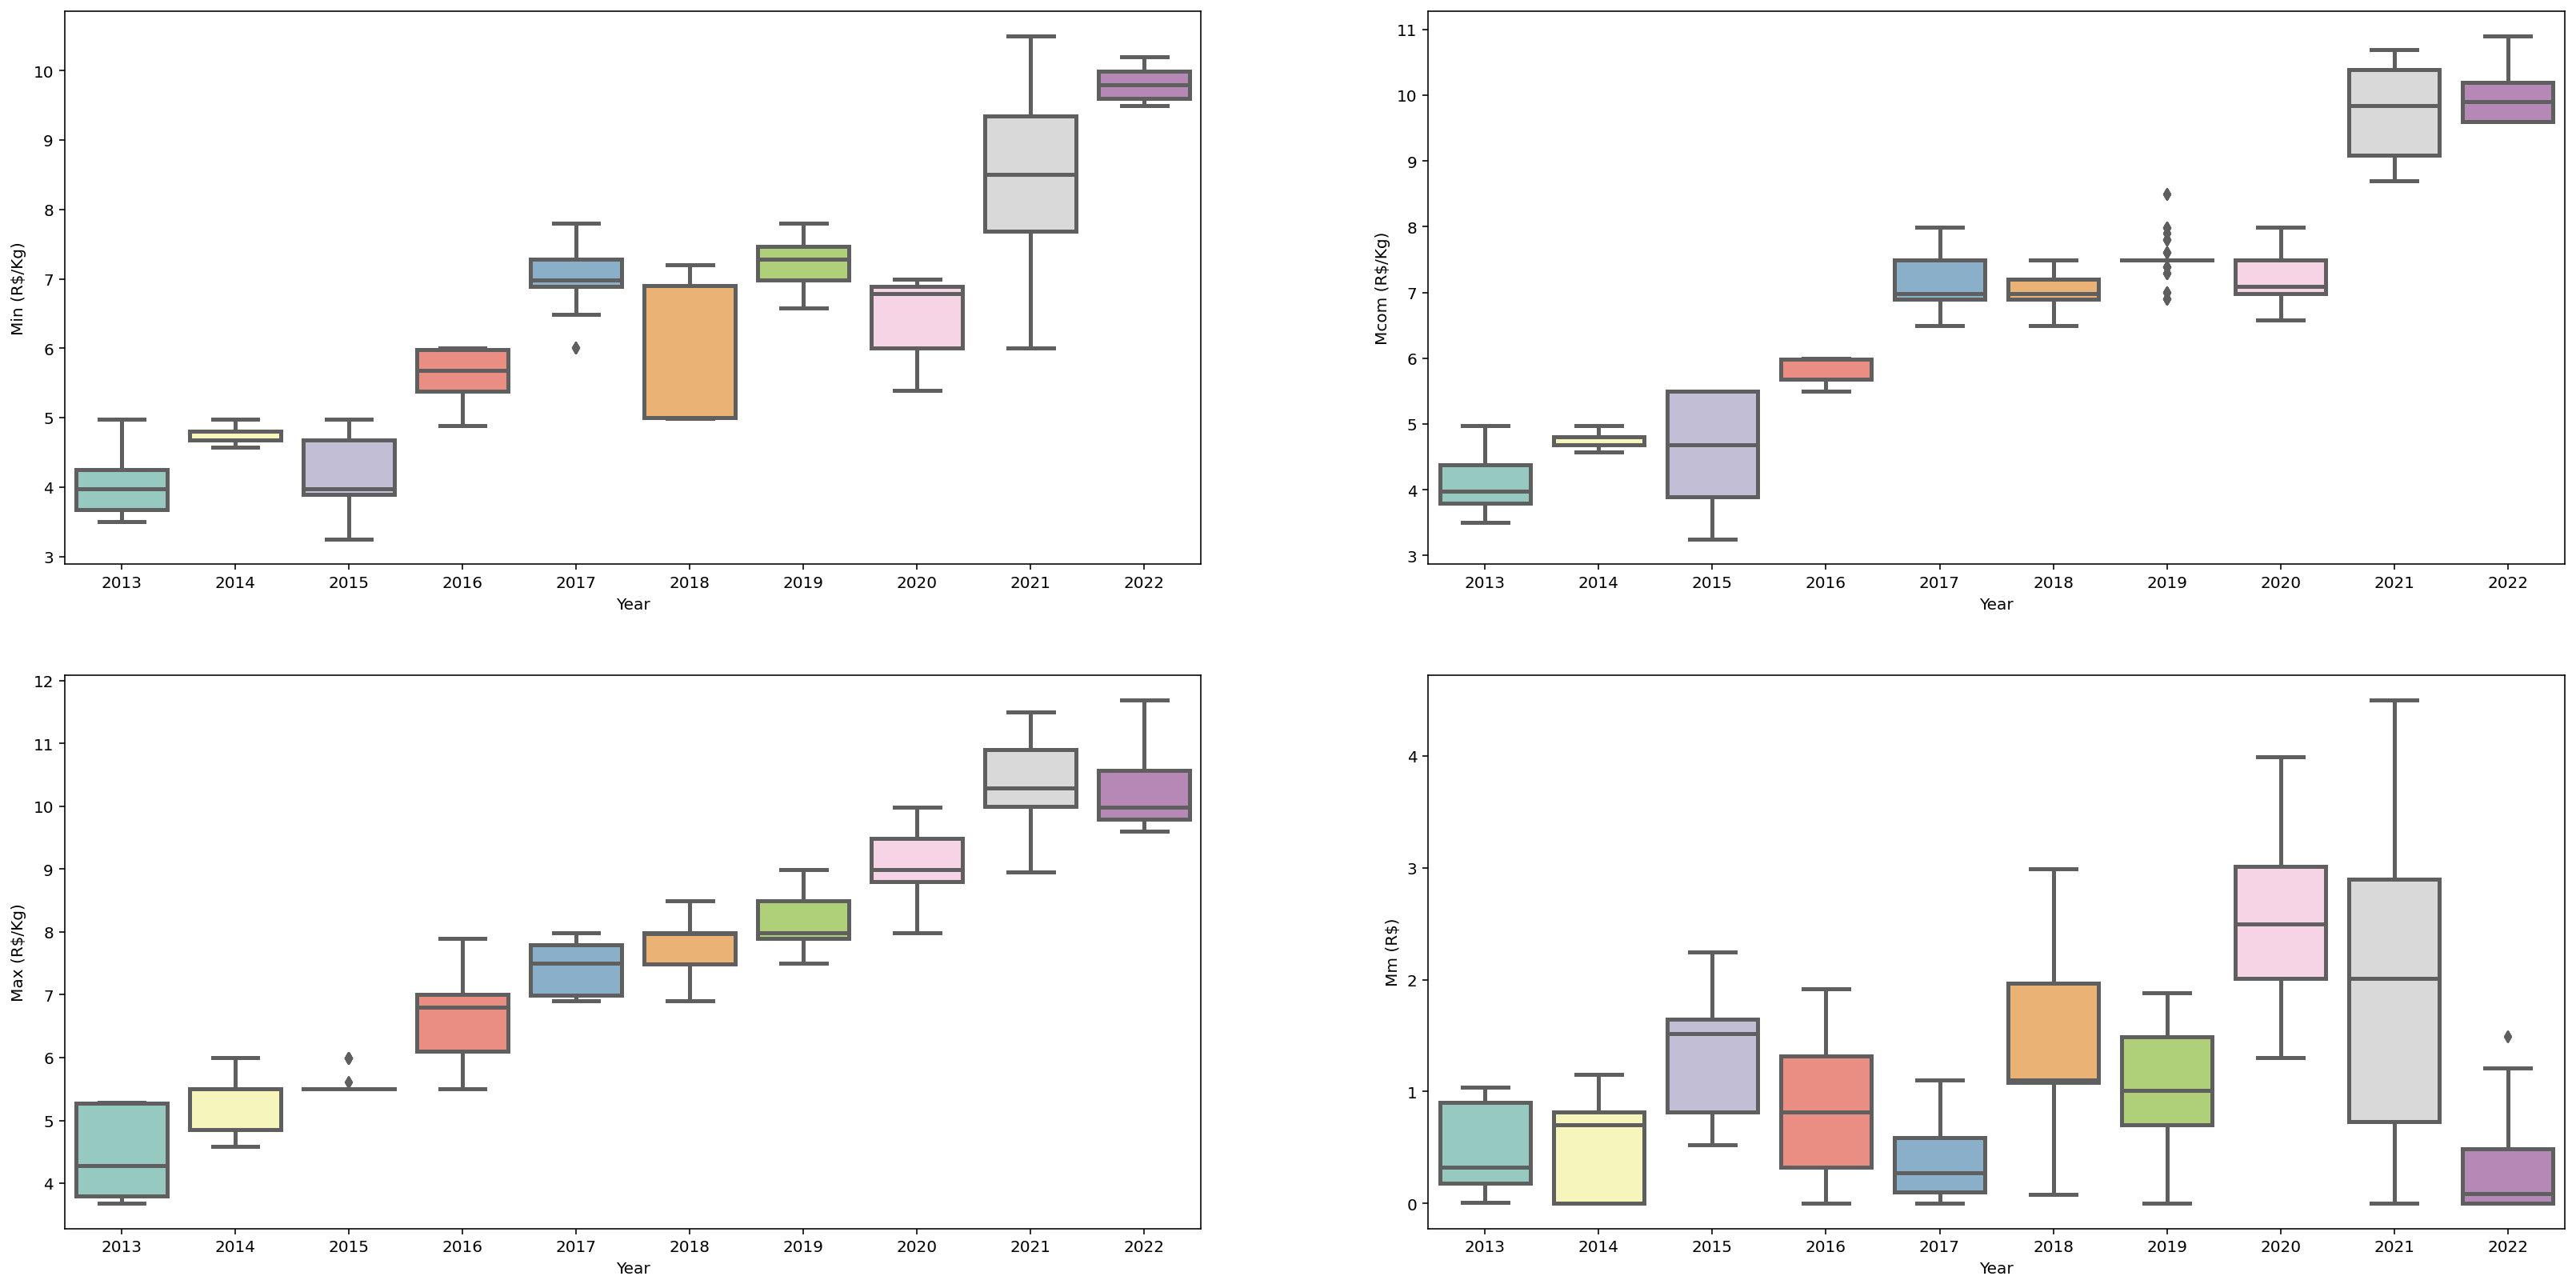

In [57]:
fig, axes = plt.subplots(2, 2, figsize=(28, 14))

sns.boxplot(x="year", y="min", data=dfc, linewidth=2.5,palette="Set3", ax=axes[0,0])
axes[0, 0].set_ylabel('Min (R$/Kg)')
axes[0, 0].set_xlabel('Year')

sns.boxplot(x="year", y="mcom", data=dfc, linewidth=2.5,palette="Set3", ax=axes[0,1])
axes[0, 1].set_ylabel('Mcom (R$/Kg)')
axes[0, 1].set_xlabel('Year')

sns.boxplot(x="year", y="max", data=dfc, linewidth=2.5,palette="Set3", ax=axes[1,0])
axes[1, 0].set_ylabel('Max (R$/Kg)')
axes[1, 0].set_xlabel('Year')

sns.boxplot(x="year", y="mm", data=dfc, linewidth=2.5,palette="Set3", ax=axes[1,1])
axes[1, 1].set_ylabel('Mm (R$)')
axes[1, 1].set_xlabel('Year')

Text(0.5, 0, 'Month')

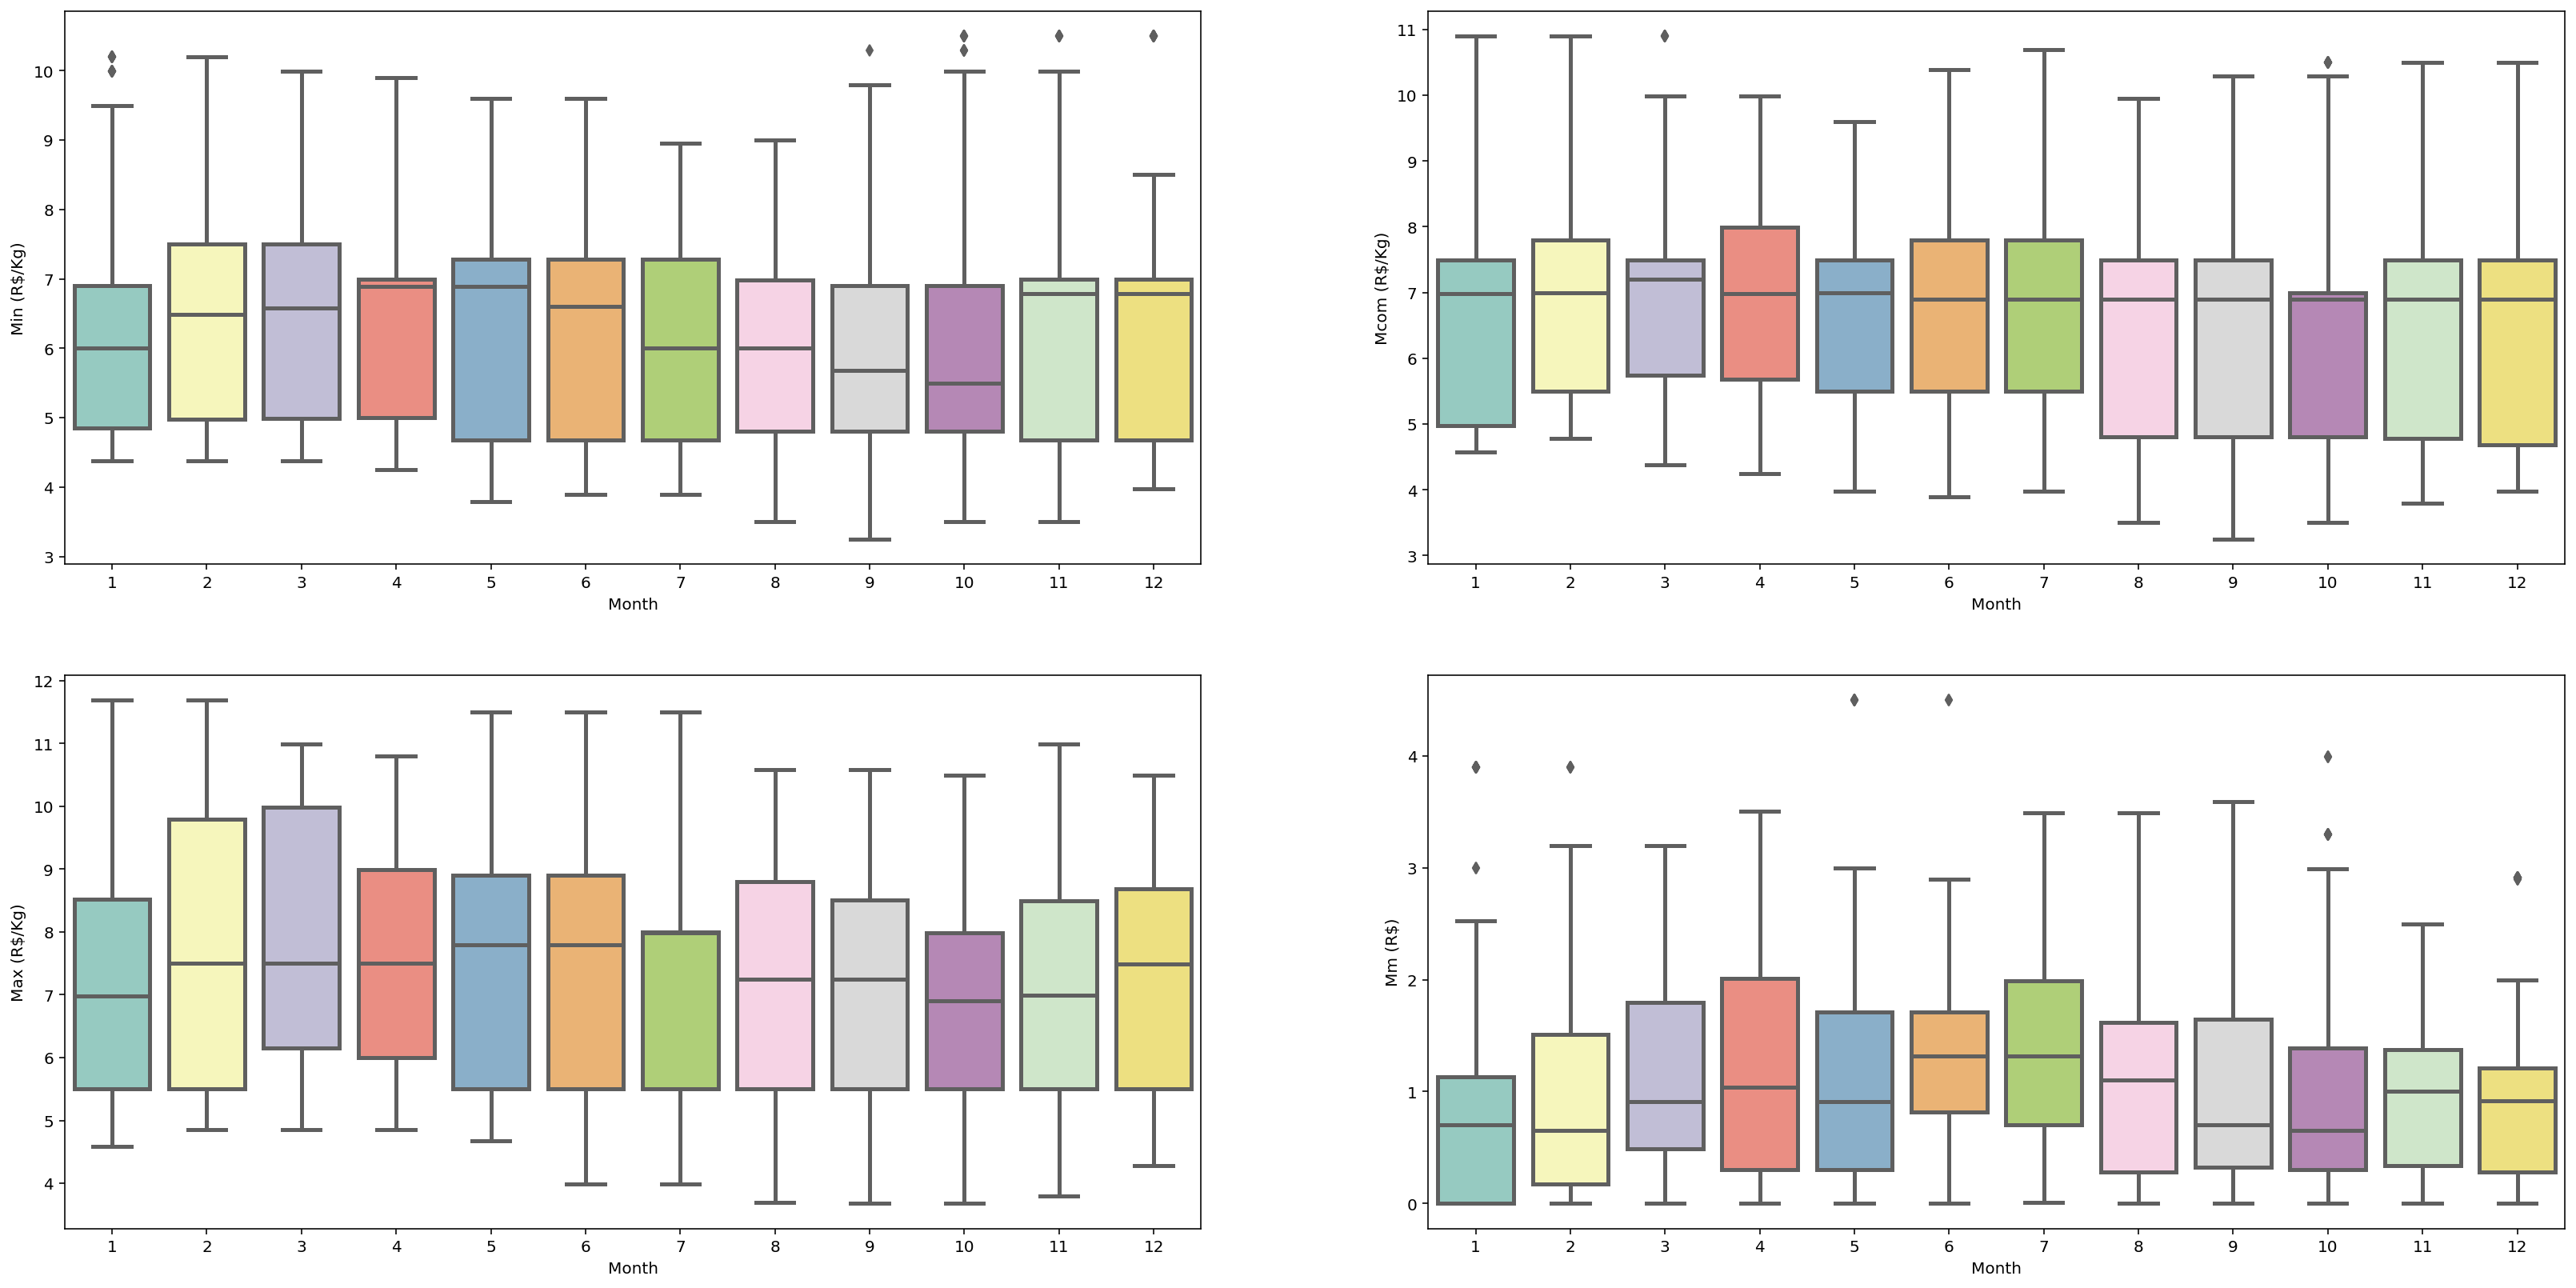

In [58]:
fig, axes = plt.subplots(2, 2, figsize=(28, 14))
sns.boxplot(x="month", y="min", data=dfc, linewidth=2.5,palette="Set3", ax = axes[0,0])
axes[0, 0].set_ylabel('Min (R$/Kg)')
axes[0, 0].set_xlabel('Month')
sns.boxplot(x="month", y="mcom", data=dfc, linewidth=2.5,palette="Set3", ax = axes[0,1])
axes[0, 1].set_ylabel('Mcom (R$/Kg)')
axes[0, 1].set_xlabel('Month')
sns.boxplot(x="month", y="max", data=dfc, linewidth=2.5,palette="Set3", ax = axes[1,0])
axes[1, 0].set_ylabel('Max (R$/Kg)')
axes[1, 0].set_xlabel('Month')
sns.boxplot(x="month", y="mm", data=dfc, linewidth=2.5,palette="Set3", ax = axes[1,1])
axes[1, 1].set_ylabel('Mm (R$)')
axes[1, 1].set_xlabel('Month')

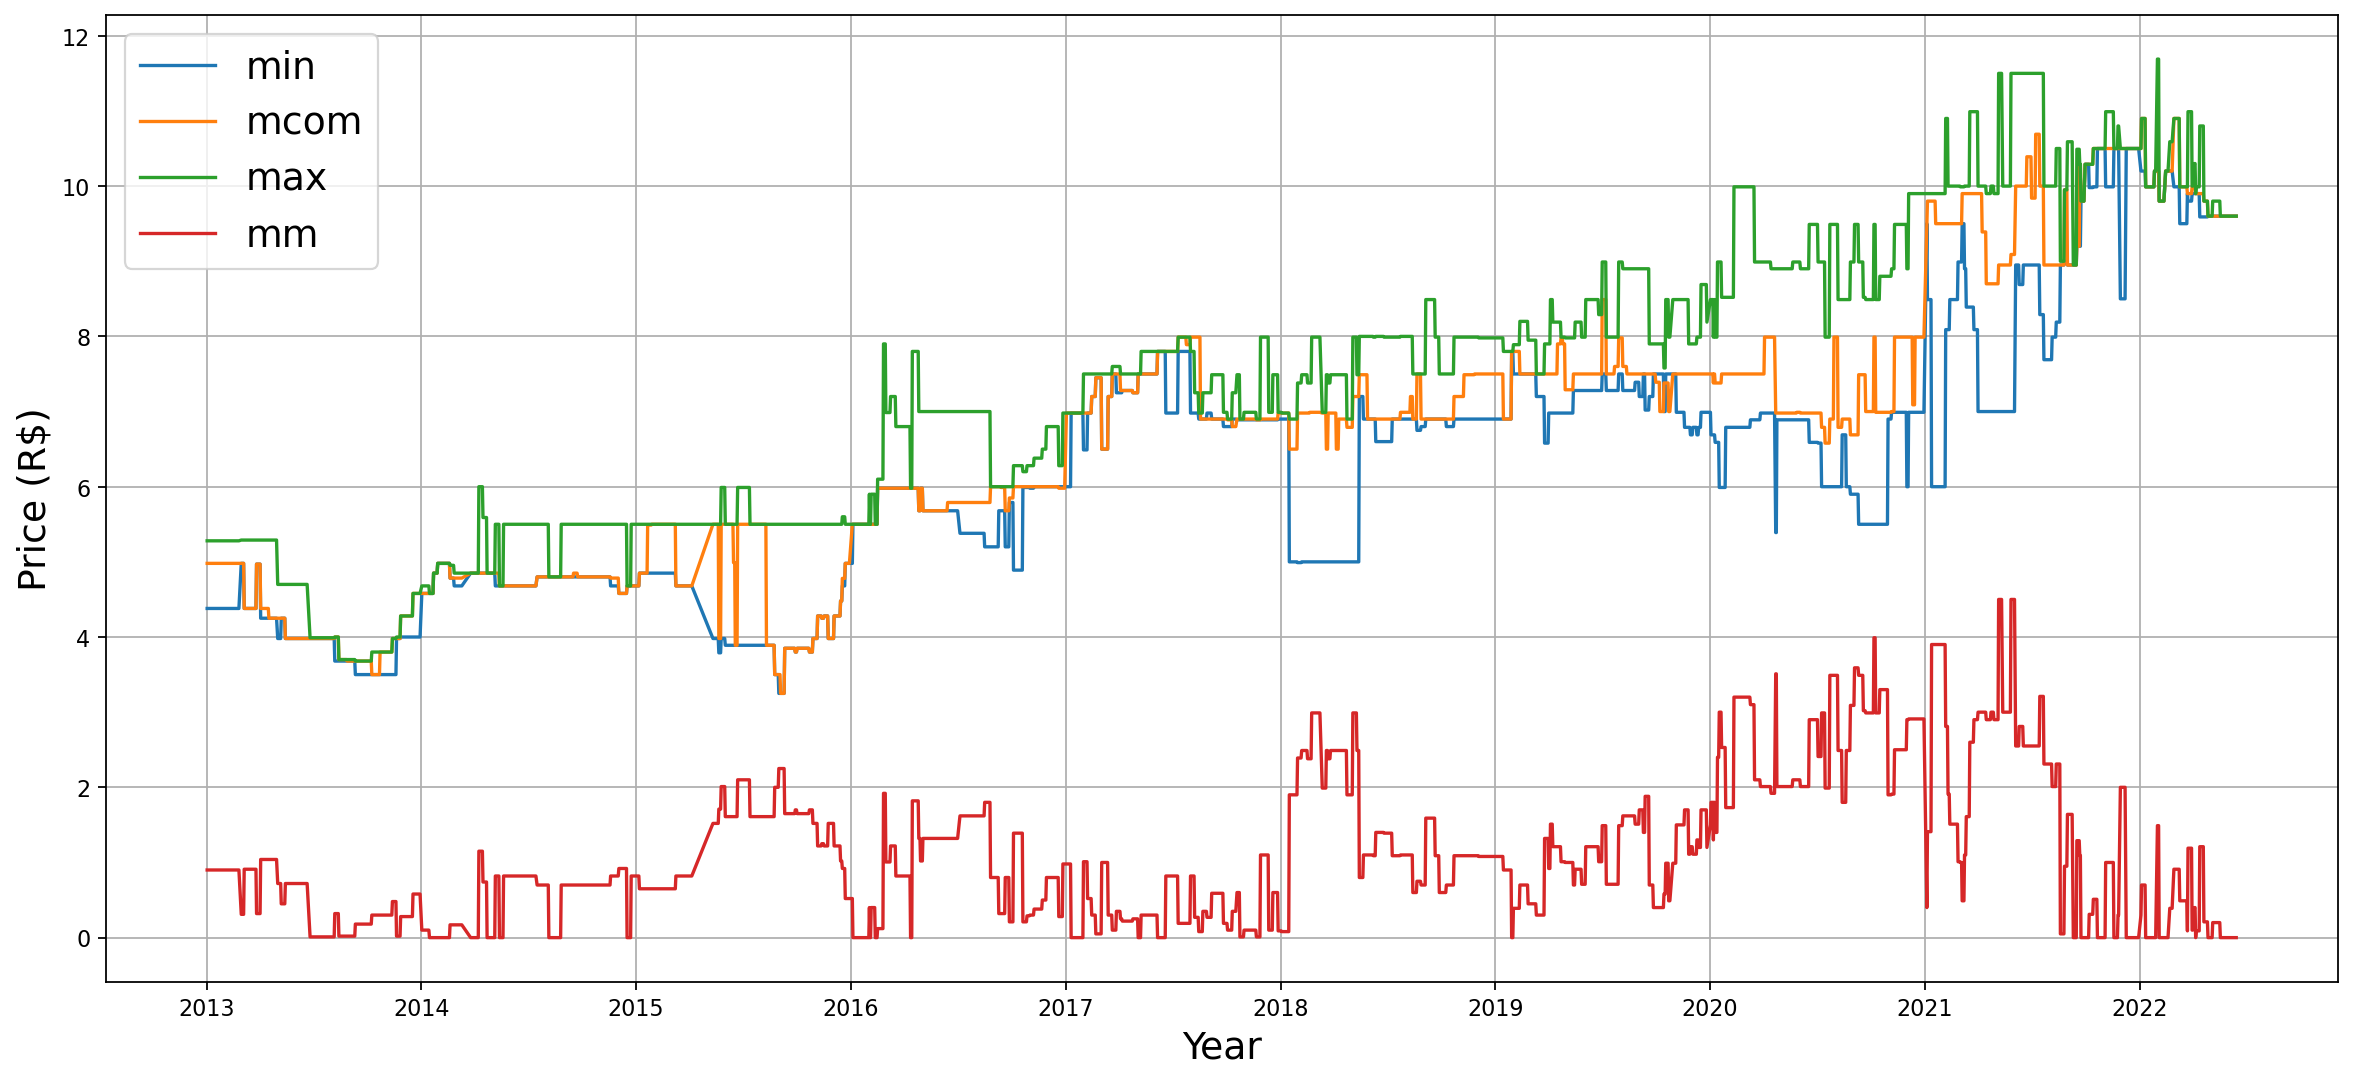

In [59]:
fig, axes = plt.subplots(1, 1, figsize=(18,8), dpi=80)
plt.rcParams['font.size'] = '17'
plt.rcParams['xtick.labelsize'] = '17'
plt.xlabel("Year",  fontsize=17)
plt.ylabel("Price (R$)",  fontsize=17)
plt.grid()
plt.plot(dfc['min'],label='min')
plt.plot(dfc['mcom'],label='mcom')
plt.plot(dfc['max'],label='max')
plt.plot(dfc['mm'],label='mm')
plt.legend()
#plt.savefig('series_of.jpg',dpi=400)

## Adfuller
As we are working with time series, we are going to make some analysis before modeling in order to check stationarity and seasonality. The first thing we're making is the Adfuller test which is a test of the stationarity from the variables.

In [60]:
# subseting the dataframe
df = dfc['max']

# using the akaike criterium information to estimate the number of lags
adft = adfuller(df, autolag="AIC")
output_df = pd.DataFrame(
    {"Values": [adft[0], adft[1], adft[2], adft[3], adft[4]['1%'], adft[4]['5%'], adft[4]['10%']], "Metric": ["Test Statistics", "p-value", "No. of lags used", "Number of observations used",
                                                                                                              "critical value (1%)", "critical value (5%)", "critical value (10%)"]})
print(output_df)

        Values                       Metric
0    -1.281578              Test Statistics
1     0.637557                      p-value
2    10.000000             No. of lags used
3  2242.000000  Number of observations used
4    -3.433270          critical value (1%)
5    -2.862830          critical value (5%)
6    -2.567457         critical value (10%)


In [61]:
df = dfc['min']

adft = adfuller(df, autolag="AIC")
output_df = pd.DataFrame({"Values": [adft[0], adft[1], adft[2], adft[3], adft[4]['1%'], adft[4]['5%'], adft[4]['10%']], "Metric": ["Test Statistics", "p-value", "No. of lags used", "Number of observations used",
                                                                                                                                   "critical value (1%)", "critical value (5%)", "critical value (10%)"]})
print(output_df)

        Values                       Metric
0    -1.089671              Test Statistics
1     0.719173                      p-value
2    24.000000             No. of lags used
3  2228.000000  Number of observations used
4    -3.433288          critical value (1%)
5    -2.862838          critical value (5%)
6    -2.567461         critical value (10%)


In [62]:
df = dfc['mcom']

adft = adfuller(df, autolag="AIC")
output_df = pd.DataFrame({"Values": [adft[0], adft[1], adft[2], adft[3], adft[4]['1%'], adft[4]['5%'], adft[4]['10%']], "Metric": ["Test Statistics", "p-value", "No. of lags used", "Number of observations used",
                                                                                                                                   "critical value (1%)", "critical value (5%)", "critical value (10%)"]})
print(output_df)

        Values                       Metric
0    -0.892797              Test Statistics
1     0.790335                      p-value
2    22.000000             No. of lags used
3  2230.000000  Number of observations used
4    -3.433286          critical value (1%)
5    -2.862837          critical value (5%)
6    -2.567460         critical value (10%)


In [63]:
df = dfc['mm']

adft = adfuller(df, autolag="AIC")
output_df = pd.DataFrame({"Values": [adft[0], adft[1], adft[2], adft[3], adft[4]['1%'], adft[4]['5%'], adft[4]['10%']], "Metric": ["Test Statistics", "p-value", "No. of lags used", "Number of observations used",
                                                                                                                                   "critical value (1%)", "critical value (5%)", "critical value (10%)"]})
print(output_df)

        Values                       Metric
0    -3.758664              Test Statistics
1     0.003360                      p-value
2    10.000000             No. of lags used
3  2242.000000  Number of observations used
4    -3.433270          critical value (1%)
5    -2.862830          critical value (5%)
6    -2.567457         critical value (10%)


## Autocorrelation
The knowledge about the autocorrelation of a variable is essential to know how long will be our forecastings when working with univariate analysis, because it says for us how long we may predict with confiability.

In [64]:
autocorrelation_lag7 = dfc['min'].autocorr(lag=7)
print("One Week Lag: ", autocorrelation_lag7)

autocorrelation_lag30 = dfc['min'].autocorr(lag=30)
print("One Month Lag: ", autocorrelation_lag30)

autocorrelation_lag365 = dfc['min'].autocorr(lag=365)
print("One Year Lag: ", autocorrelation_lag365)

One Week Lag:  0.9673463591891241
One Month Lag:  0.9154443261584709
One Year Lag:  0.5280506646864984


In [65]:
autocorrelation_lag7 = dfc['max'].autocorr(lag=7)
print("One Week Lag: ", autocorrelation_lag7)

autocorrelation_lag30 = dfc['max'].autocorr(lag=30)
print("One Month Lag: ", autocorrelation_lag30)

autocorrelation_lag365 = dfc['max'].autocorr(lag=365)
print("One Year Lag: ", autocorrelation_lag365)

One Week Lag:  0.9749137142486161
One Month Lag:  0.9540484501533467
One Year Lag:  0.8778266239038649


In [66]:
autocorrelation_lag7 = dfc['mcom'].autocorr(lag=7)
print("One Week Lag: ", autocorrelation_lag7)

autocorrelation_lag30 = dfc['mcom'].autocorr(lag=30)
print("One Month Lag: ", autocorrelation_lag30)

autocorrelation_lag365 = dfc['mcom'].autocorr(lag=365)
print("One Year Lag: ", autocorrelation_lag365)

One Week Lag:  0.9814995600788644
One Month Lag:  0.9502744902089273
One Year Lag:  0.7053698626851408


In [67]:
autocorrelation_lag7 = dfc['mm'].autocorr(lag=7)
print("One Week Lag: ", autocorrelation_lag7)

autocorrelation_lag30 = dfc['mm'].autocorr(lag=30)
print("One Month Lag: ", autocorrelation_lag30)

autocorrelation_lag365 = dfc['mm'].autocorr(lag=365)
print("One Year Lag: ", autocorrelation_lag365)

One Week Lag:  0.8126378229881134
One Month Lag:  0.6685438961961162
One Year Lag:  -0.1614169386850345


## Rollingmean, Rolling standard deviation and rolling coefficient of variation
The knowlegde about these topics are important due to allow us to realize the volatility of the variables

In [114]:
#rolling mean, rolling std and rolling cv for minimum prices
rolling_mean = dfc['min'].rolling(30).mean()
rolling_std = dfc['min'].rolling(30).std()
rolling_cv = rolling_std/rolling_mean

#rolling mean, rolling std and rolling cv for maximum prices
rolling_meanm = dfc['max'].rolling(30).mean()
rolling_stdm = dfc['max'].rolling(30).std()
rolling_cvm = rolling_stdm/rolling_meanm

#rolling mean, rolling std and rolling cv for most common prices
rolling_meanmc = dfc['mcom'].rolling(30).mean()
rolling_stdmc = dfc['mcom'].rolling(30).std()
rolling_cvmc = rolling_stdmc/rolling_meanmc

#rolling mean, rolling std and rolling cv for range of prices
rolling_meanmm = dfc['mm'].rolling(30).mean()
rolling_stdmm = dfc['mm'].rolling(30).std()
rolling_cvmm = rolling_stdmm/rolling_meanmm


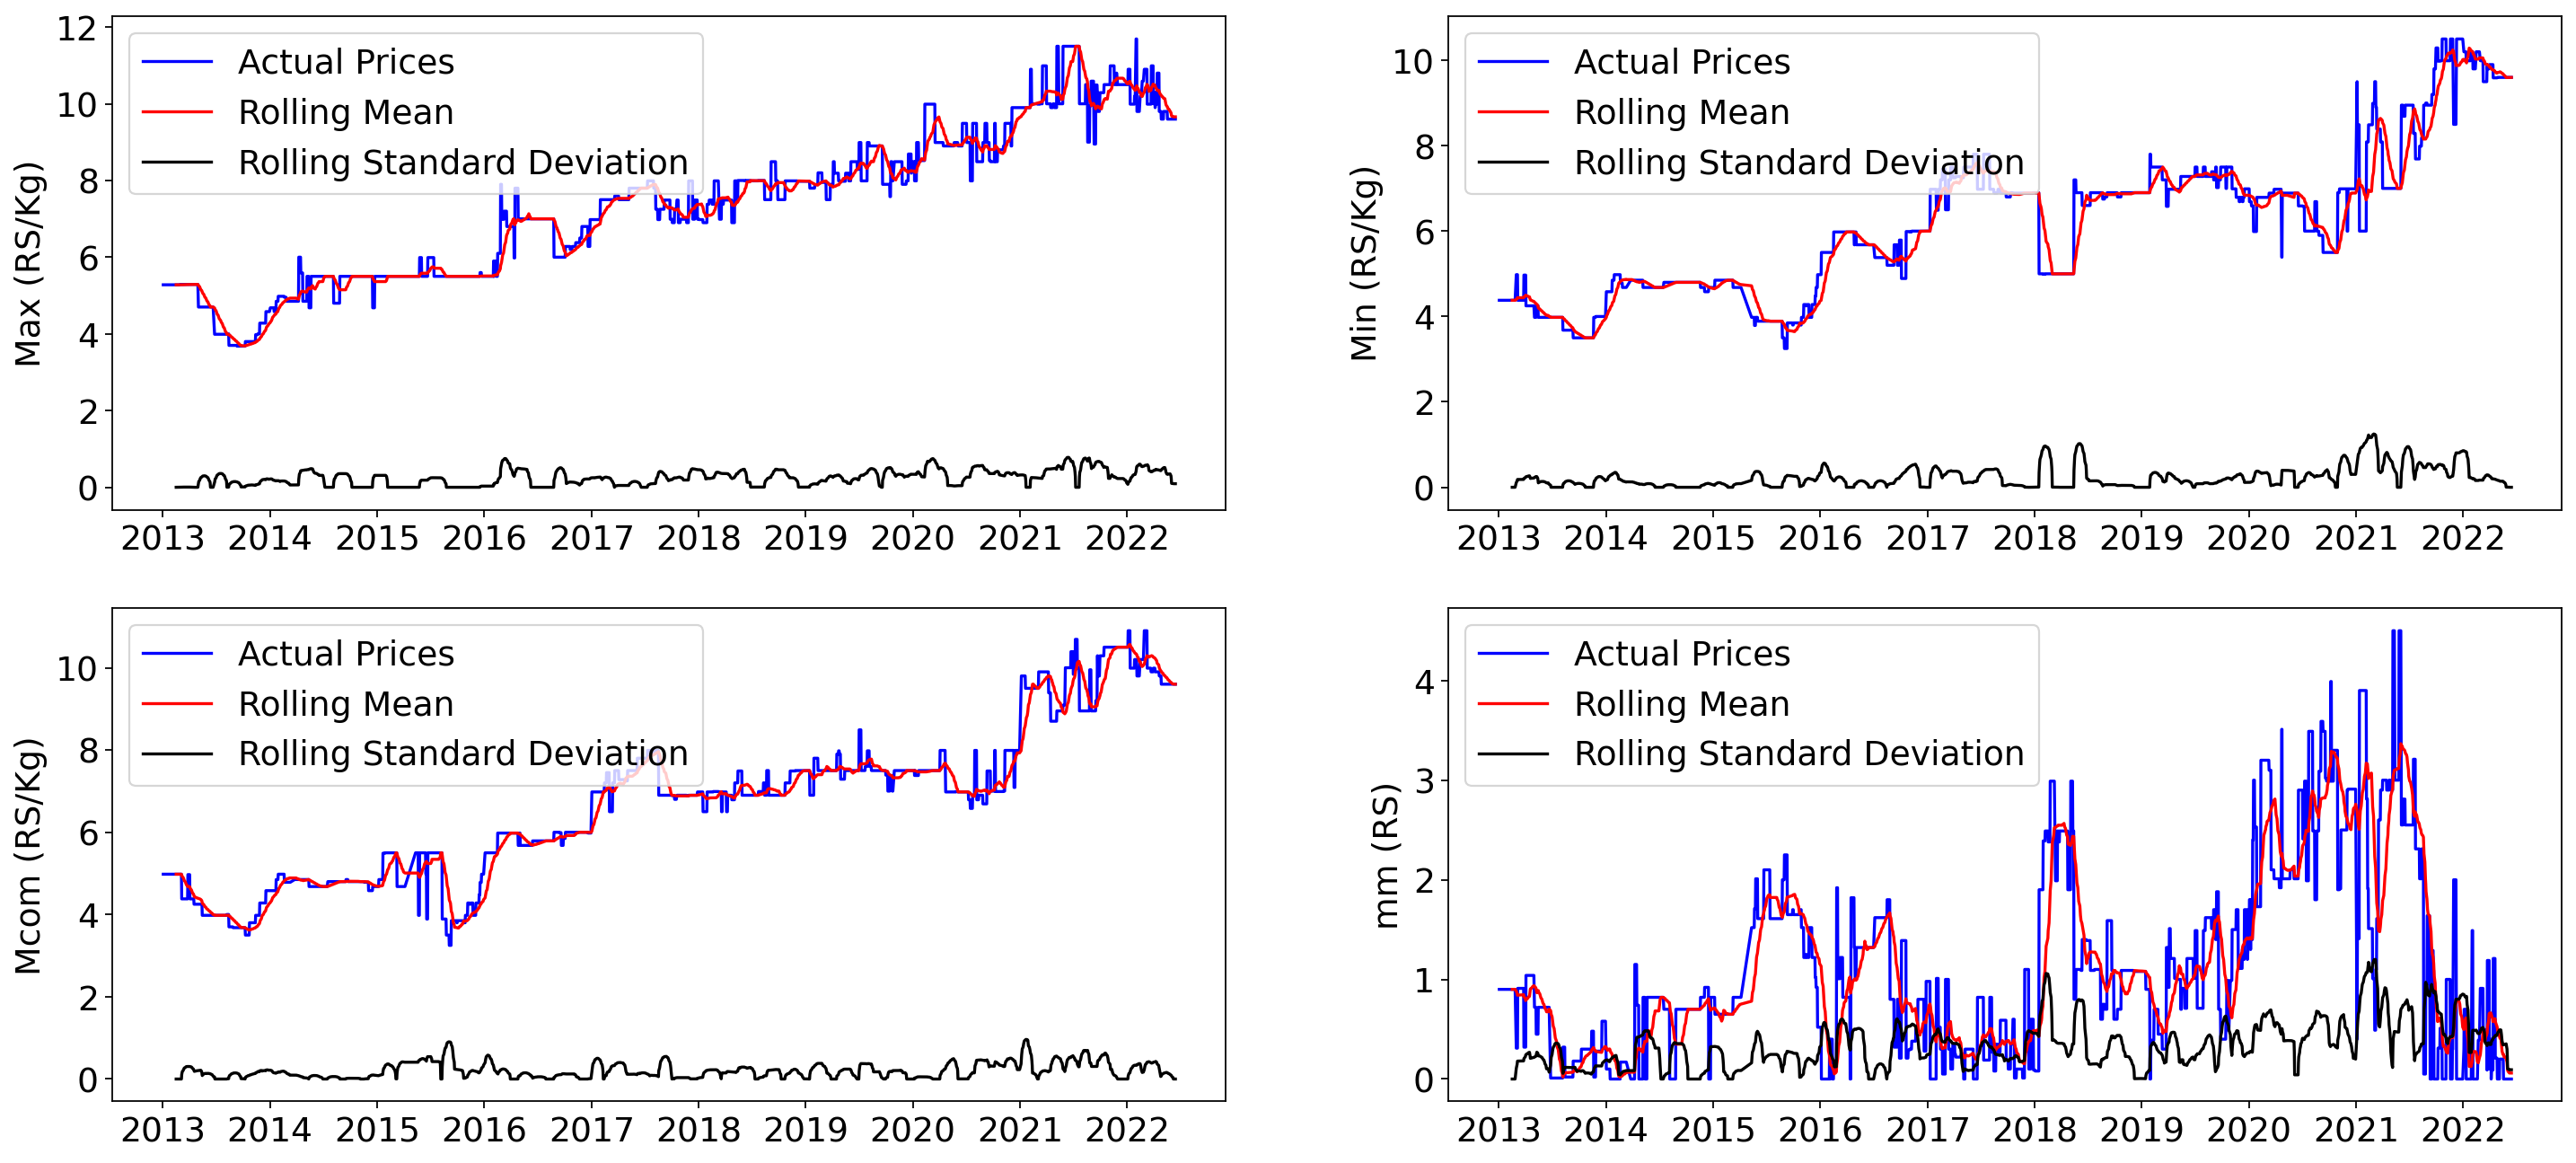

In [68]:
fig, axes = plt.subplots(2, 2, figsize=(22,10), dpi= 80)
plt.rcParams.update({'font.size': 17})
plt.rcParams['xtick.labelsize'] = '17'
axes[1, 0].plot(dfc['mcom'], color="blue",label="Actual Prices")
axes[1, 0].plot(rolling_meanmc, color="red", label="Rolling Mean")
axes[1, 0].plot(rolling_stdmc, color="black", label = "Rolling Standard Deviation")
axes[1, 0].legend(loc="best")
axes[1, 0].set_ylabel('Mcom (RS/Kg)')
axes[1, 1].plot(dfc['mm'], color="blue",label="Actual Prices")
axes[1, 1].plot(rolling_meanmm, color="red", label="Rolling Mean")
axes[1, 1].plot(rolling_stdmm, color="black", label = "Rolling Standard Deviation")
axes[1, 1].legend(loc="best")
axes[1, 1].set_ylabel('mm (RS)')
axes[0, 0].plot(dfc['max'], color="blue",label="Actual Prices")
axes[0, 0].plot(rolling_meanm, color="red", label="Rolling Mean")
axes[0, 0].plot(rolling_stdm, color="black", label = "Rolling Standard Deviation")
axes[0, 0].legend(loc="best")
axes[0, 0].set_ylabel('Max (RS/Kg)')
axes[0, 1].plot(dfc['min'], color="blue",label="Actual Prices")
axes[0, 1].plot(rolling_mean, color="red", label="Rolling Mean")
axes[0, 1].plot(rolling_std, color="black", label = "Rolling Standard Deviation")
axes[0, 1].legend(loc="best")
axes[0, 1].set_ylabel('Min (RS/Kg)')
#plt.savefig('rollingmeancombinedmmm.jpg',dpi=400)

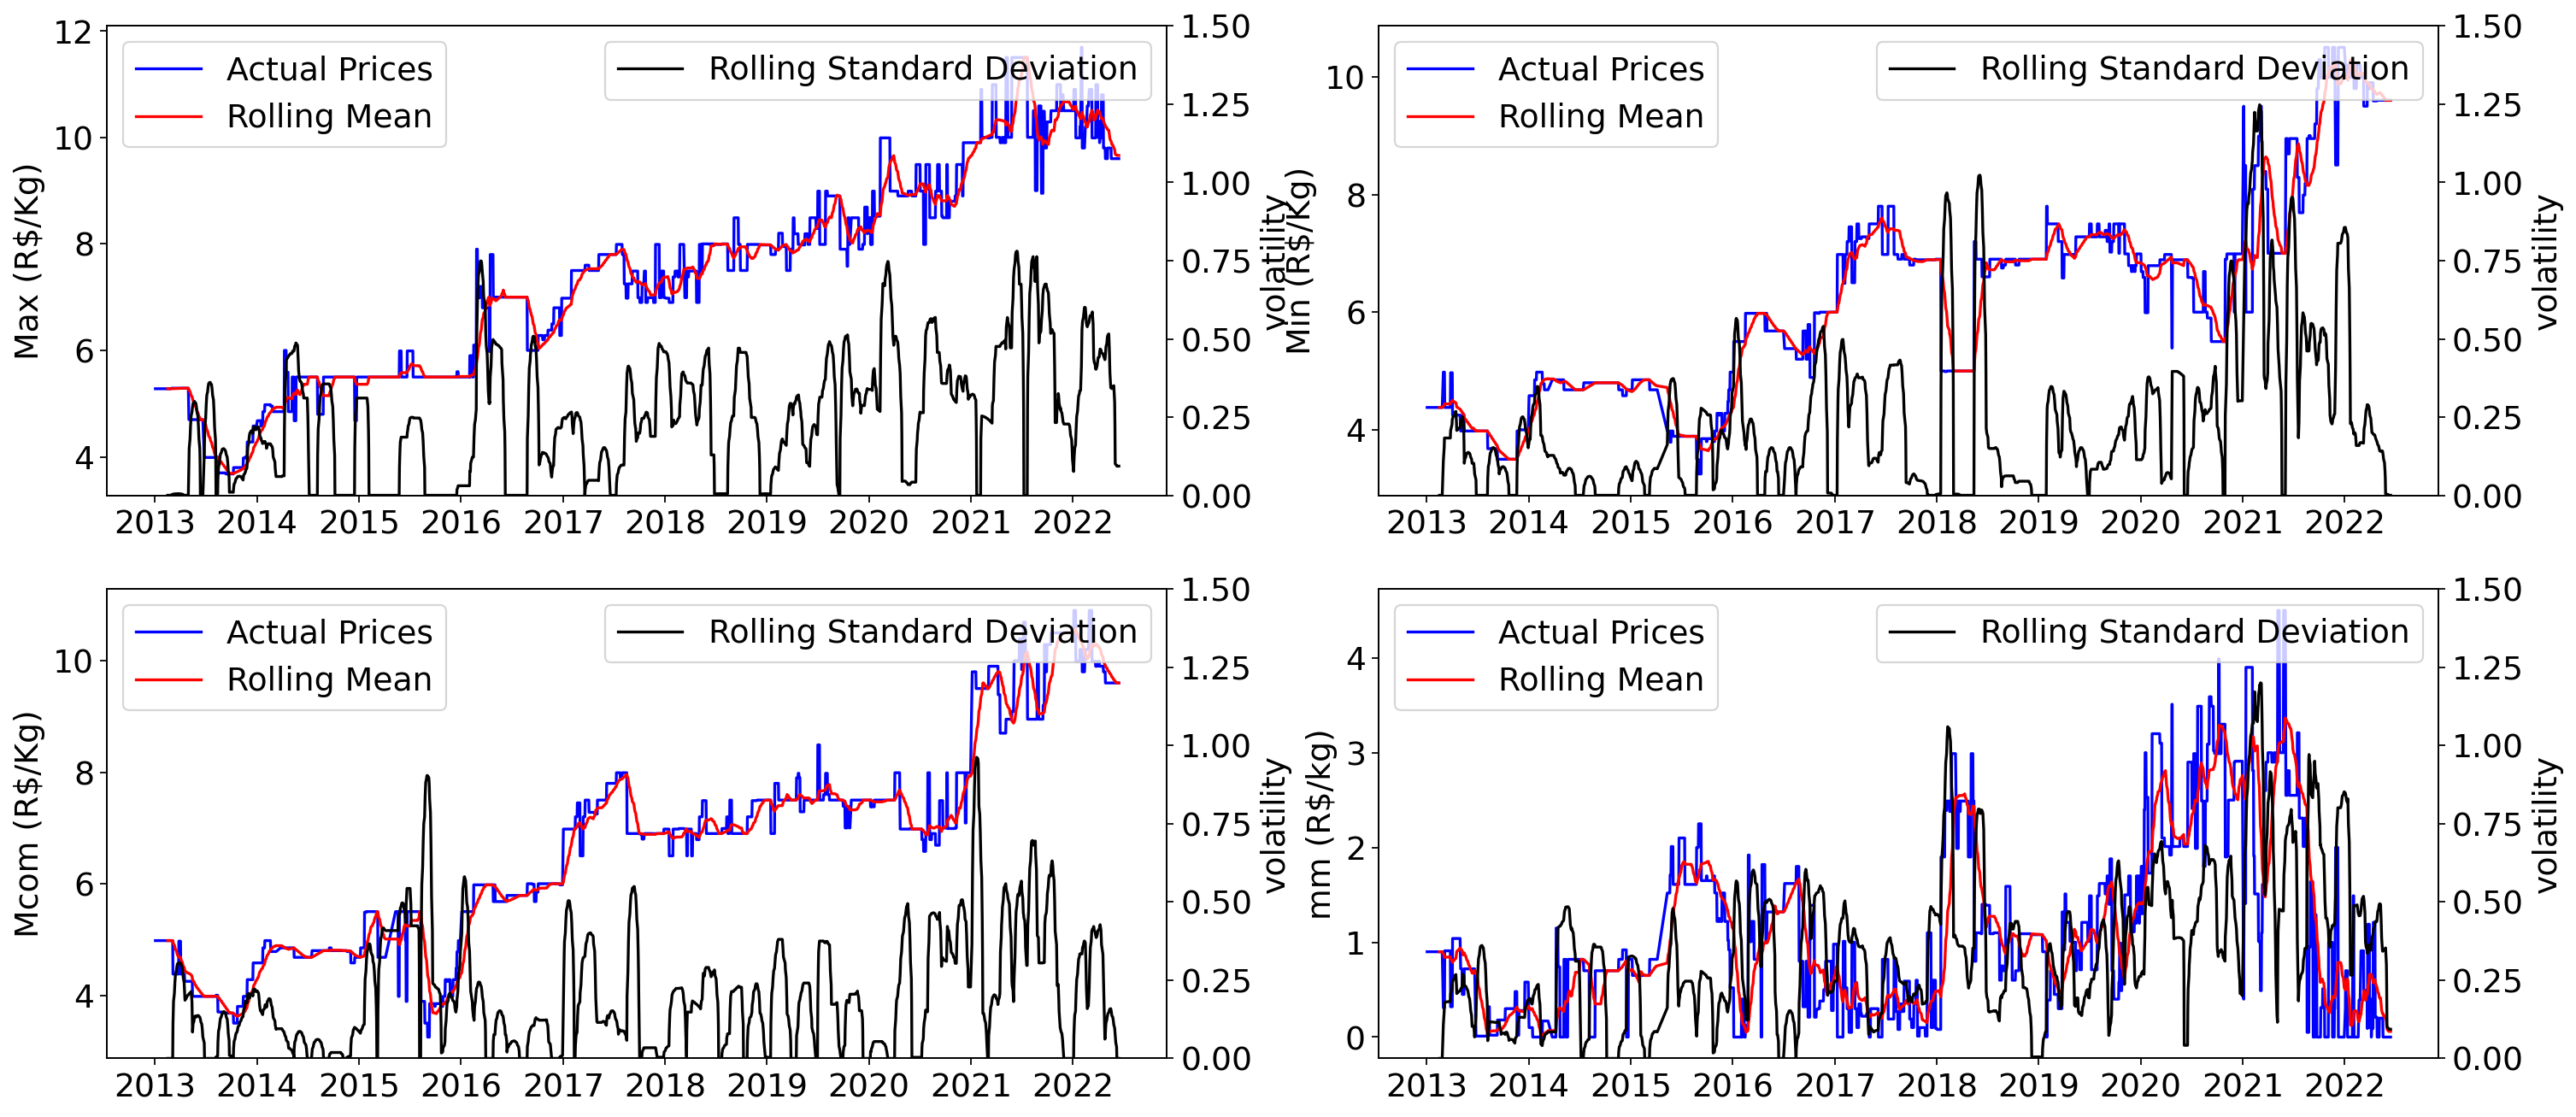

In [101]:
fig, axes = plt.subplots(2, 2, figsize=(22,10), dpi= 80)
plt.rcParams.update({'font.size': 17})
plt.rcParams['xtick.labelsize'] = '17'
axes[1, 0].plot(dfc['mcom'], color="blue",label="Actual Prices")
axes[1, 0].plot(rolling_meanmc, color="red", label="Rolling Mean")
axes[1, 0].legend(loc="best")
axes[1, 0].set_ylabel('Mcom (R$/Kg)', fontsize = 17)
ax1 = axes[1,0].twinx()
ax1.set_ylim([0,1.5])
ax1.plot(rolling_stdmc, color="black", label = "Rolling Standard Deviation")
ax1.legend(loc='upper right')
ax1.set_ylabel("volatility", fontsize = 17)

axes[1, 1].plot(dfc['mm'], color="blue",label="Actual Prices")
axes[1, 1].plot(rolling_meanmm, color="red", label="Rolling Mean")
axes[1, 1].legend(loc="best")
axes[1, 1].set_ylabel('mm (R$/kg)', fontsize = 17)
ax2 = axes[1,1].twinx()
ax2.set_ylim([0,1.5])
ax2.plot(rolling_stdmm, color="black", label = "Rolling Standard Deviation")
ax2.legend(loc='upper right')
ax2.set_ylabel("volatility", fontsize = 17)

axes[0, 0].plot(dfc['max'], color="blue",label="Actual Prices")
axes[0, 0].plot(rolling_meanm, color="red", label="Rolling Mean")
axes[0, 0].legend(loc="best")
axes[0, 0].set_ylabel('Max (R$/Kg)', fontsize = 17)
ax3 = axes[0,0].twinx()
ax3.set_ylim([0,1.5])
ax3.plot(rolling_stdm, color="black", label = "Rolling Standard Deviation")
ax3.legend(loc='upper right')
ax3.set_ylabel("volatility", fontsize = 17)

axes[0, 1].plot(dfc['min'], color="blue",label="Actual Prices")
axes[0, 1].plot(rolling_mean, color="red", label="Rolling Mean")
axes[0, 1].legend(loc="best")
axes[0, 1].set_ylabel('Min (R$/Kg)', fontsize = 17)
ax4 = axes[0,1].twinx()
ax4.set_ylim([0,1.5])
ax4.plot(rolling_std, color="black", label = "Rolling Standard Deviation")
ax4.legend(loc='upper right')
ax4.set_ylabel("volatility", fontsize = 17)

plt.savefig('rollingmeancombinedtwoaxes2.jpg',dpi=400)

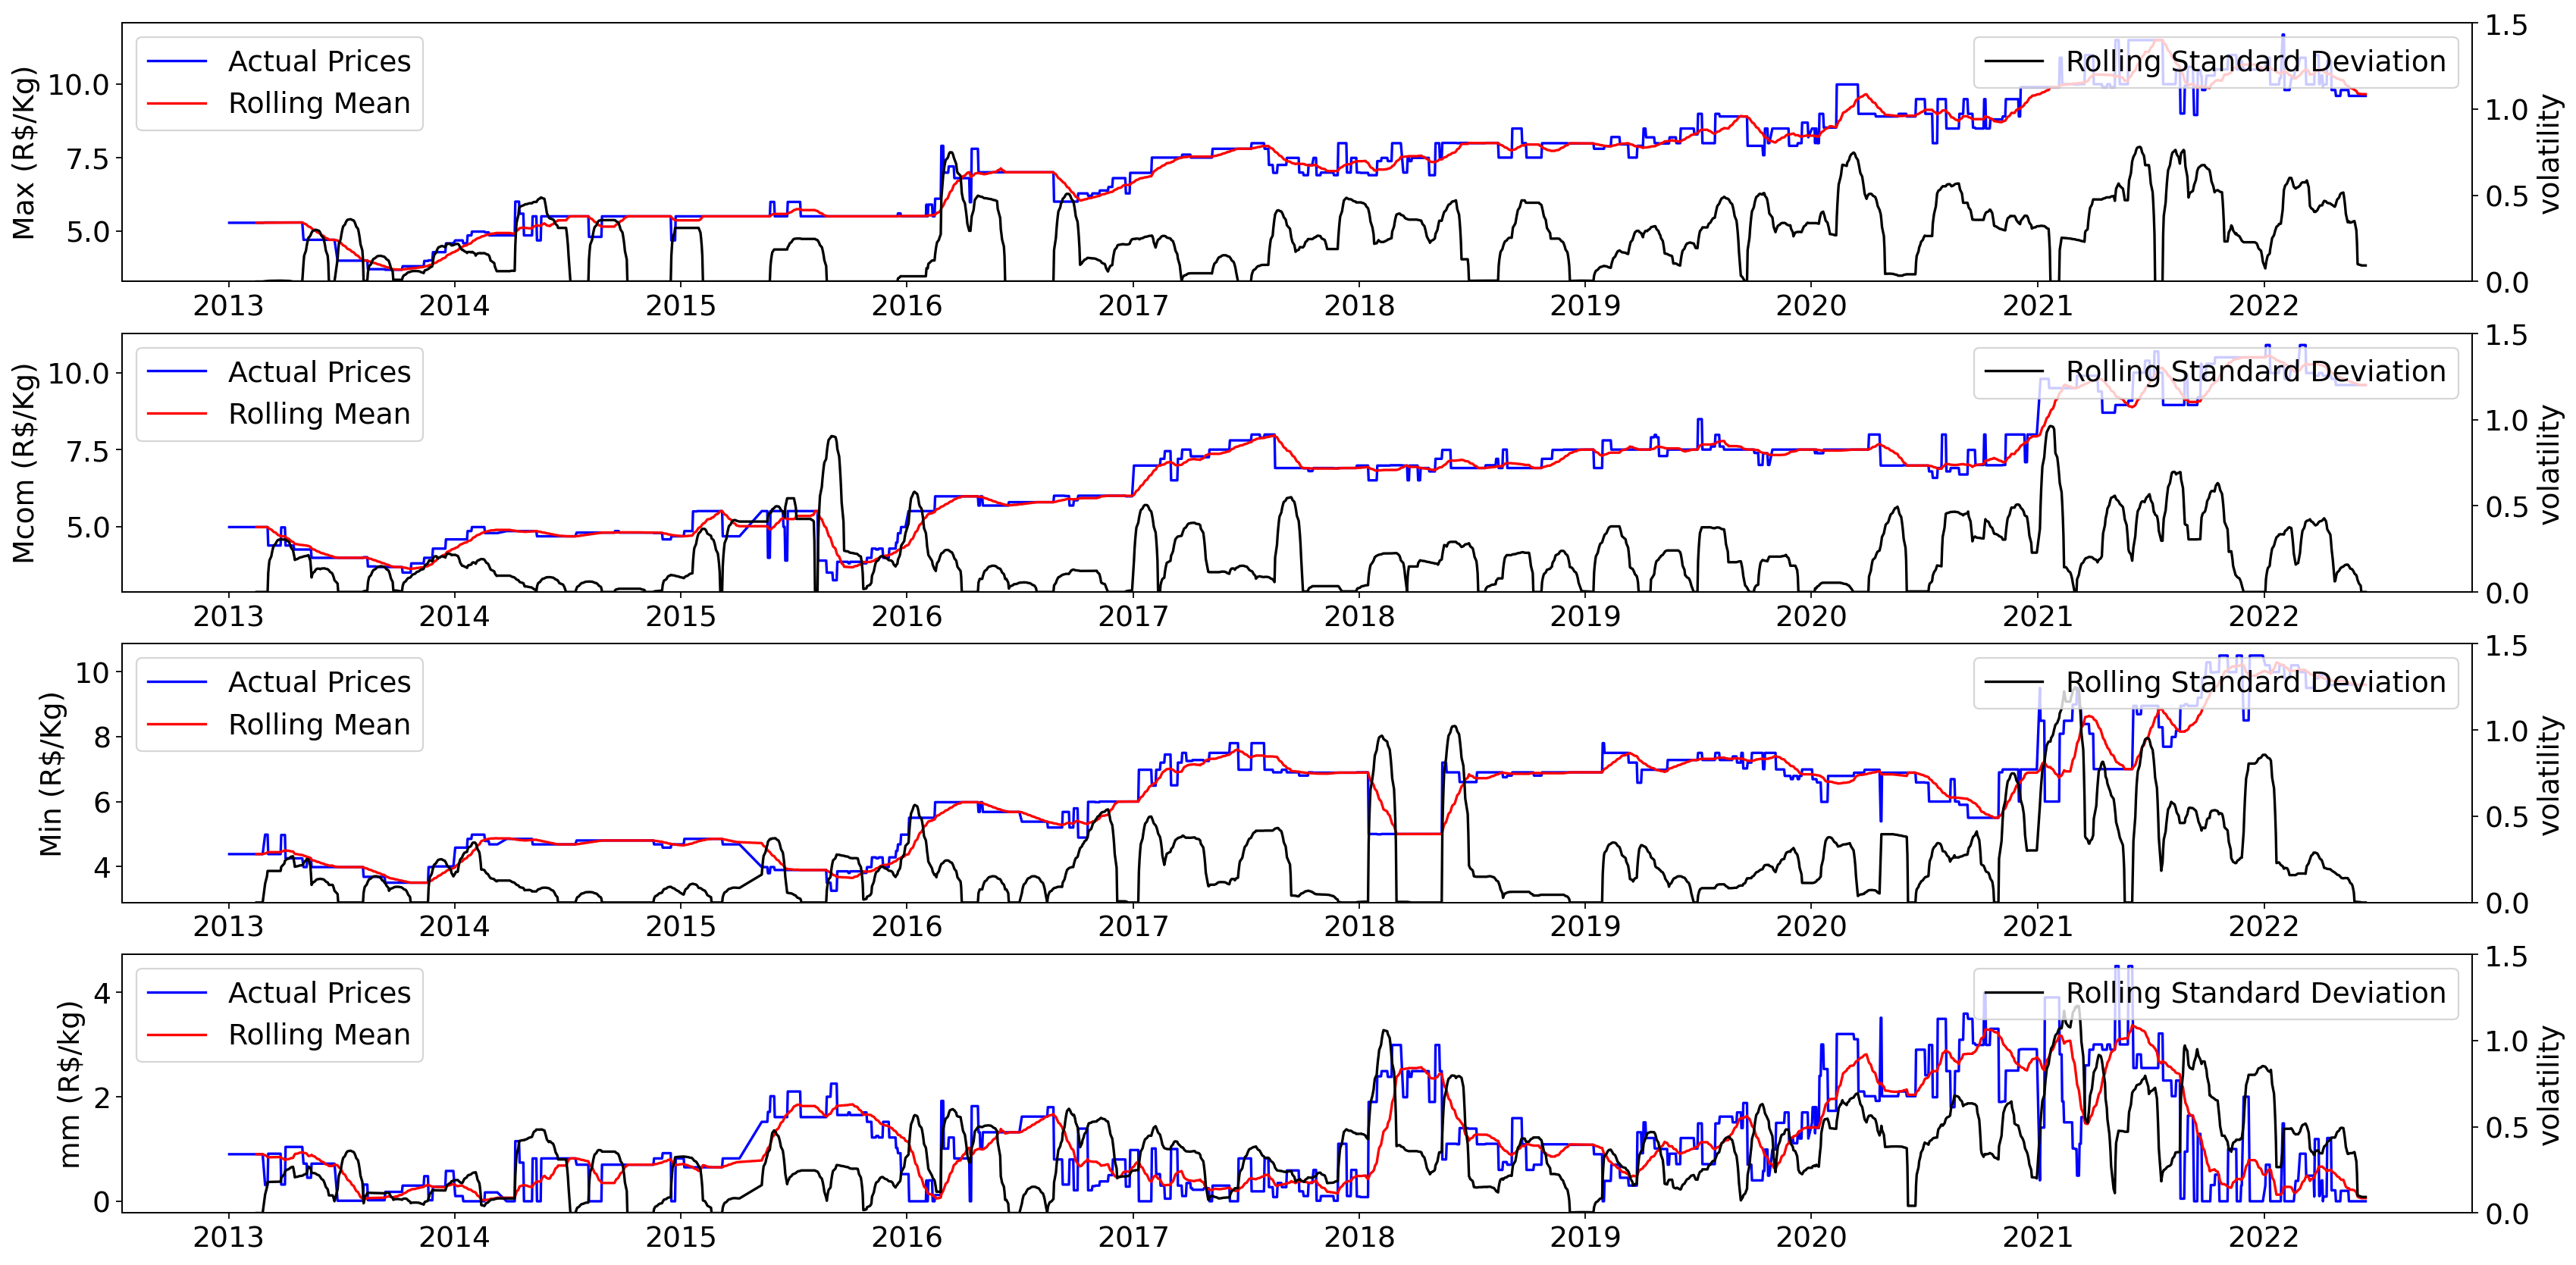

In [110]:
fig, axes = plt.subplots(4, 1, figsize=(25,13), dpi= 80)
plt.rcParams.update({'font.size': 17})
plt.rcParams['xtick.labelsize'] = '17'
axes[1].plot(dfc['mcom'], color="blue",label="Actual Prices")
axes[1].plot(rolling_meanmc, color="red", label="Rolling Mean")
axes[1].legend(loc="best")
axes[1].set_ylabel('Mcom (R$/Kg)', fontsize = 17)
ax1 = axes[1].twinx()
ax1.set_ylim([0,1.5])
ax1.plot(rolling_stdmc, color="black", label = "Rolling Standard Deviation")
ax1.legend(loc='upper right')
ax1.set_ylabel("volatility", fontsize = 17)


axes[0].plot(dfc['max'], color="blue",label="Actual Prices")
axes[0].plot(rolling_meanm, color="red", label="Rolling Mean")
axes[0].legend(loc="best")
axes[0].set_ylabel('Max (R$/Kg)', fontsize = 17)
ax3 = axes[0].twinx()
ax3.set_ylim([0,1.5])
ax3.plot(rolling_stdm, color="black", label = "Rolling Standard Deviation")
ax3.legend(loc='upper right')
ax3.set_ylabel("volatility", fontsize = 17)

axes[2].plot(dfc['min'], color="blue",label="Actual Prices")
axes[2].plot(rolling_mean, color="red", label="Rolling Mean")
axes[2].legend(loc="best")
axes[2].set_ylabel('Min (R$/Kg)', fontsize = 17)
ax4 = axes[2].twinx()
ax4.set_ylim([0,1.5])
ax4.plot(rolling_std, color="black", label = "Rolling Standard Deviation")
ax4.legend(loc='upper right')
ax4.set_ylabel("volatility", fontsize = 17)

axes[3].plot(dfc['mm'], color="blue",label="Actual Prices")
axes[3].plot(rolling_meanmm, color="red", label="Rolling Mean")
axes[3].legend(loc="upper left")
axes[3].set_ylabel('mm (R$/kg)', fontsize = 17)
ax2 = axes[3].twinx()
ax2.set_ylim([0,1.5])
ax2.plot(rolling_stdmm, color="black", label = "Rolling Standard Deviation")
ax2.legend(loc='upper right')
ax2.set_ylabel("volatility", fontsize = 17)

plt.savefig('rollingmeancombinedtwoaxes4.jpg',dpi=400)

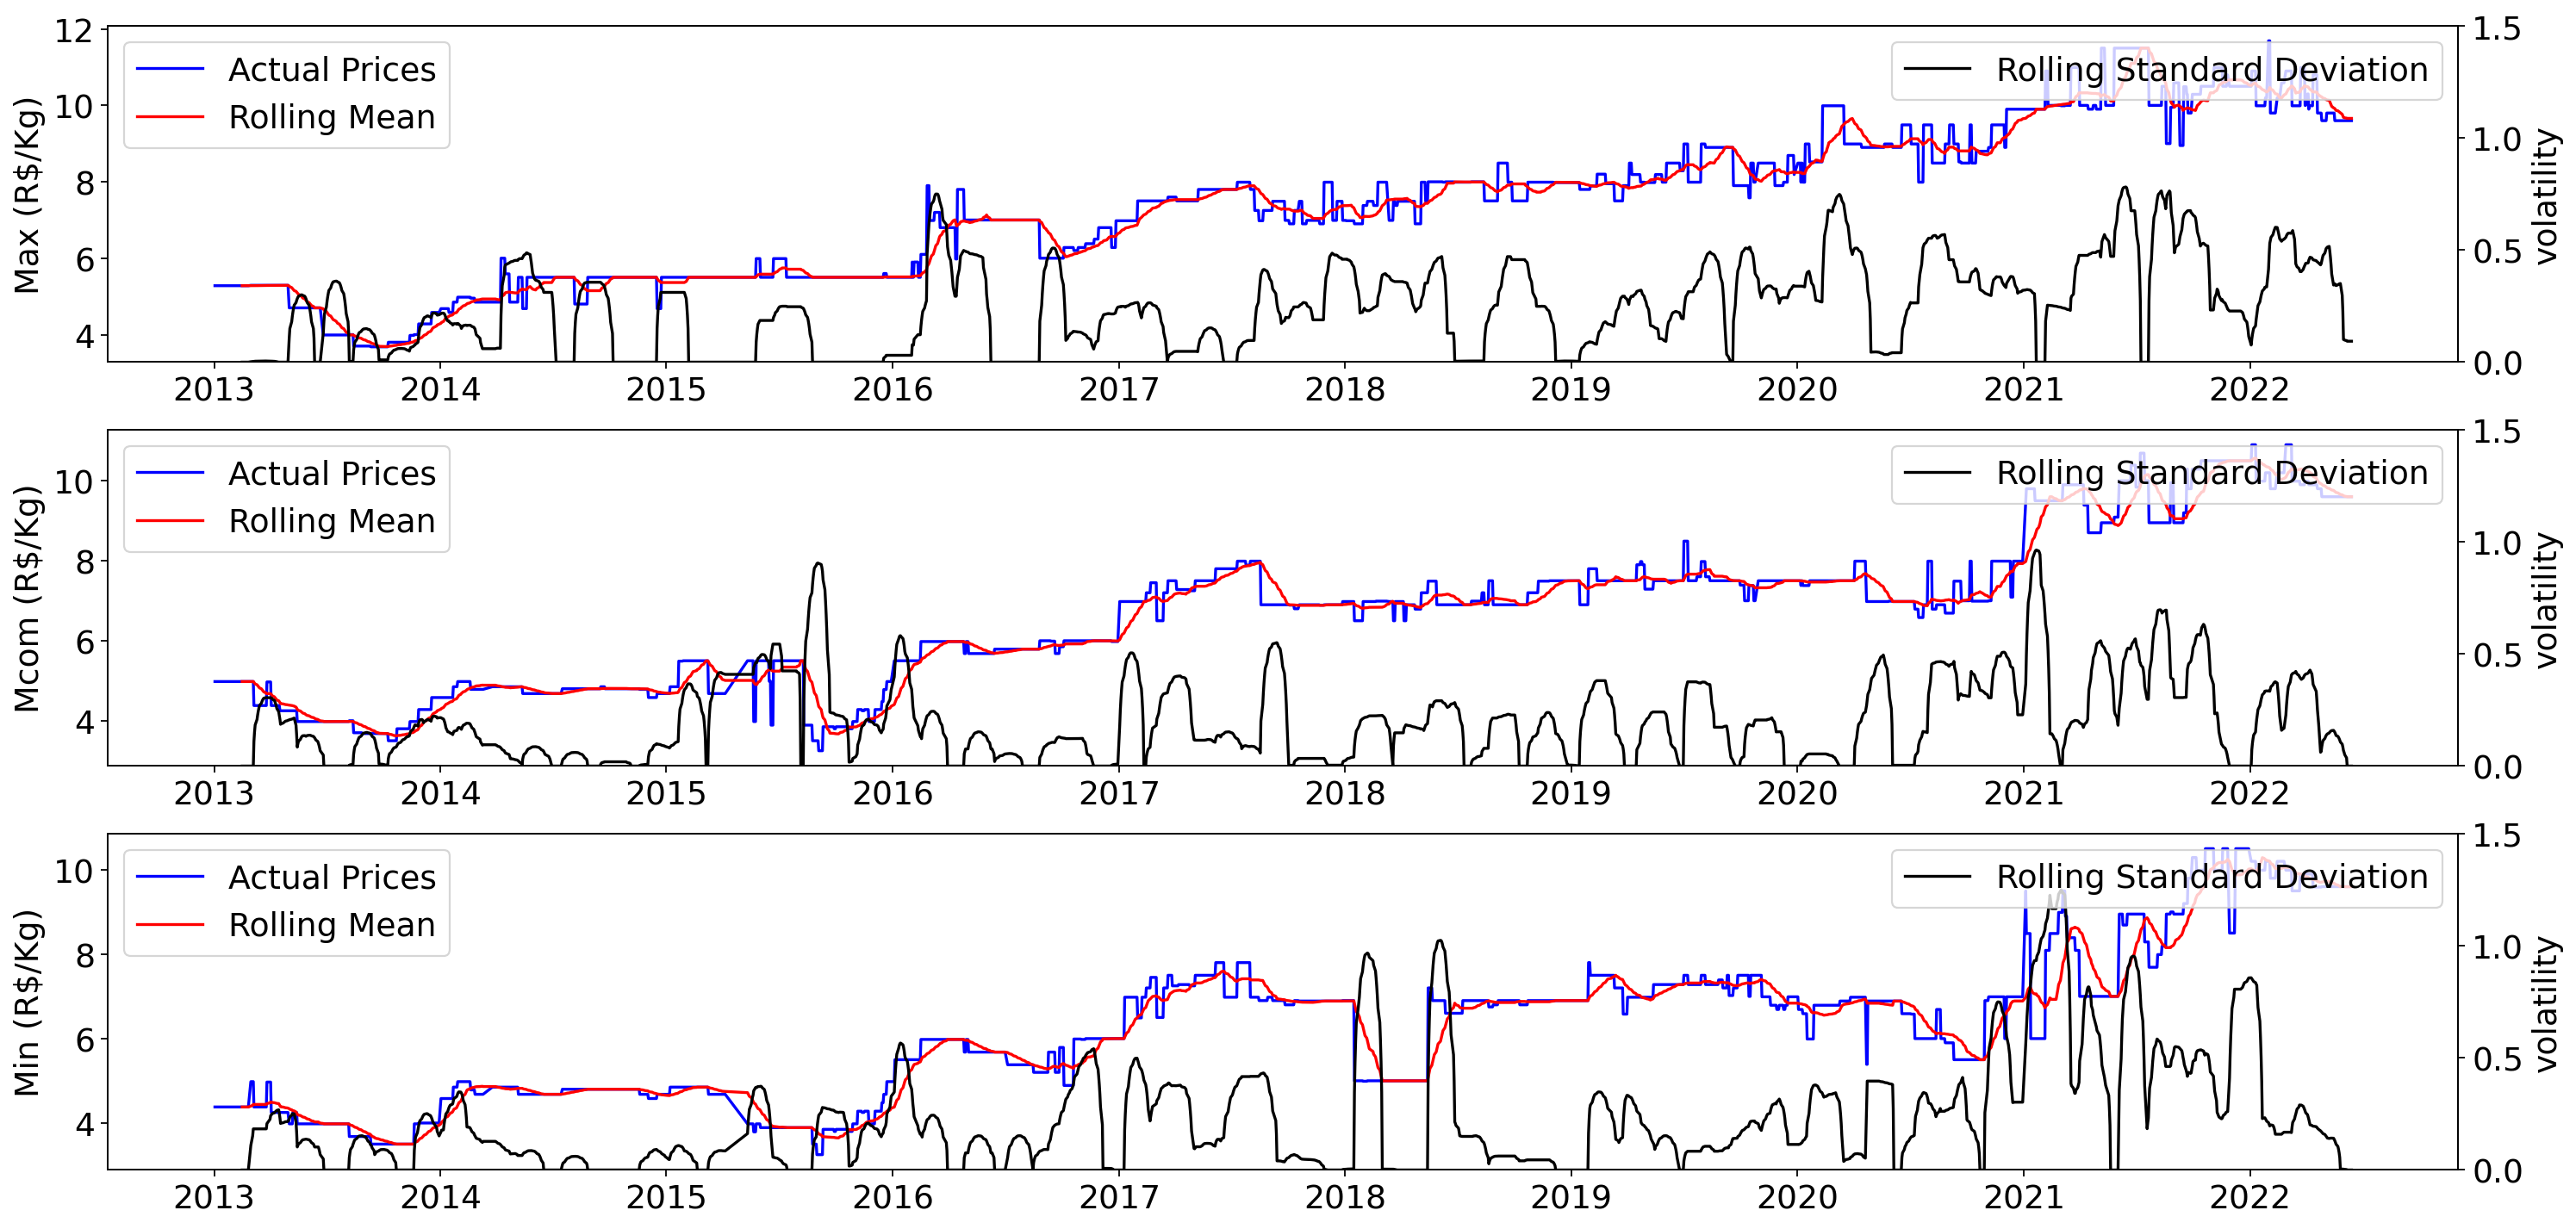

In [113]:
fig, axes = plt.subplots(3, 1, figsize=(22,11), dpi= 80)
plt.rcParams.update({'font.size': 17})
plt.rcParams['xtick.labelsize'] = '17'
axes[1].plot(dfc['mcom'], color="blue",label="Actual Prices")
axes[1].plot(rolling_meanmc, color="red", label="Rolling Mean")
axes[1].legend(loc="best")
axes[1].set_ylabel('Mcom (R$/Kg)', fontsize = 17)
ax1 = axes[1].twinx()
ax1.set_ylim([0,1.5])
ax1.plot(rolling_stdmc, color="black", label = "Rolling Standard Deviation")
ax1.legend(loc='upper right')
ax1.set_ylabel("volatility", fontsize = 17)


axes[0].plot(dfc['max'], color="blue",label="Actual Prices")
axes[0].plot(rolling_meanm, color="red", label="Rolling Mean")
axes[0].legend(loc="best")
axes[0].set_ylabel('Max (R$/Kg)', fontsize = 17)
ax3 = axes[0].twinx()
ax3.set_ylim([0,1.5])
ax3.plot(rolling_stdm, color="black", label = "Rolling Standard Deviation")
ax3.legend(loc='upper right')
ax3.set_ylabel("volatility", fontsize = 17)

axes[2].plot(dfc['min'], color="blue",label="Actual Prices")
axes[2].plot(rolling_mean, color="red", label="Rolling Mean")
axes[2].legend(loc="best")
axes[2].set_ylabel('Min (R$/Kg)', fontsize = 17)
ax4 = axes[2].twinx()
ax4.set_ylim([0,1.5])
ax4.plot(rolling_std, color="black", label = "Rolling Standard Deviation")
ax4.legend(loc='upper right')
ax4.set_ylabel("volatility", fontsize = 17)

plt.savefig('rollingmeancombinedtwoaxes3.jpg',dpi=400)

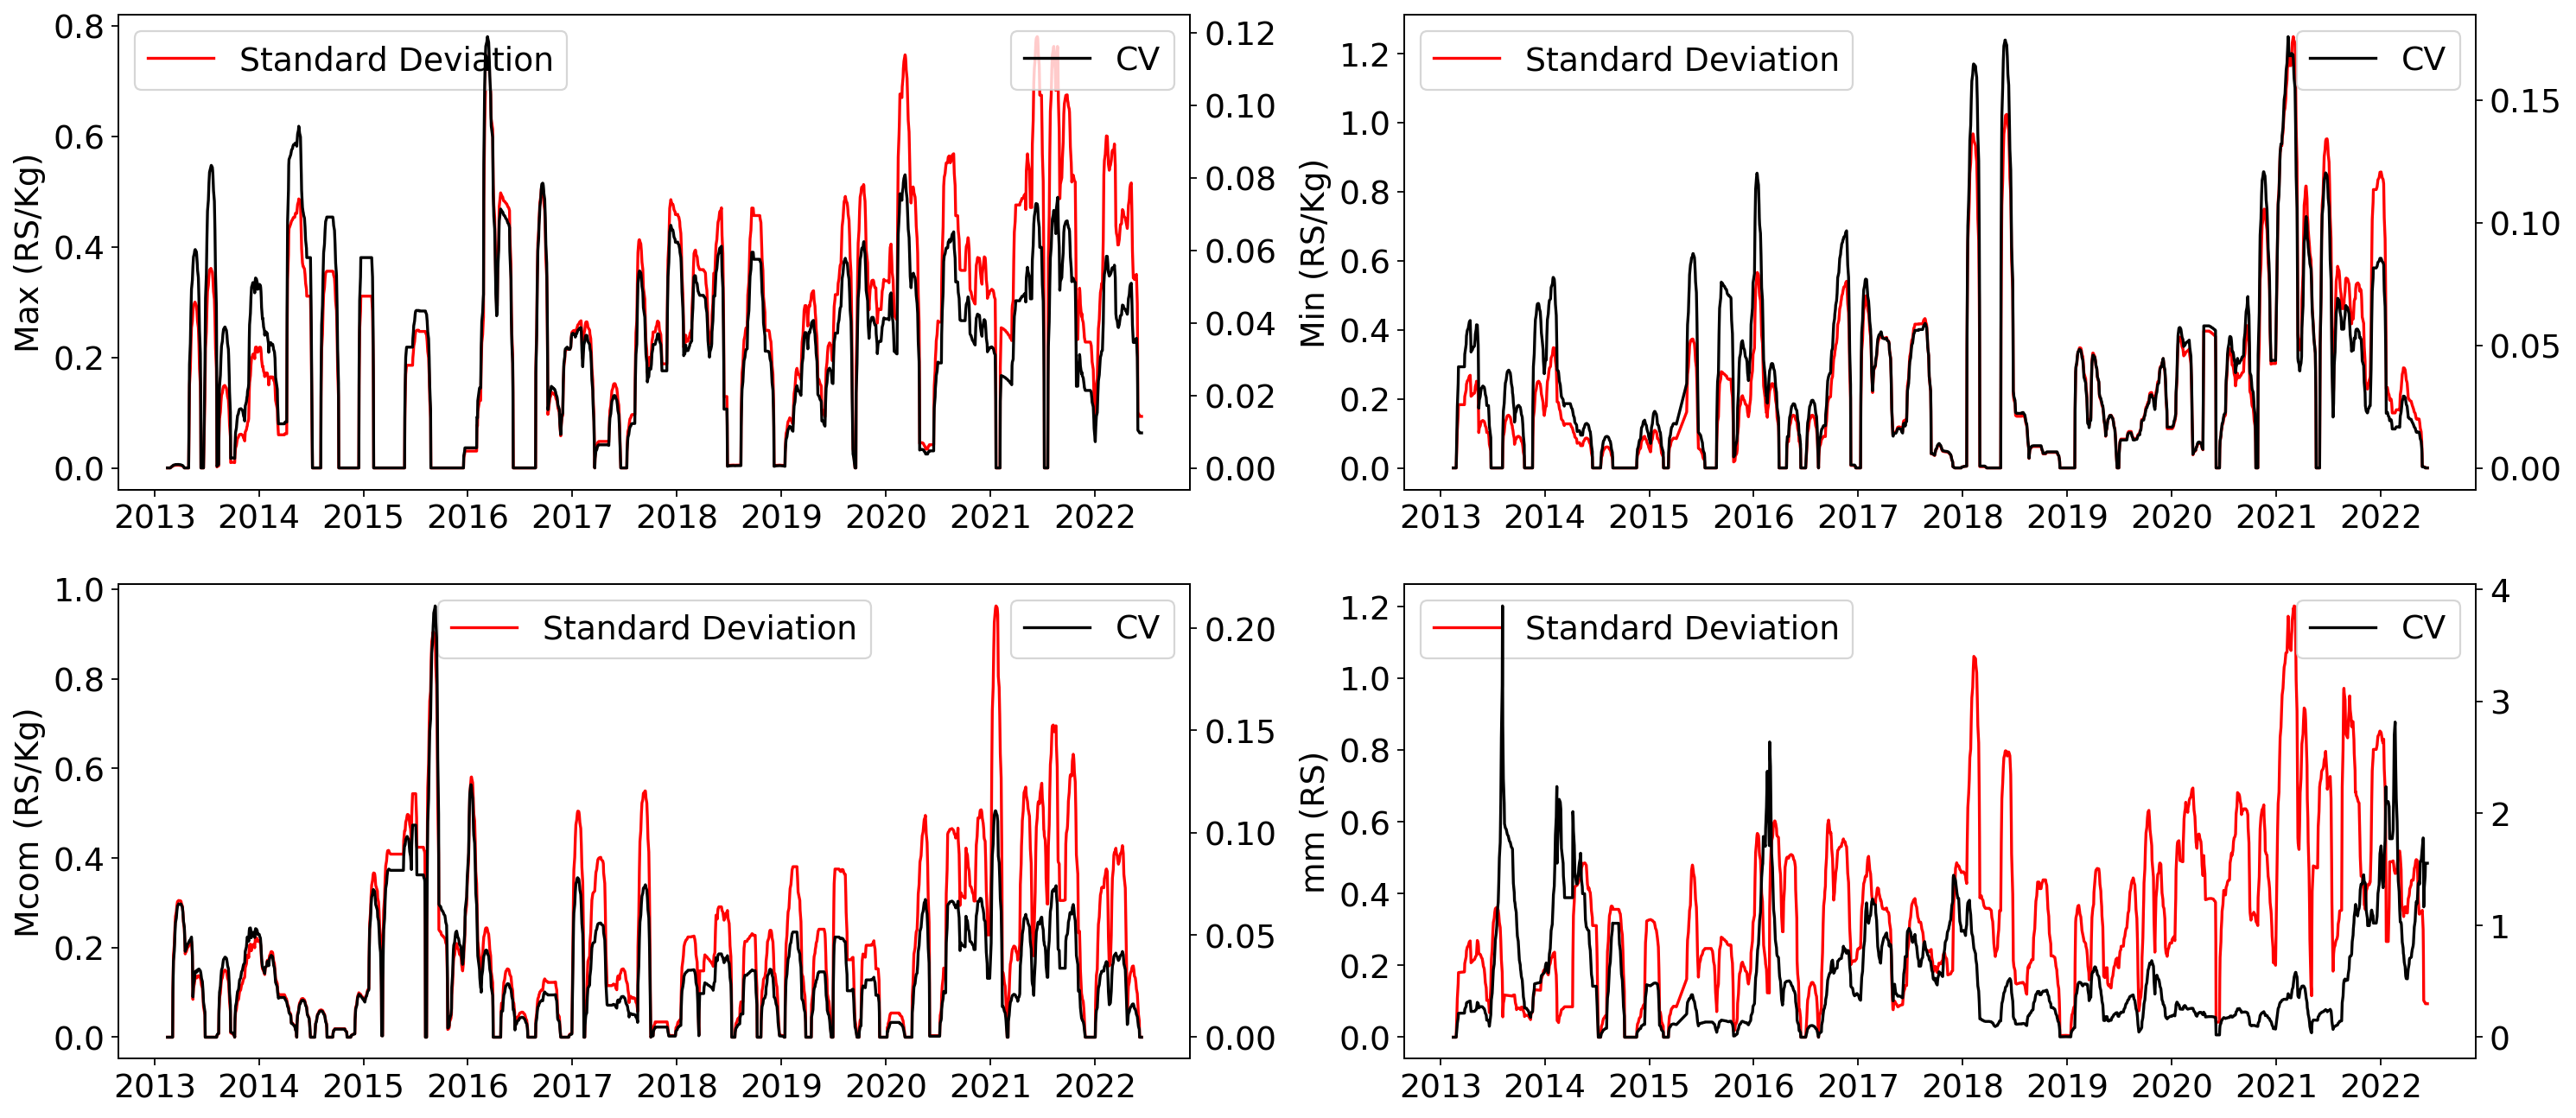

In [121]:
fig, axes = plt.subplots(2, 2, figsize=(22,10), dpi= 80)
plt.rcParams.update({'font.size': 17})
plt.rcParams['xtick.labelsize'] = '17'
axes[1, 0].plot(rolling_stdmc, color="red", label = "Standard Deviation")
axes[1, 0].set_ylabel('Mcom (RS/Kg)')
axes[1, 0].legend(loc="best")
axes[1, 0].set_ylabel('Mcom (RS/Kg)')
ax1 = axes[1,0].twinx()
ax1.plot(rolling_cvmc, color="black", label = "CV")
ax1.legend(loc='upper right')


axes[1, 1].plot(rolling_stdmm, color="red", label = "Standard Deviation")
axes[1, 1].set_ylabel('mm (RS)')
axes[1, 1].legend(loc="best")
ax2 = axes[1,1].twinx()
ax2.plot(rolling_cvmm, color="black", label = "CV")
ax2.legend(loc='upper right')

axes[0, 0].plot(rolling_stdm, color="red", label = "Standard Deviation")
axes[0, 0].set_ylabel('Max (RS/Kg)')
axes[0, 0].legend(loc="best")
ax3 = axes[0,0].twinx()
ax3.plot(rolling_cvm, color="black", label = "CV")
ax3.legend(loc='upper right')

axes[0, 1].plot(rolling_std, color="red", label = "Standard Deviation")
axes[0, 1].set_ylabel('Min (RS/Kg)')
axes[0, 1].legend(loc="best")
ax4 = axes[0,1].twinx()
ax4.plot(rolling_cv, color="black", label = "CV")
ax4.legend(loc='upper right')
plt.savefig('coeficiente variação.jpg',dpi=400)

Text(0, 0.5, 'Min (RS/Kg)')

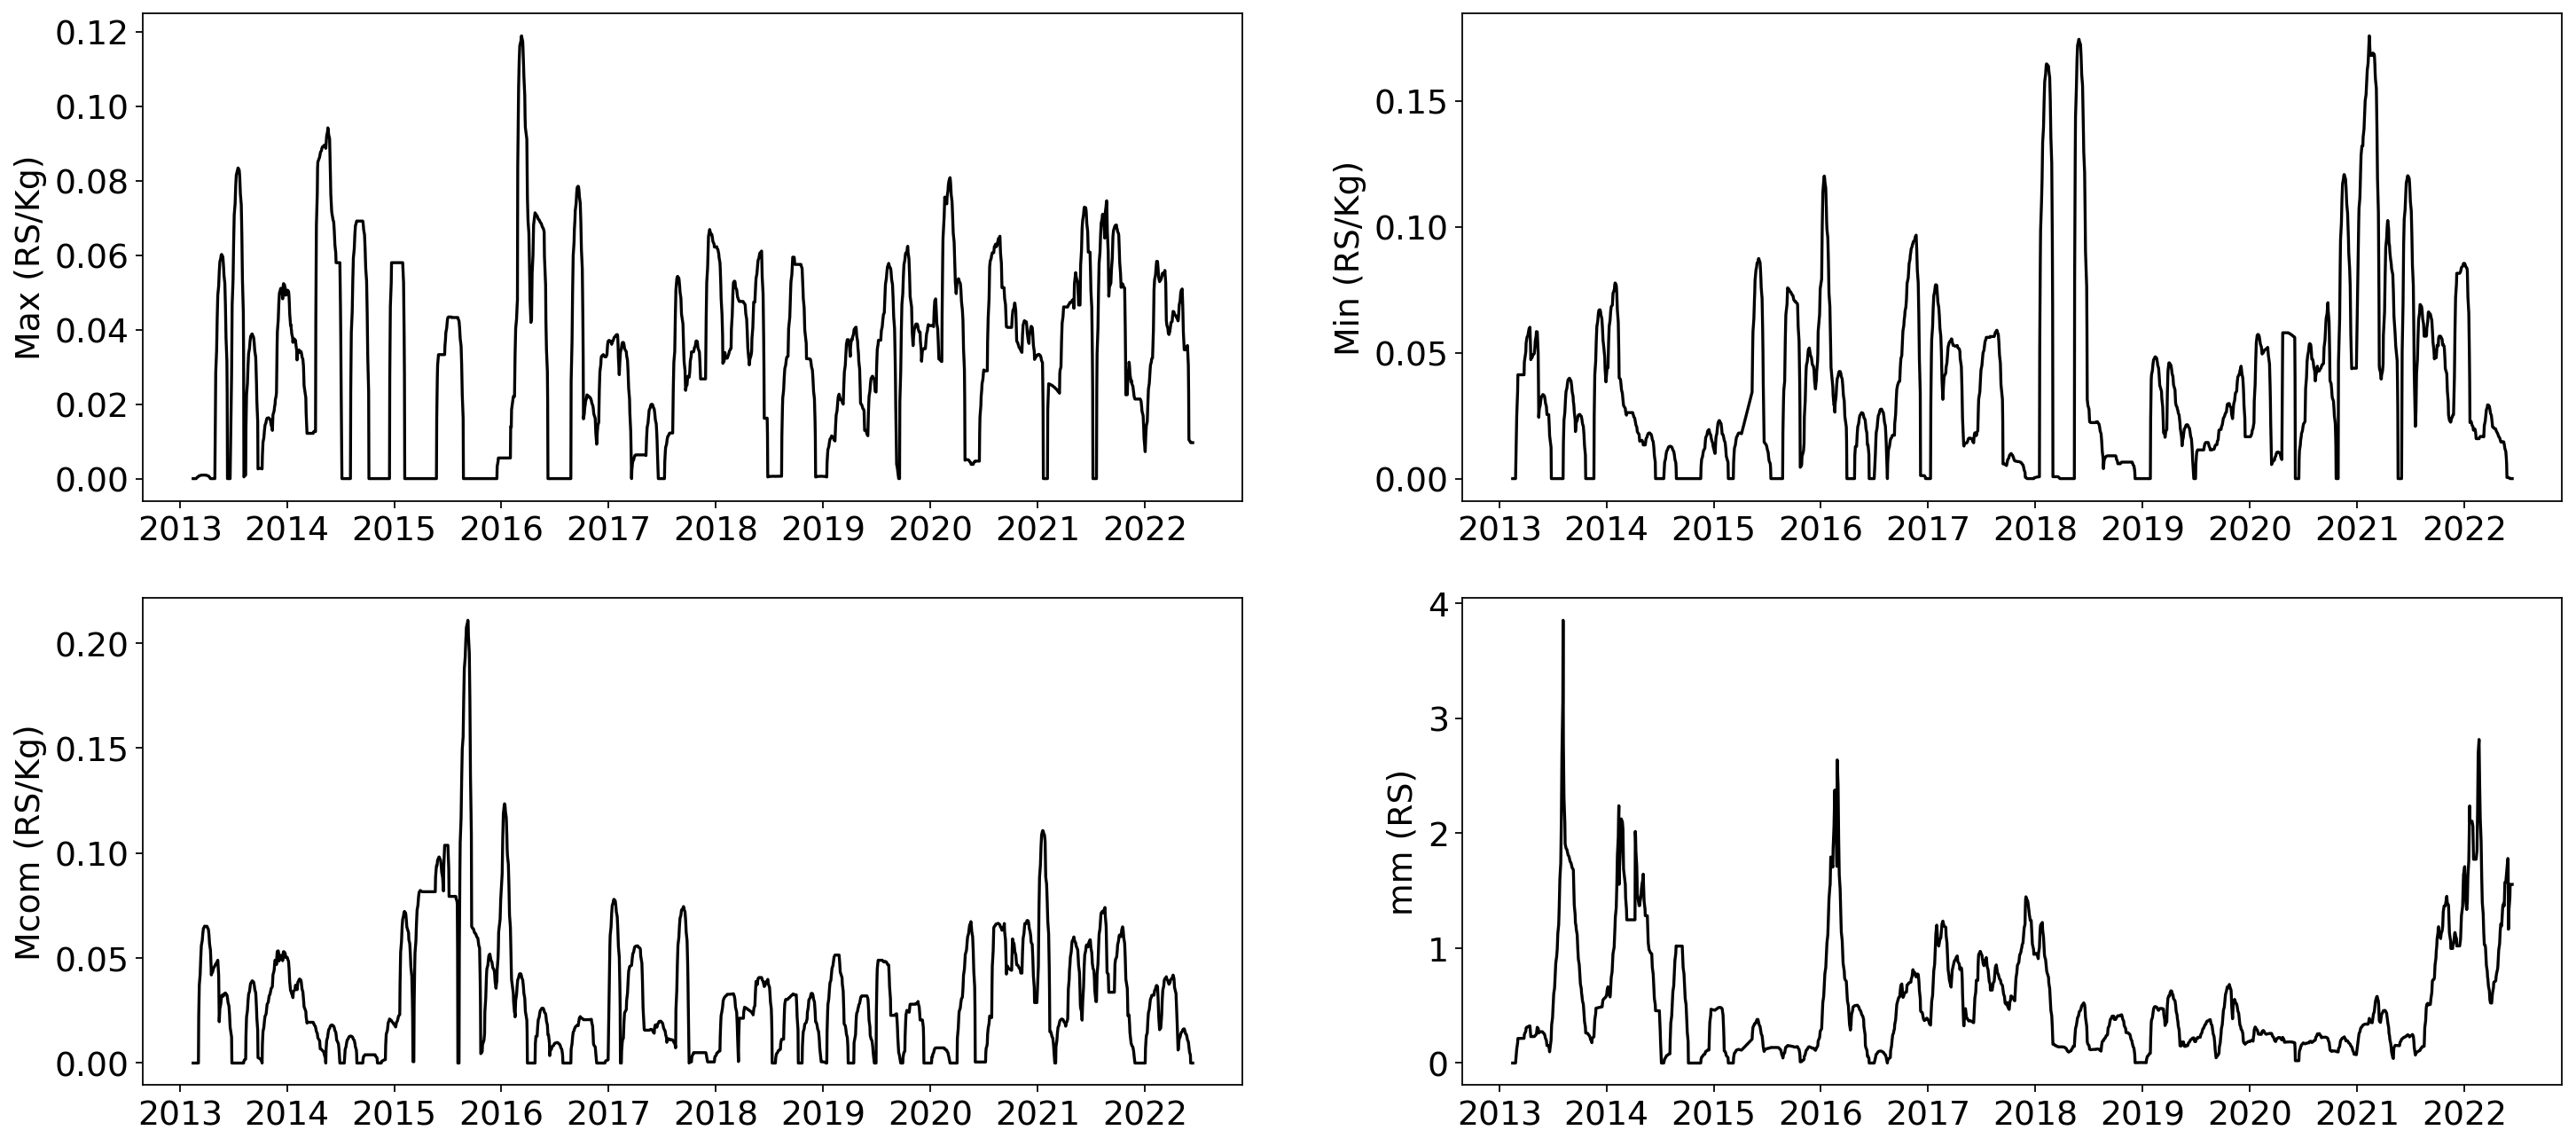

In [115]:
fig, axes = plt.subplots(2, 2, figsize=(22,10), dpi= 80)
plt.rcParams.update({'font.size': 17})
plt.rcParams['xtick.labelsize'] = '17'
axes[1, 0].plot(rolling_cvmc, color="black", label = "CV")
axes[1, 0].set_ylabel('Mcom (RS/Kg)')
axes[1, 1].plot(rolling_cvmm, color="black", label = "CV")
axes[1, 1].set_ylabel('mm (RS)')
axes[0, 0].plot(rolling_cvm, color="black", label = "CV")
axes[0, 0].set_ylabel('Max (RS/Kg)')
axes[0, 1].plot(rolling_cv, color="black", label = "CV")
axes[0, 1].set_ylabel('Min (RS/Kg)')

## Decomposing

<function matplotlib.pyplot.show(close=None, block=None)>

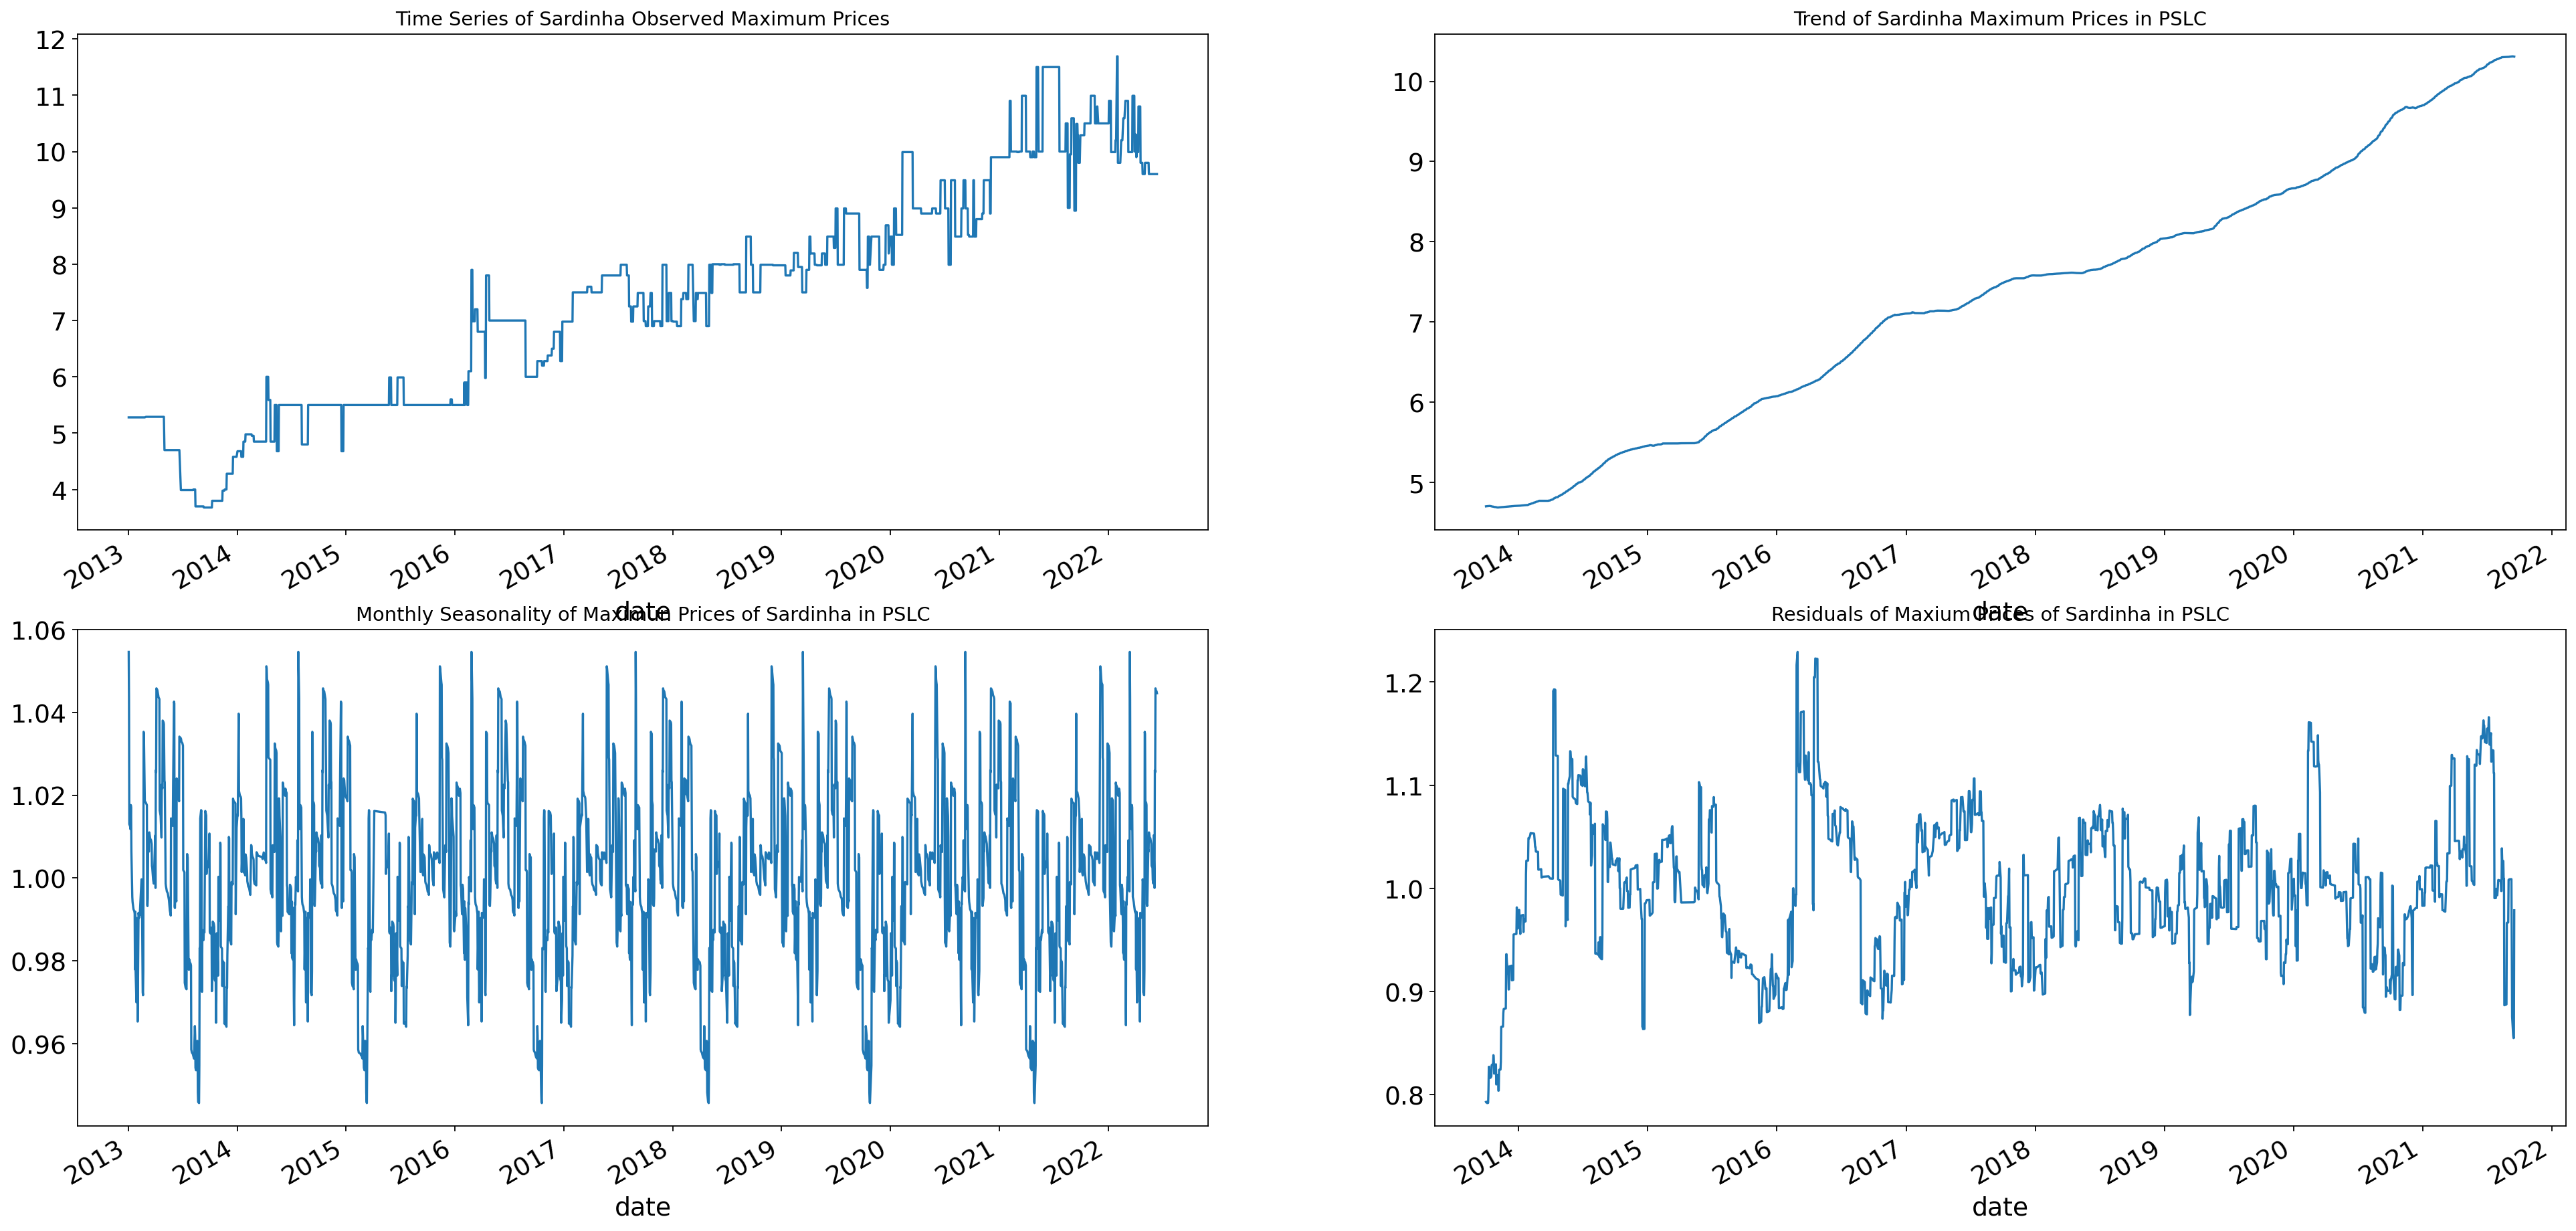

In [69]:
decompose = seasonal_decompose(dfc['max'],model='multiplicative', period=365) # Making an yearly decomposition
level = decompose.observed # Decomposing the observed series
trend=decompose.trend # Decomposing the trend
seasonality = decompose.seasonal # Decomposing the seasonality
residual = decompose.resid # Decomposing the residuals

#Plotting the series, the trend, the seasonality and the residuals
fig, axes = plt.subplots(2, 2, figsize=(30,15), dpi= 80)
level.plot(ax=axes[0,0])
axes[0,0].set_title("Time Series of Sardinha Observed Maximum Prices",fontsize=13)
trend.plot(ax=axes[0,1])
axes[0,1].set_title("Trend of Sardinha Maximum Prices in PSLC",fontsize=13)
seasonality.plot(ax=axes[1,0])
axes[1,0].set_title("Monthly Seasonality of Maximun Prices of Sardinha in PSLC",fontsize=13)
residual.plot(ax=axes[1,1])
axes[1,1].set_title("Residuals of Maxium Prices of Sardinha in PSLC",fontsize=13)
plt.show

From the max variable we can clearly see that in an anul time interval it presents seasonal effects in it's variability with the residuals varying from 0.8 to 1.2

<function matplotlib.pyplot.show(close=None, block=None)>

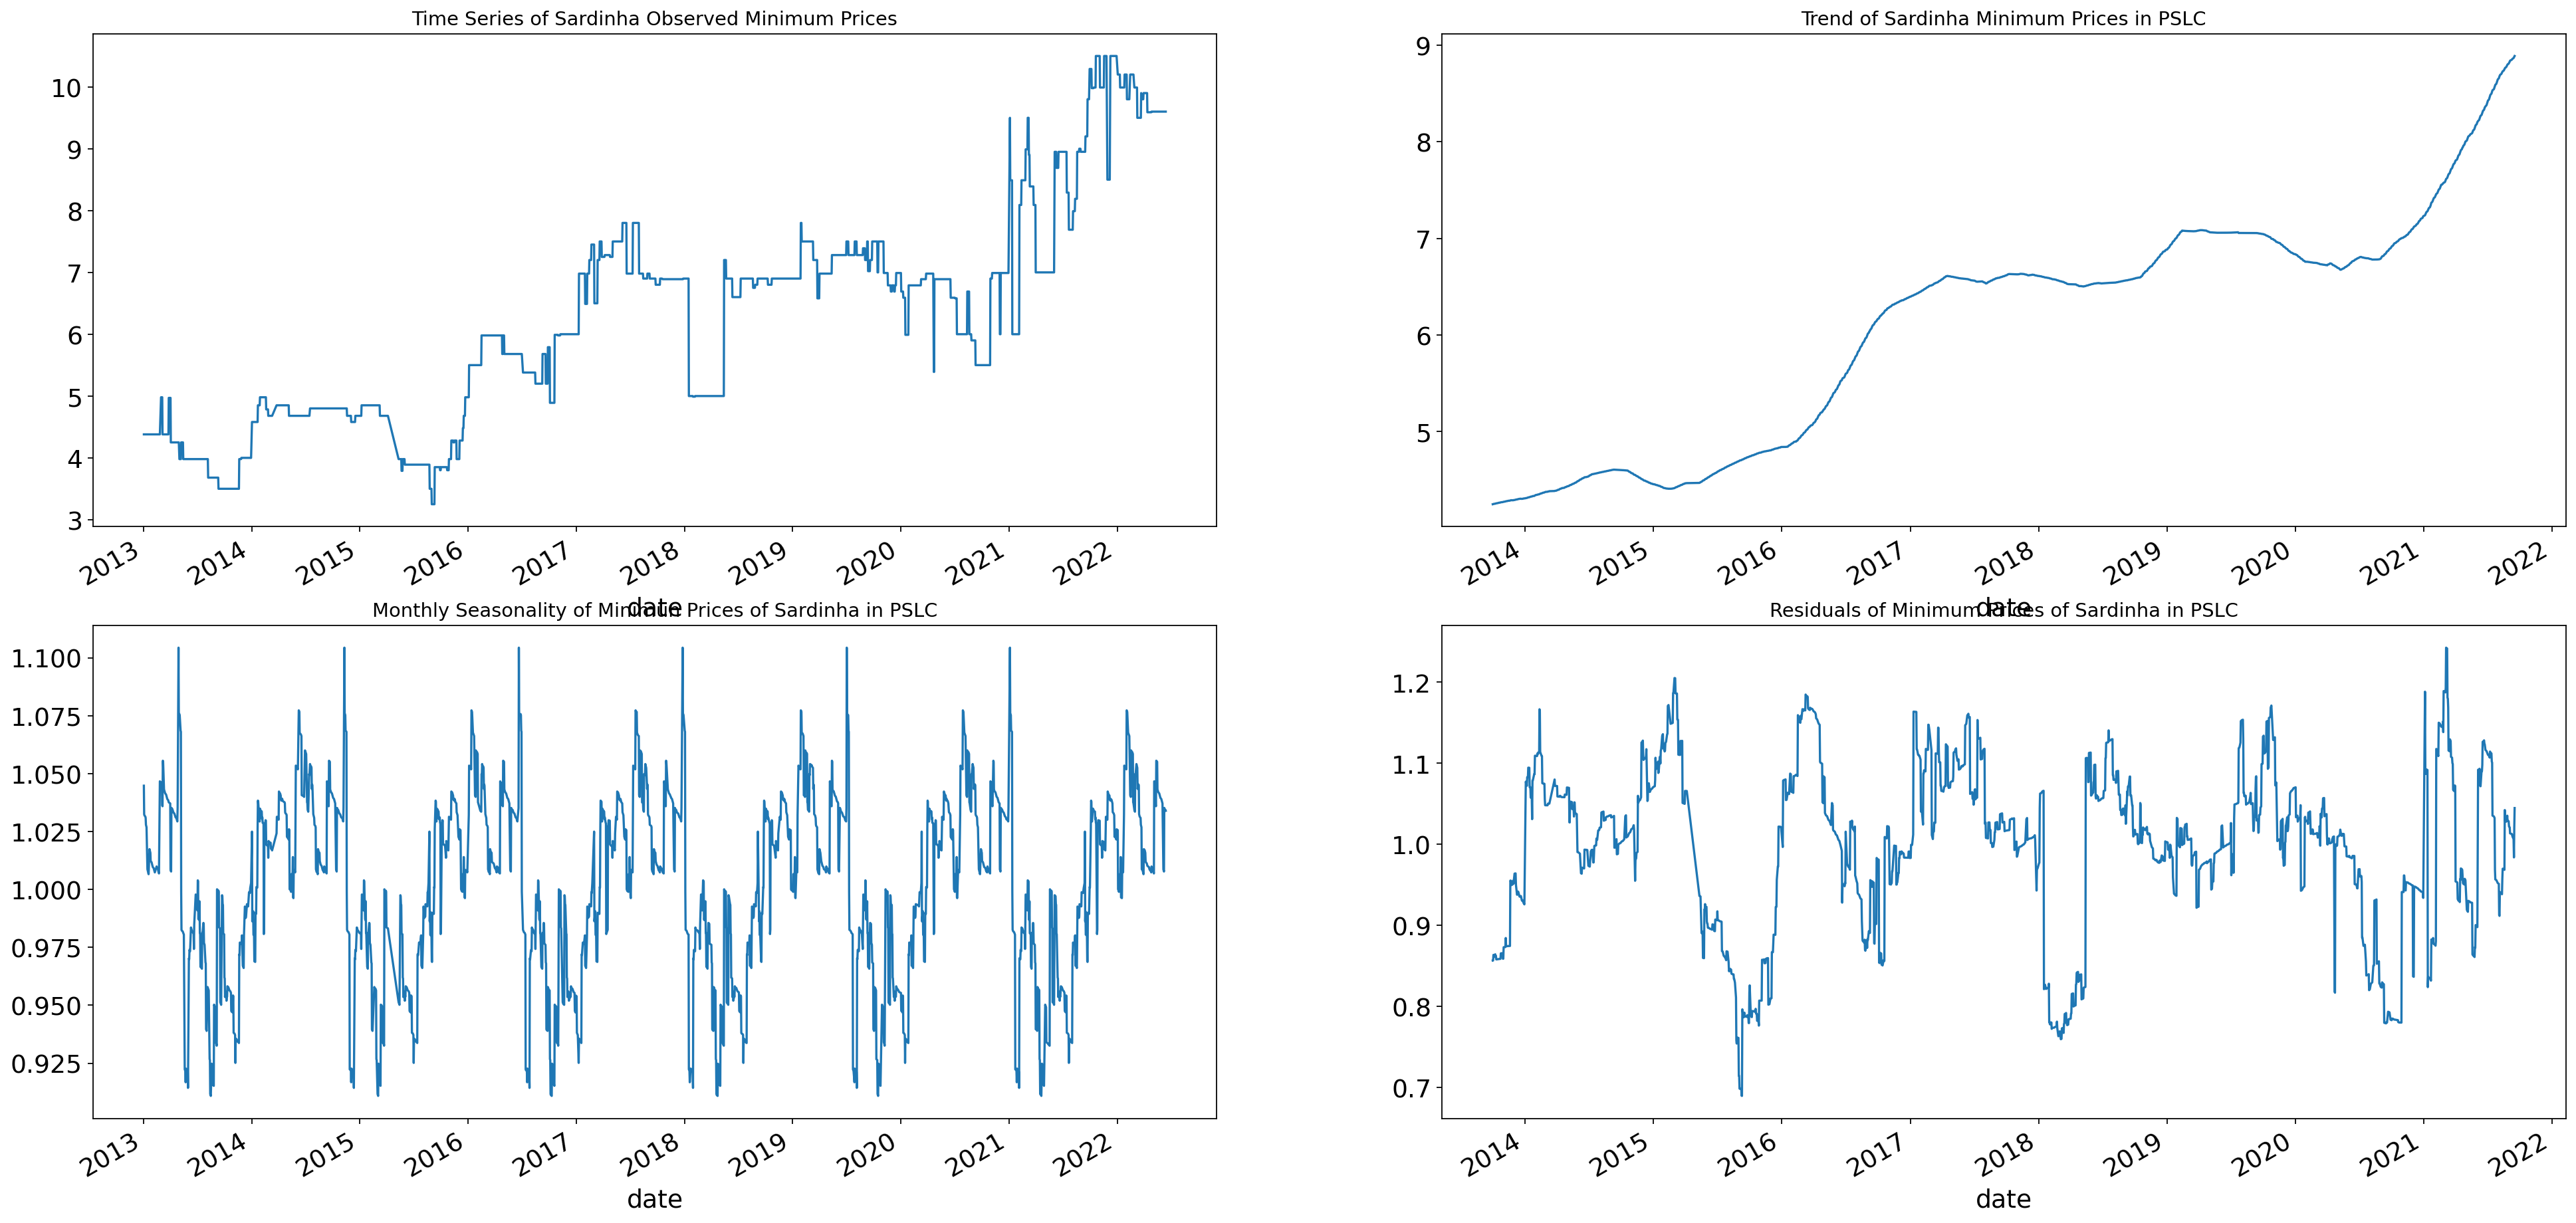

In [70]:
decomposemin = seasonal_decompose(dfc['min'],model='multiplicative', period=365)
levelmin = decomposemin.observed
trendmin=decomposemin.trend
seasonalitymin = decomposemin.seasonal
residualmin = decomposemin.resid


fig, axes = plt.subplots(2, 2, figsize=(30,15), dpi= 80)
levelmin.plot(ax=axes[0,0])
axes[0,0].set_title("Time Series of Sardinha Observed Minimum Prices",fontsize=13)
trendmin.plot(ax=axes[0,1])
axes[0,1].set_title("Trend of Sardinha Minimum Prices in PSLC",fontsize=13)
seasonalitymin.plot(ax=axes[1,0])
axes[1,0].set_title("Monthly Seasonality of Minimun Prices of Sardinha in PSLC",fontsize=13)
residualmin.plot(ax=axes[1,1])
axes[1,1].set_title("Residuals of Minimum Prices of Sardinha in PSLC",fontsize=13)
plt.show

The min variable also present seasonal effects in its variability troughout time but in a distinct pattern from the max variable. It also presents an increasing trend but it grows differently from max.

<function matplotlib.pyplot.show(close=None, block=None)>

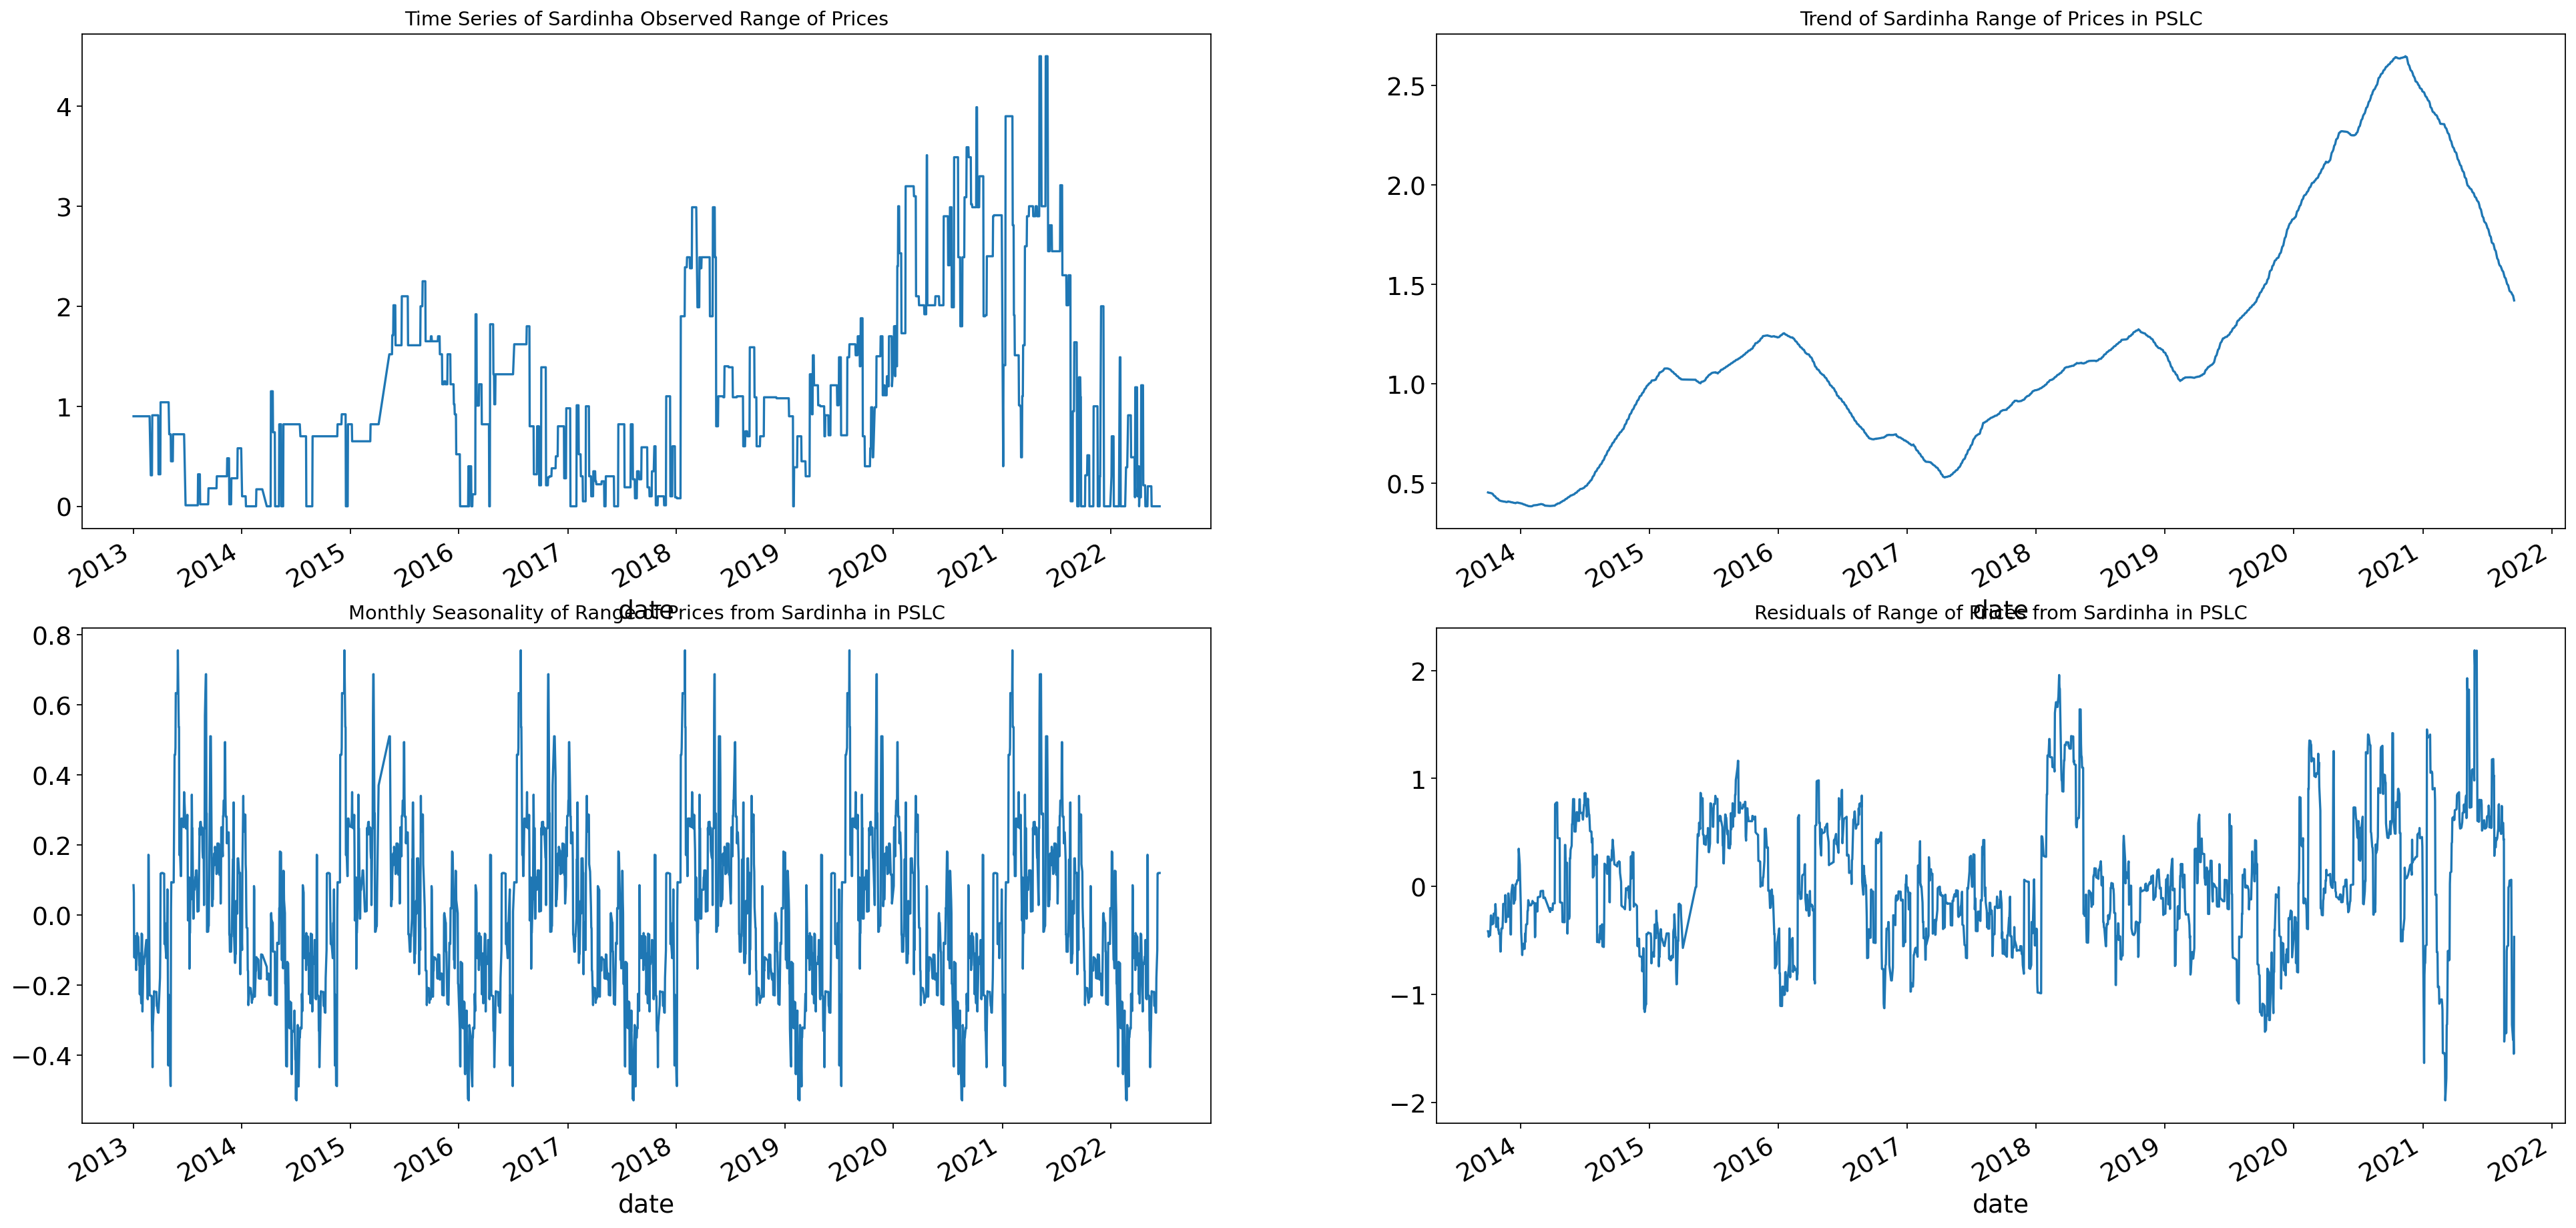

In [71]:
decomposemm = seasonal_decompose(dfc['mm'],model='additive', period=365)
levelmm = decomposemm.observed
trendmm=decomposemm.trend
seasonalitymm = decomposemm.seasonal
residualmm = decomposemm.resid


fig, axes = plt.subplots(2, 2, figsize=(30,15), dpi= 80)
levelmm.plot(ax=axes[0,0])
axes[0,0].set_title("Time Series of Sardinha Observed Range of Prices",fontsize=13)
trendmm.plot(ax=axes[0,1])
axes[0,1].set_title("Trend of Sardinha Range of Prices in PSLC",fontsize=13)
seasonalitymm.plot(ax=axes[1,0])
axes[1,0].set_title("Monthly Seasonality of Range of Prices from Sardinha in PSLC",fontsize=13)
residualmm.plot(ax=axes[1,1])
axes[1,1].set_title("Residuals of Range of Prices from Sardinha in PSLC",fontsize=13)
plt.show

The range of prices from the sardines in PSLC presents a complex trend, wereas it growed until reach a peak in 2021, now it presents a declining trend, what can indicate that minimum prices are growing and the differenc between the cheapest and the most expensive sardine in PSLC is not as great as it used to be.

<function matplotlib.pyplot.show(close=None, block=None)>

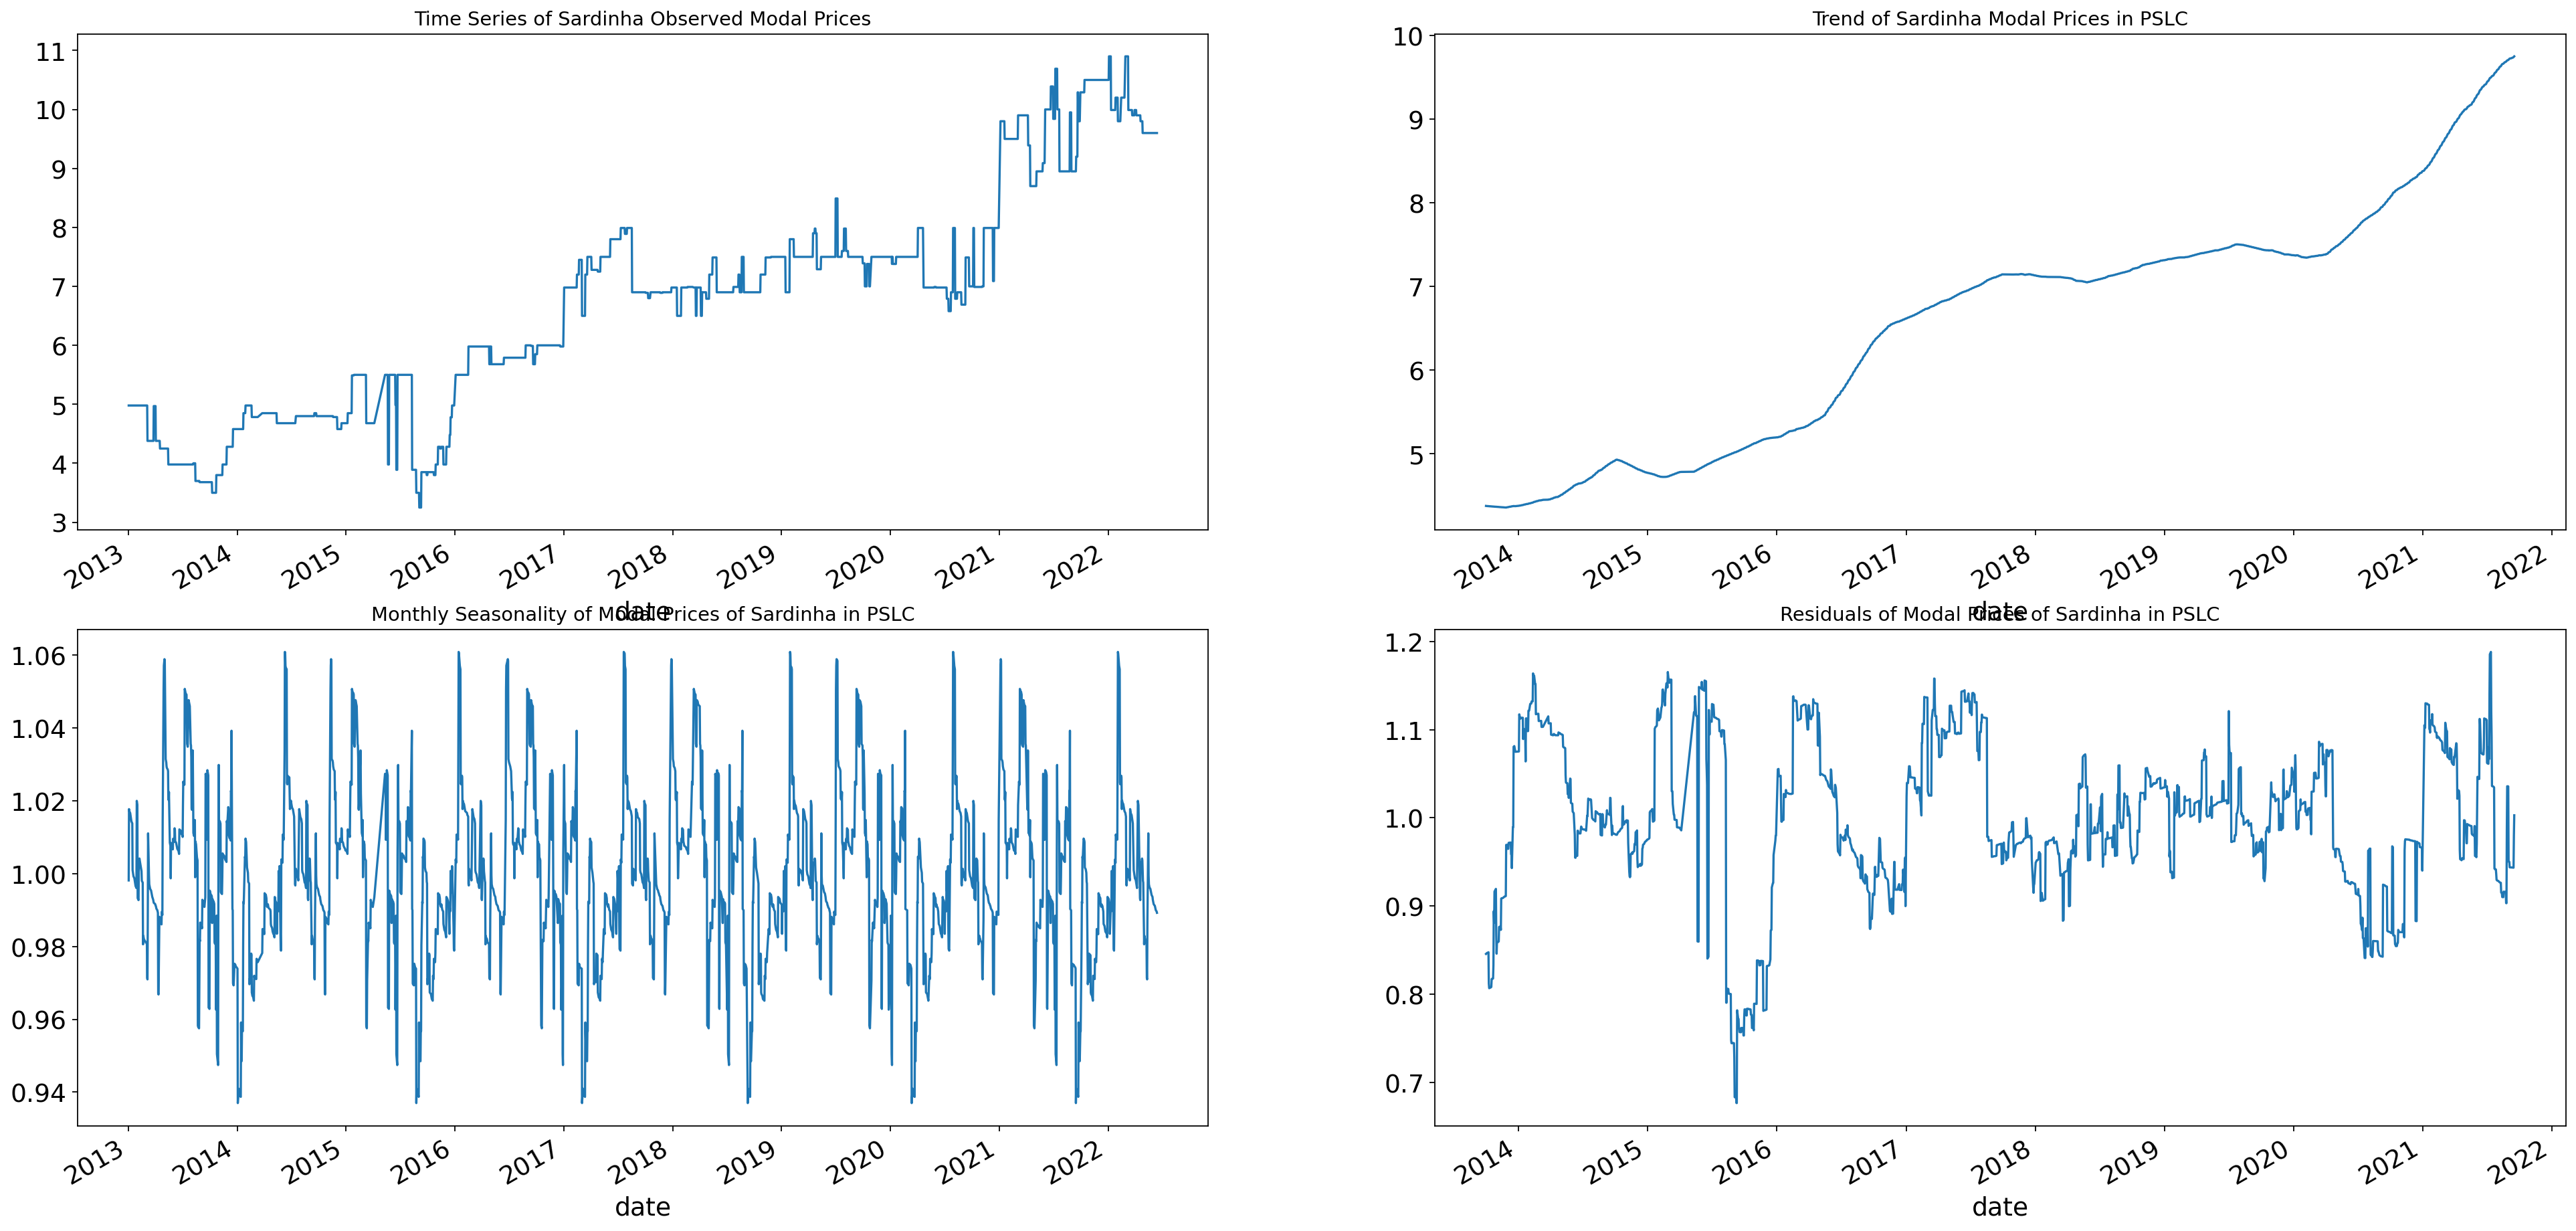

In [72]:
decomposemcom = seasonal_decompose(dfc['mcom'],model='multiplicative', period=365)
levelmcom = decomposemcom.observed
trendmcom=decomposemcom.trend
seasonalitymcom = decomposemcom.seasonal
residualmcom = decomposemcom.resid


fig, axes = plt.subplots(2, 2, figsize=(30,15), dpi= 80)
levelmcom.plot(ax=axes[0,0])
axes[0,0].set_title("Time Series of Sardinha Observed Modal Prices",fontsize=13)
trendmcom.plot(ax=axes[0,1])
axes[0,1].set_title("Trend of Sardinha Modal Prices in PSLC",fontsize=13)
seasonalitymcom.plot(ax=axes[1,0])
axes[1,0].set_title("Monthly Seasonality of Modal Prices of Sardinha in PSLC",fontsize=13)
residualmcom.plot(ax=axes[1,1])
axes[1,1].set_title("Residuals of Modal Prices of Sardinha in PSLC",fontsize=13)
plt.show

The modal prices present seasonal effect and trend of growing as the variables analyzed before, but it showed different variation in the residuals. Now let's make some combined plots to give us a better comparation among the trends and the series from the variables.

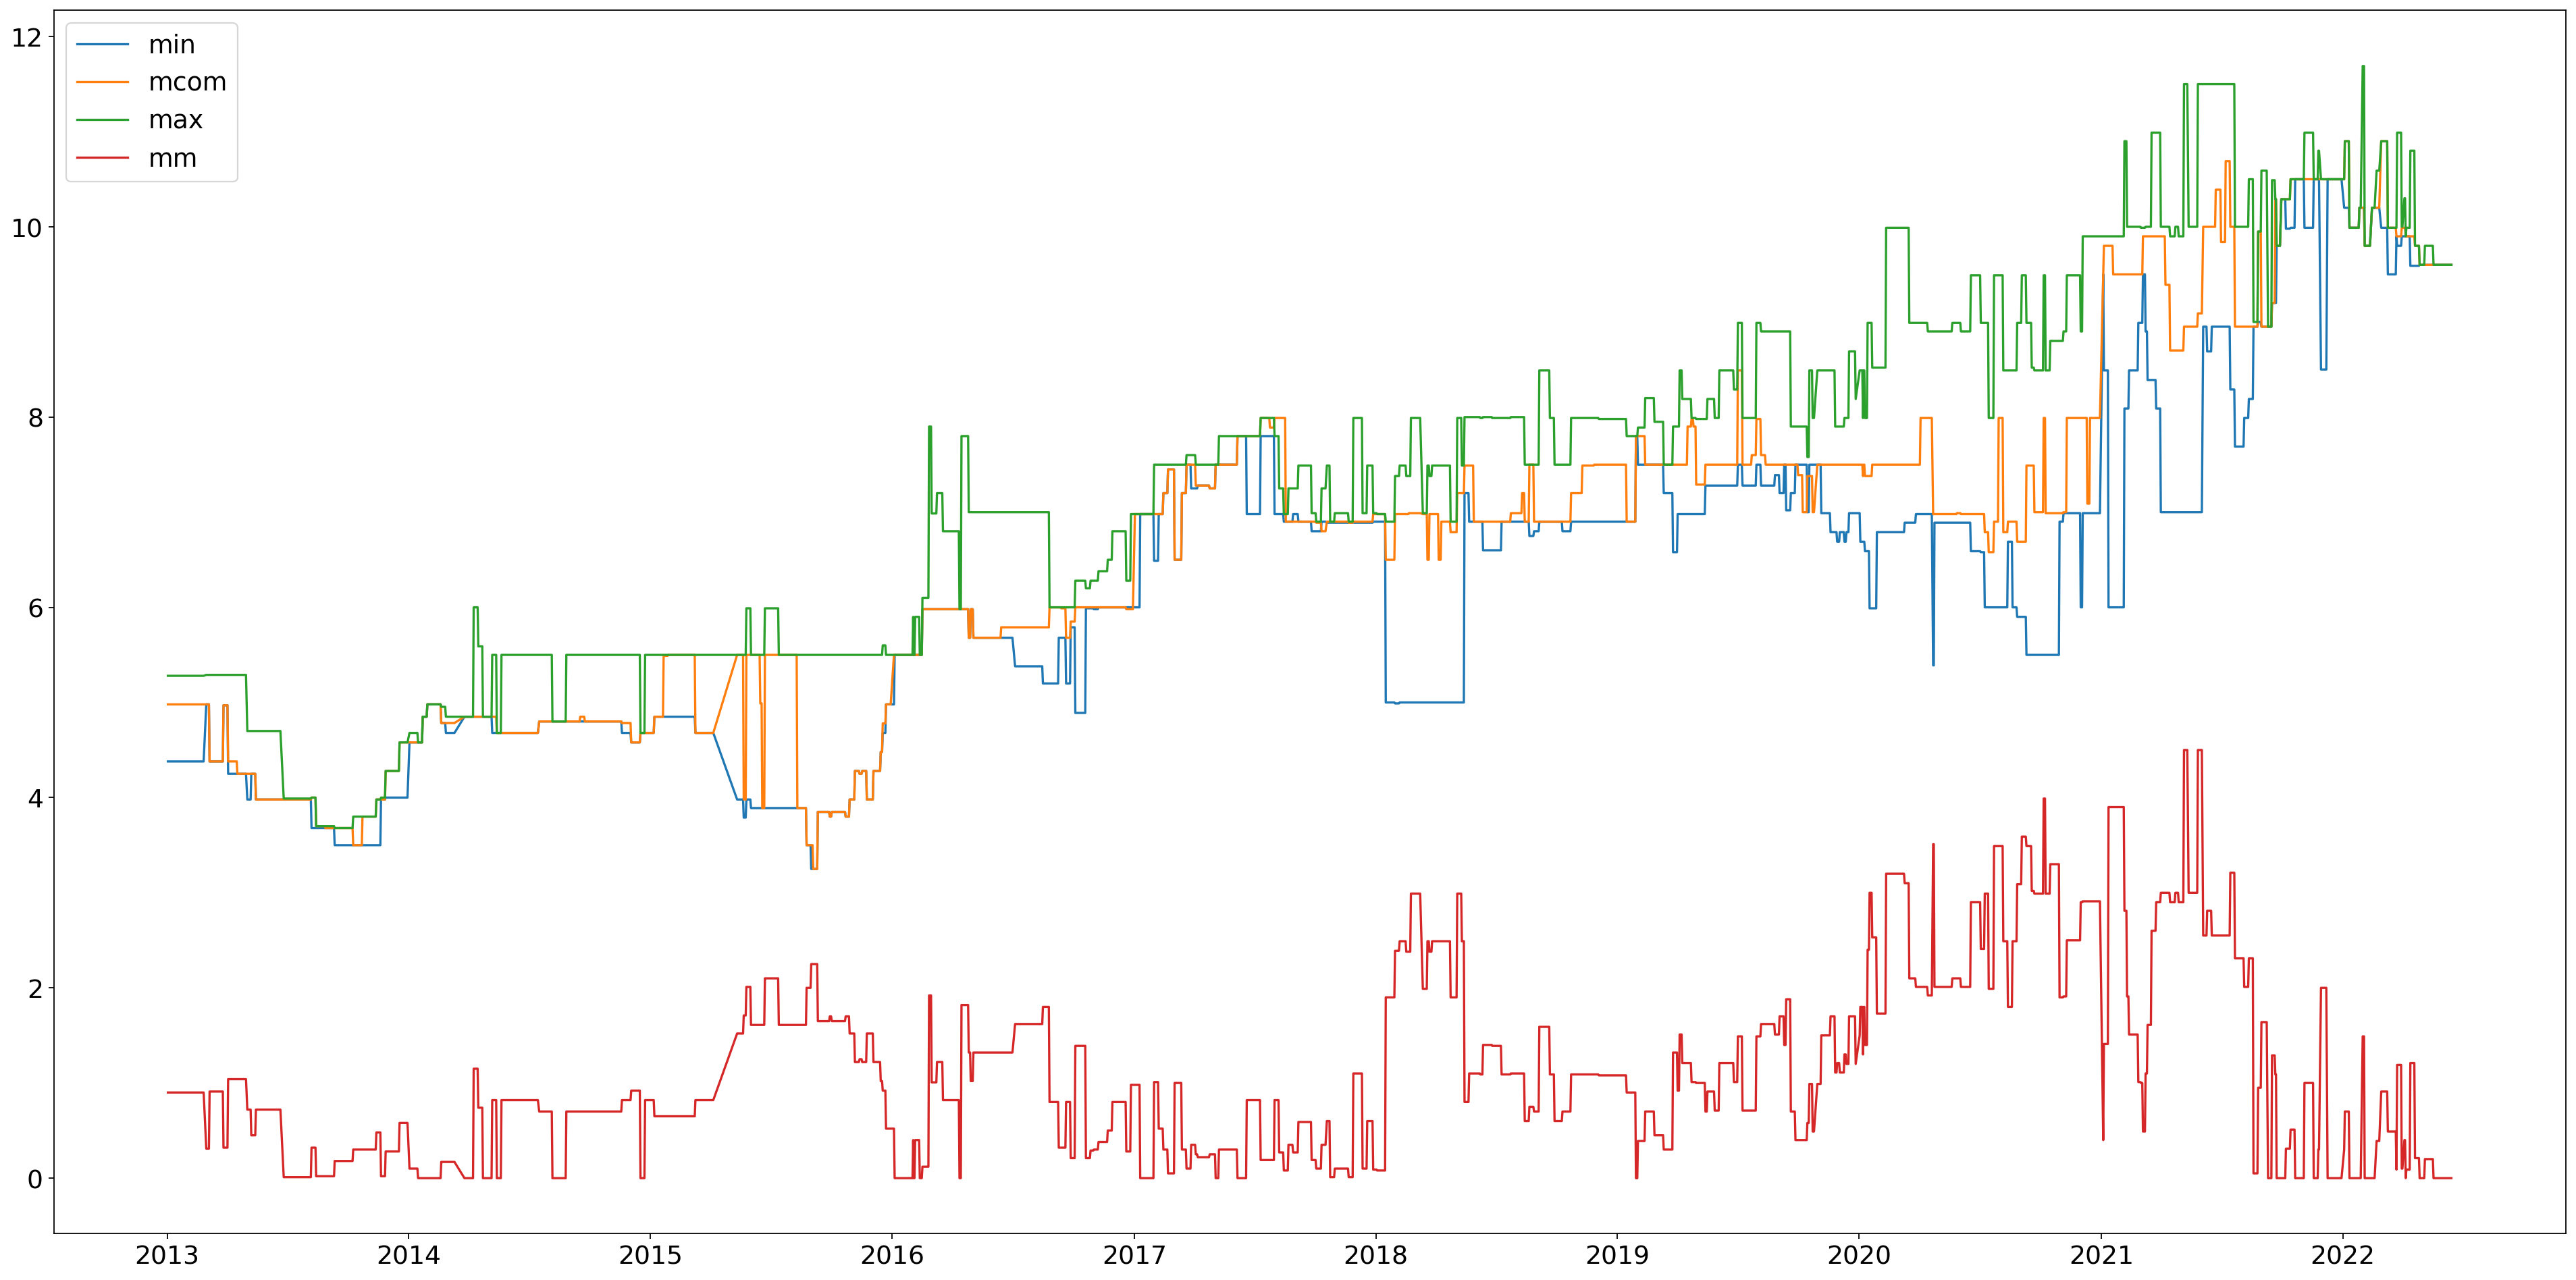

In [73]:
fig, axes = plt.subplots(1, 1, figsize=(30,15), dpi=80)
plt.plot(levelmin,label='min')
plt.plot(levelmcom,label='mcom')
plt.plot(level,label='max')
plt.plot(levelmm,label='mm')
plt.legend()
#plt.savefig('series_statsmodel.jpg',dpi=400)

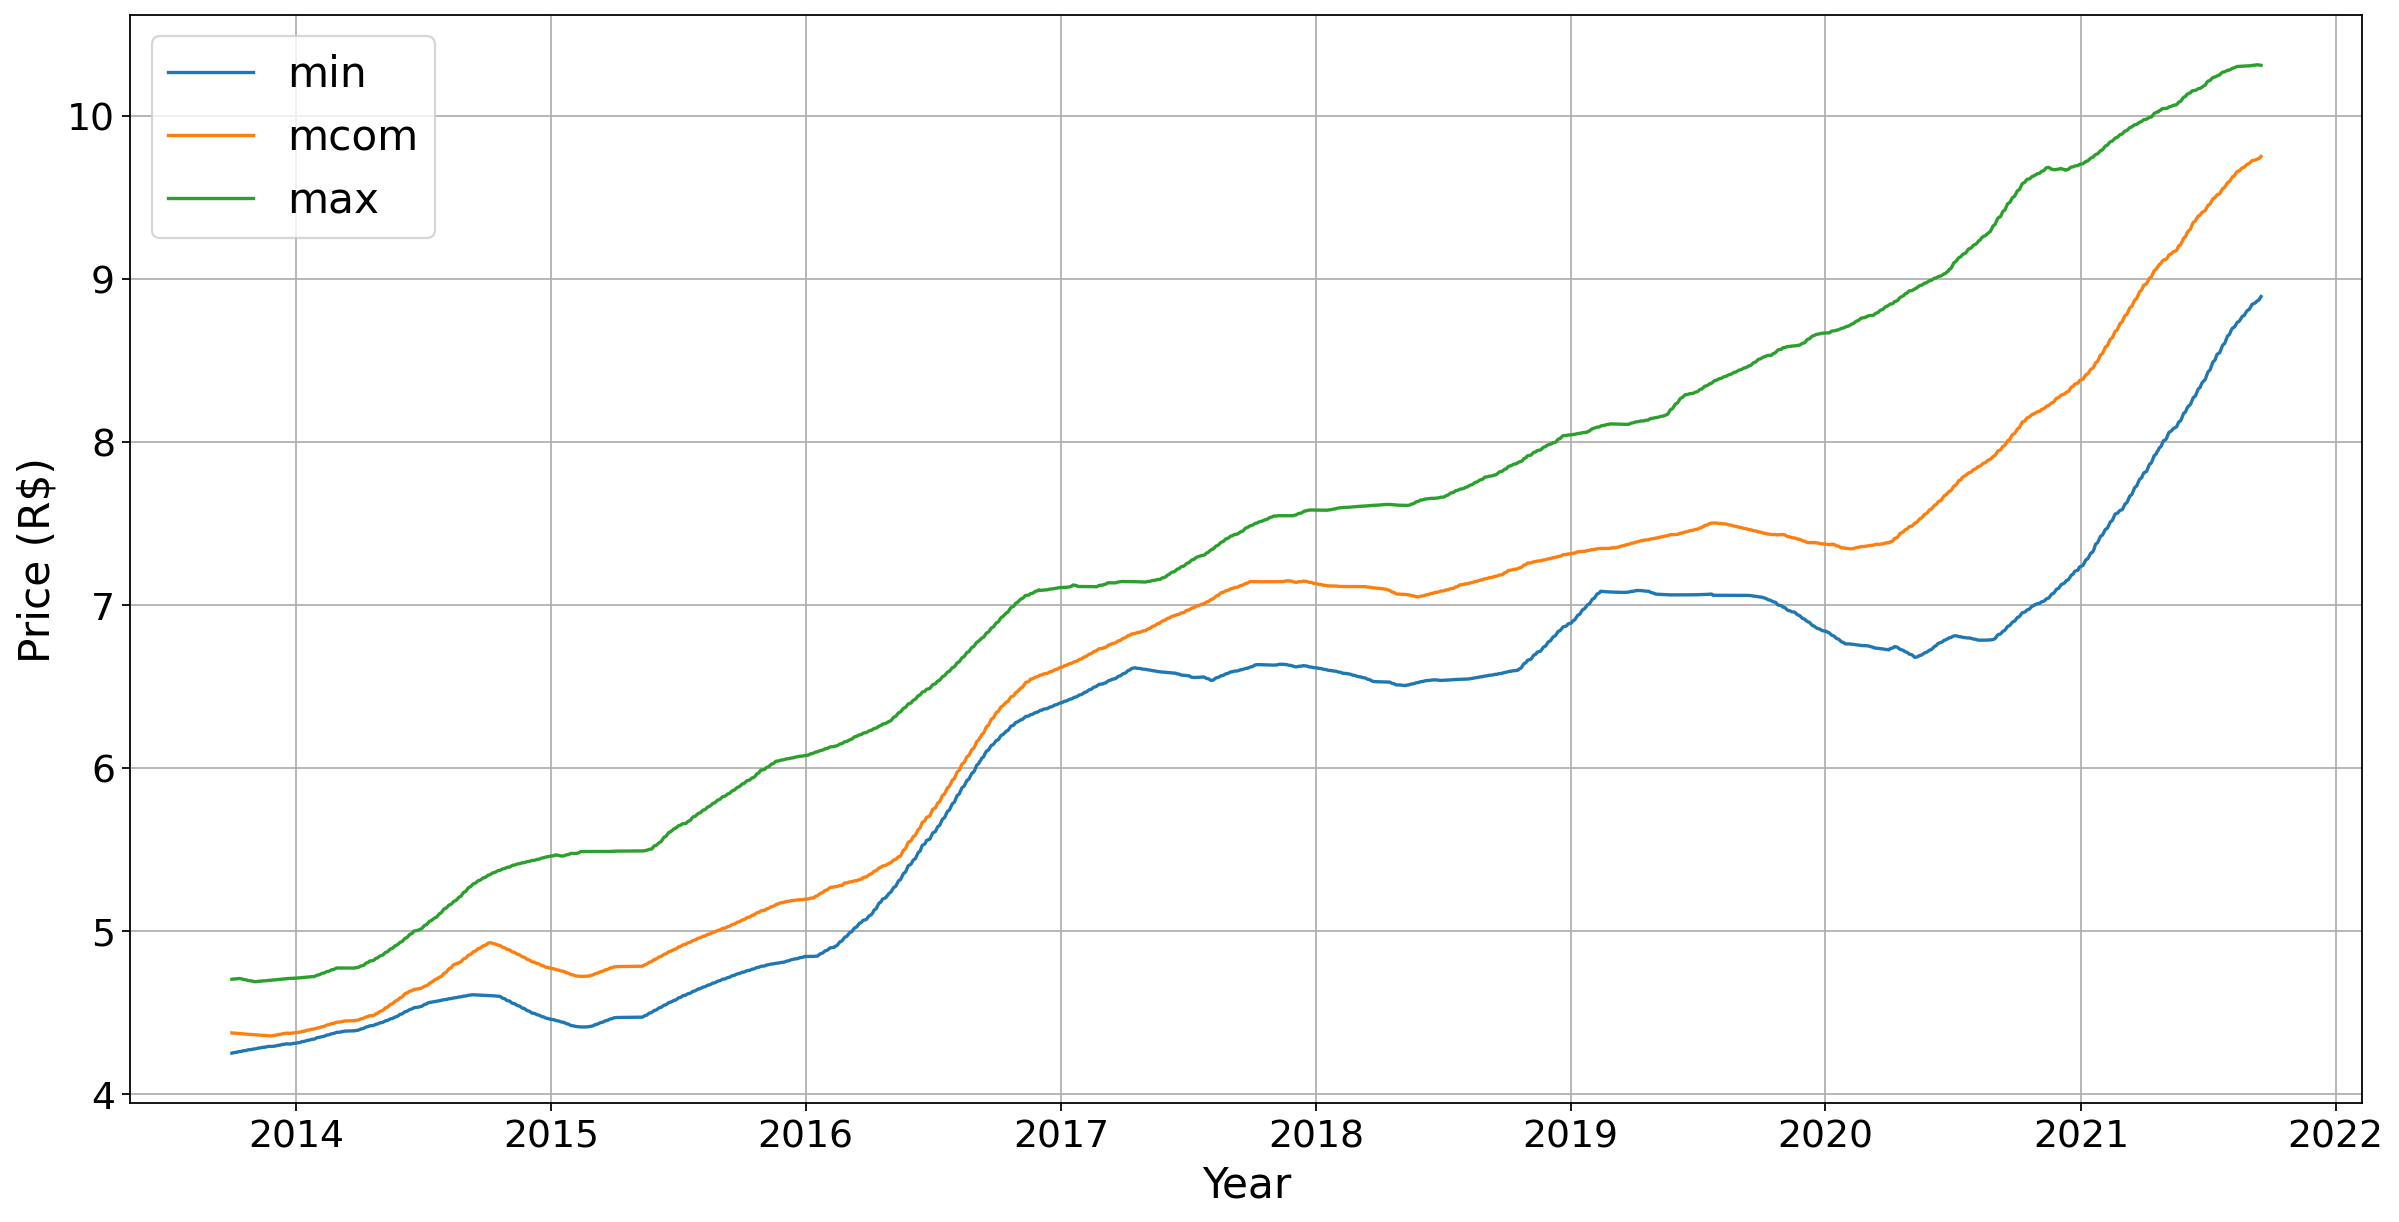

In [78]:
fig, axes = plt.subplots(1, 1, figsize=(18,9), dpi=80)
plt.rcParams['font.size'] = '19'
plt.rcParams['xtick.labelsize'] = '19'
plt.xlabel("Year",  fontsize=19)
plt.ylabel("Price (R$)",  fontsize=19)
plt.grid()
plt.plot(trendmin,label='min')
plt.plot(trendmcom,label='mcom')
plt.plot(trend,label='max')
plt.legend()
plt.savefig('trendscombined.jpg',dpi=400)

## Making a .csv file
As the purpouse of this notebook is to turn the dataset in a better fit to modelling and make some initial analysis about it, we are going to make a csv of our final dataset.

In [78]:
dfc.to_csv('modelling.csv', sep = ';', encoding = 'utf-8')

We've finnished this notebook.